In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

$\text{Загружаем данные, в том числе и описание} $

In [ ]:
try:
    df_inf = pd.read_csv('!Описание параметров_Description of parameters_sas_2022_hw1.csv', encoding='windows-1251', delimiter=';')           
    print(f"Колонки: {list(df_inf.columns)}")

except Exception as e:
    print(f"Ошибка: {e}")

In [ ]:
df_inf

In [ ]:
try:
    df_original = pd.read_csv('HW1_var_6.csv', encoding='utf-8', delimiter=';')          
    print(f"Колонки: {list(df_original.columns)}")

except Exception as e:
    print(f"Ошибка: {e}")

In [431]:
df=df_original

In [432]:
df.shape[0]

10243

In [433]:
df.head()

Номер варианта       ID                       INCOME_BASE_TYPE  \
0               6  1000006           Поступление зарплаты на счет   
1               6  1000026           Поступление зарплаты на счет   
2               6  1000046                                  2НДФЛ   
3               6  1000066  Форма банка (без печати работодателя)   
4               6  1000086                                  2НДФЛ   

                        CREDIT_PURPOSE  INSURANCE_FLAG   DTI      SEX  \
0                               Ремонт             1.0  0.11  женский   
1                               Отпуск             0.0  0.33  женский   
2                               Ремонт             0.0  0.48  женский   
3  Покупка недвижимости/ строительство             0.0   0.4  мужской   
4  Покупка недвижимости/ строительство             1.0  0.36  мужской   

   FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0                      1                 0   
1                      0                 0   
2                      0                 0   
3                      0                 0   
4                      1                 0   

                             EDUCATION                 EMPL_TYPE EMPL_SIZE  \
0                               высшее   менеджер среднего звена      >250   
1                               высшее                специалист      >250   
2  Высшее/Второе высшее/Ученая степень   менеджер среднего звена      >250   
3                  среднее-специальное  вспомогательный персонал      >250   
4                  среднее-специальное                   рабочий      >250   

   BANKACCOUNT_FLAG  Period_at_work   age              EMPL_PROPERTY  \
0               0.0            37.0  43.0                     Другое   
1               0.0            16.0  34.0                     Другое   
2               0.0            53.0  35.0                   Торговля   
3               0.0            36.0  30.0                  Транспорт   
4               0.0            49.0  26.0  Информационные технологии   

    EMPL_FORM        FAMILY_STATUS  max90days  max60days  max30days  \
0  Иная форма      женат / замужем        0.0        0.0        0.0   
1         ЗАО  холост / не замужем        2.0        2.0        2.0   
2         ООО  холост / не замужем        3.0        2.0        2.0   
3         NaN                  NaN        NaN        NaN        NaN   
4         ЗАО      женат / замужем        0.0        0.0        0.0   

   max21days  max14days  avg_num_delay  if_zalog  num_AccountActive180  \
0        0.0        0.0            0.0       1.0                   0.0   
1        1.0        0.0            0.0       0.0                   1.0   
2        1.0        1.0            0.0       0.0                   0.0   
3        NaN        NaN            NaN       NaN                   NaN   
4        0.0        0.0            0.0       1.0                   0.0   

   num_AccountActive90  num_AccountActive60  Active_to_All_prc  \
0                  0.0                  0.0           0.000000   
1                  1.0                  1.0           1.000000   
2                  0.0                  0.0           0.333333   
3                  NaN                  NaN                NaN   
4                  0.0                  0.0           0.000000   

   numAccountActiveAll  numAccountClosed  sum_of_paym_months  all_credits  \
0                  0.0               3.0                13.0          3.0   
1                  1.0               0.0                 1.0          1.0   
2                  1.0               2.0                14.0          3.0   
3                  NaN               NaN                 NaN          NaN   
4                  0.0               5.0                47.0          5.0   

   Active_not_cc  own_closed  min_MnthAfterLoan  max_MnthAfterLoan  dlq_exist  \
0            0.0         0.0               28.0               86.0        0.0   
1            1.0         0.0                0.0                0.0        0.

In [435]:
#наименования столбцов таблицы
cols = df.columns
for i in range(len(cols)):
  print(cols[i])

Номер варианта
ID
INCOME_BASE_TYPE
CREDIT_PURPOSE
INSURANCE_FLAG
DTI
SEX
FULL_AGE_CHILD_NUMBER
DEPENDANT_NUMBER
EDUCATION
EMPL_TYPE
EMPL_SIZE
BANKACCOUNT_FLAG
Period_at_work
age
EMPL_PROPERTY
EMPL_FORM
FAMILY_STATUS
max90days
max60days
max30days
max21days
max14days
avg_num_delay
if_zalog
num_AccountActive180
num_AccountActive90
num_AccountActive60
Active_to_All_prc
numAccountActiveAll
numAccountClosed
sum_of_paym_months
all_credits
Active_not_cc
own_closed
min_MnthAfterLoan
max_MnthAfterLoan
dlq_exist
thirty_in_a_year
sixty_in_a_year
ninety_in_a_year
thirty_vintage
sixty_vintage
ninety_vintage


$\text{Создаем таблицу и смотрим на количество уникальных значений в каждом столбце, }\\  \text{на число нулей, на чило пропусков (значения Nans) на долю таких значений от общего числа}\\ \text{Так же смотрим на тип данных} $

In [437]:

def columnValues(df):

    total_rows = len(df)

    unique_count = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nan_count = df.isna().sum()

    # Рассчитываем проценты
    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    data_types = df.dtypes

    # Формируем строку: каждая метрика сразу со своим процентом
    row = [unique_count, f"{unique_percent}%",
           zeros_count, f"{zeros_percent}%",
           nan_count, f"{nan_percent}%",
           data_types]
    return row

data = []
for column in df.columns:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'dtype'],
               tablefmt='orgtbl'))

| Column                |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   | dtype   |
|-----------------------+----------+---------------+---------+--------------+--------+-------------+---------|
| Номер варианта        |        1 | 0.0%          |       0 | 0.0%         |      0 | 0.0%        | int64   |
| ID                    |    10243 | 100.0%        |       0 | 0.0%         |      0 | 0.0%        | int64   |
| INCOME_BASE_TYPE      |        4 | 0.0%          |       0 | 0.0%         |     86 | 0.8%        | object  |
| CREDIT_PURPOSE        |       10 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| INSURANCE_FLAG        |        2 | 0.0%          |    4082 | 39.9%        |      1 | 0.0%        | float64 |
| DTI                   |       59 | 0.6%          |       0 | 0.0%         |    146 | 1.4%        | object  |
| SEX                   |        2 | 0.0%          |       0 | 0.0%         |      0 | 0.0%        | object  |
|

$\text{Удаляем столбец, содержащий информацию о номере варианта, он точно никакго отношения к данным не имеет} $

In [438]:
#удаление столбца.
df = df.drop(columns=['Номер варианта'])

$\text{Для столбца BANKACCOUNT\_FLAG с информацией о числе аккаунтов,}$\\
$\text{заменим все значения >2 на 2, чтобы не плодить слишком много категорий.}$

In [439]:

# заменяем все значения больше 2 на 2
mask = df['BANKACCOUNT_FLAG'] > 2
count_to_replace = mask.sum()
    
if count_to_replace > 0:
    print(f"Найдено {count_to_replace} строк со значениями > 2")
    print("Уникальные значения > 2:", df.loc[mask, 'BANKACCOUNT_FLAG'].unique())
        
        # Заменяем
    df.loc[mask, 'BANKACCOUNT_FLAG'] = 2
        
    print(f"\n Все значения > 2 заменены на 2")
    print(f"Новое распределение:")
    print(df['BANKACCOUNT_FLAG'].value_counts().sort_index())
else:
    print("Значений > 2 не найдено")

Найдено 657 строк со значениями > 2
Уникальные значения > 2: [3. 4.]

 Все значения > 2 заменены на 2
Новое распределение:
BANKACCOUNT_FLAG
0.0    6229
1.0    1003
2.0     658
Name: count, dtype: int64


$\text{Для некоторых столбцов тип определился по умочанию не совсем корректно,}\\
\text{некоторые категориальные данные были приняты за количественные, это нужно скорректировать.}\\
\text{Также DTI\ имеет тип object, хотя является количественным.}$

In [440]:

# Преобразование типов
for col in df.columns:
    if df[col].nunique() < 3:
        df[col] = df[col].astype('object')

# Преобразуем client_pin 

df['ID'] = df['ID'].astype('object')

# Преобразуем client_pin 

df['BANKACCOUNT_FLAG'] = df['BANKACCOUNT_FLAG'].astype('object')

if 'DTI' in df.columns:
    # Заменяем некорректные значения на NaN
    df['DTI'] = pd.to_numeric(df['DTI'], errors='coerce')
    # Теперь можно безопасно привести тип
    df['DTI'] = df['DTI'].astype('float64')


def columnValues(df):

    total_rows = len(df)

    unique_count = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nan_count = df.isna().sum()

    # Рассчитываем проценты
    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    data_types = df.dtypes

    # Формируем строку: каждая метрика сразу со своим процентом
    row = [unique_count, f"{unique_percent}%",
           zeros_count, f"{zeros_percent}%",
           nan_count, f"{nan_percent}%",
           data_types]
    return row

data = []
for column in df.columns:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'dtype'],
               tablefmt='orgtbl'))

| Column                |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   | dtype   |
|-----------------------+----------+---------------+---------+--------------+--------+-------------+---------|
| ID                    |    10243 | 100.0%        |       0 | 0.0%         |      0 | 0.0%        | object  |
| INCOME_BASE_TYPE      |        4 | 0.0%          |       0 | 0.0%         |     86 | 0.8%        | object  |
| CREDIT_PURPOSE        |       10 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| INSURANCE_FLAG        |        2 | 0.0%          |    4082 | 39.9%        |      1 | 0.0%        | object  |
| DTI                   |       58 | 0.6%          |       0 | 0.0%         |    148 | 1.4%        | float64 |
| SEX                   |        2 | 0.0%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| FULL_AGE_CHILD_NUMBER |        6 | 0.1%          |    6068 | 59.2%        |      0 | 0.0%        | int64   |
|

$\text{Итого получилось 23 количественных столбца и 20 категориальных}\\$

In [441]:
# Считаем типы данных
numeric = df.select_dtypes(include=['int64', 'float64']).shape[1]
categorical = df.select_dtypes(include=['object']).shape[1]

print(f" ЧИСЛОВЫХ СТОЛБЦОВ: {numeric}")
print(f" КАТЕГОРИАЛЬНЫХ СТОЛБЦОВ: {categorical}")
print(f" ВСЕГО СТОЛБЦОВ: {len(df.columns)}")


 ЧИСЛОВЫХ СТОЛБЦОВ: 23
 КАТЕГОРИАЛЬНЫХ СТОЛБЦОВ: 20
 ВСЕГО СТОЛБЦОВ: 43


$\text{Посчитаем основные сатистики для количественных переменных}\\
\text{а именно min, max, mean, median, std}\\$

In [442]:
numeric_data = []
for col in df.columns:
    total_rows = len(df)
    
    col_data = df[col]
    unique_count = col_data.nunique() 
    zeros_count = (col_data == 0).sum()  
    nan_count = col_data.isna().sum()  

    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    
    if df[col].dtype in ['int64', 'float64']:
        clean_data = col_data.dropna()
        
        numeric_data.append([
            col,
            unique_count, f"{unique_percent}%",
            zeros_count, f"{zeros_percent}%",
            nan_count, f"{nan_percent}%",
            round(clean_data.mean(), 2),
            round(clean_data.median(), 2),
            round(clean_data.std(), 2),
            round(clean_data.min(), 2),
            round(clean_data.max(), 2),
        ])

print(tabulate(numeric_data, 
                headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'Mean', 'Median', 'Std', 'Min', 'Max'],
                tablefmt='orgtbl'))

| Column                |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   |   Mean |   Median |   Std |   Min |     Max |
|-----------------------+----------+---------------+---------+--------------+--------+-------------+--------+----------+-------+-------+---------|
| DTI                   |       58 | 0.6%          |       0 | 0.0%         |    148 | 1.4%        |   0.38 |     0.4  |  0.14 |  0.02 |    0.59 |
| FULL_AGE_CHILD_NUMBER |        6 | 0.1%          |    6068 | 59.2%        |      0 | 0.0%        |   0.56 |     0    |  0.77 |  0    |    5    |
| DEPENDANT_NUMBER      |        5 | 0.0%          |   10214 | 99.7%        |      0 | 0.0%        |   0    |     0    |  0.08 |  0    |    4    |
| Period_at_work        |      355 | 3.5%          |       0 | 0.0%         |   2355 | 23.0%       |  65.81 |    45    | 64.98 |  3    |  448    |
| age                   |       40 | 0.4%          |       0 | 0.0%         |   2353 | 23.0%       |  36.2  |    34   

$\text{Небольшой анализ полученных данных}\\
\text{Видим большое количество Nans в категориальных столбцах с информацией о просрочке на 30,60,90 дней, с информацией о наличии залога...}\\
\text{Скореее всего эти данные прийдется удалять, так как они являются категориальными,}\\
\text{и попытка восстановления может привести к искажению данных.}$

$\text{Числовые данные, пока разумно не трогать, так как их можно будет попробовать восстановить импутацией среднего}\\
\text{отталкиваясь от того что останется после удаления, пока процент Nans для большинства количественных столбцов более 60 процентов }\\$

$\text{Удалим столбец ID, так как в нем достигается 100 процентов уникальности, и для кластеризации он не пригодится}\\
\text{Однако предварительно сохраним его для дальнейшей идентификации клиента}\\$

In [443]:
customer_ids = df['ID'].copy()

df = df.drop(columns=['ID'])

$\text{Переходим к удалению строк, с большим количеством отсутвующей информации}\\
\text{Видим большое количество Nans в категориальных столбцах с информацией о просрочке на 30,60,90 дней.}\\
\text{Эксперементальным путем выяснено, что пропуски, практически полностью совпадают, в полях указанных ниже,}\\ 
\text{(а так же для количественных данных c большим числом пропусков (более 6000))}\\
\text{поэтому достаточно опираться на один из этих столбцов, в исходных данных также видим, что пропуски здесь совпадают.}$

In [444]:
# Список колонок с пропусками
columns_with_missing = [
    'if_zalog',  # Наличие залога (квартира,машина)
    #'dlq_exist',  # Наличие просрочки на данный момент
    #'thirty_in_a_year',  # Просрочка больше 30 дней за последний год
    #'sixty_in_a_year',  # Просрочка больше 60 дней за последний год
    #'ninety_in_a_year',  # Просрочка больше 90 дней за последний год
    #'thirty_vintage',  # Просрочка больше 30 дней, когда-либо
    #'sixty_vintage',  # Просрочка больше 60 дней, когда-либо
    #'ninety_vintage'  # Просрочка больше 90 дней, когда-либо
]

# Удаляем строки с пропусками в этих колонках
print(f"\nДо удаления: {len(df)} строк")
df_clean = df.dropna(subset=columns_with_missing)
print(f"После удаления: {len(df_clean)} строк")
print(f"Удалено строк: {len(df) - len(df_clean)}")

# Проверяем результат
print("\nПроверка пропусков после удаления:")
for col in columns_with_missing:
    missing = df_clean[col].isna().sum()
    print(f"{col}: {missing} пропусков")


До удаления: 10243 строк
После удаления: 3616 строк
Удалено строк: 6627

Проверка пропусков после удаления:
if_zalog: 0 пропусков


$\text{Остается всего 3616 строк}\\$

In [445]:
def columnValues(df):

    total_rows = len(df)

    unique_count = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nan_count = df.isna().sum()

    # Рассчитываем проценты
    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    data_types = df.dtypes

    # Формируем строку: каждая метрика сразу со своим процентом
    row = [unique_count, f"{unique_percent}%",
           zeros_count, f"{zeros_percent}%",
           nan_count, f"{nan_percent}%",
           data_types]
    return row

data = []
for column in df_clean.columns:
    data.append([column] + columnValues(df_clean[column]))

print(tabulate(data, headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'dtype'],
               tablefmt='orgtbl'))

| Column                |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   | dtype   |
|-----------------------+----------+---------------+---------+--------------+--------+-------------+---------|
| INCOME_BASE_TYPE      |        4 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| CREDIT_PURPOSE        |       10 | 0.3%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| INSURANCE_FLAG        |        2 | 0.1%          |    1442 | 39.9%        |      0 | 0.0%        | object  |
| DTI                   |       58 | 1.6%          |       0 | 0.0%         |      1 | 0.0%        | float64 |
| SEX                   |        2 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| FULL_AGE_CHILD_NUMBER |        6 | 0.2%          |    2161 | 59.8%        |      0 | 0.0%        | int64   |
| DEPENDANT_NUMBER      |        4 | 0.1%          |    3608 | 99.8%        |      0 | 0.0%        | int64   |
|

$\text{Можем видеть, что вместе, с удалением категориальных строк с пропусками ушло и подавляющее большинство строк}\\
\text{с пропусками в количественнных данных, что еще раз подтверждает целесообразность такого подхода.(совпадение пропусков)}\\
\text{Осталось небольшое количество пропусков в количественных данных, которые мы заполним,}\\
\text{воспользовавшись импутацией среднего значения.}$

In [446]:
# Список количественных столбцов с пропусками
numeric_columns_with_missing = [
    'DTI', 'max90days', 'max60days', 'max30days', 
    'max21days', 'max14days', 'avg_num_delay'
]

# Проверяем какие колонки есть в данных
existing_numeric = [col for col in numeric_columns_with_missing if col in df_clean.columns]

print(" ЗАМЕНА ПРОПУСКОВ В КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ")

# Заменяем пропуски средним значением
for col in existing_numeric:
    if df_clean[col].dtype in ['int64', 'float64']:
        # Считаем среднее (игнорируя пропуски)
        mean_value = df_clean[col].mean()
        
        # Считаем сколько пропусков
        missing_before = df_clean[col].isna().sum()
        
        # Заменяем пропуски средним
        df_clean[col] = df_clean[col].fillna(mean_value)
        
        # Считаем сколько пропусков после
        missing_after = df_clean[col].isna().sum()
        
        print(f"{col:15} | Пропусков: {missing_before:4} → {missing_after:4} | Заполнено средним: {mean_value:.2f}")

 ЗАМЕНА ПРОПУСКОВ В КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ
DTI             | Пропусков:    1 →    0 | Заполнено средним: 0.39
max90days       | Пропусков:    4 →    0 | Заполнено средним: 1.60
max60days       | Пропусков:    4 →    0 | Заполнено средним: 1.11
max30days       | Пропусков:    4 →    0 | Заполнено средним: 0.79
max21days       | Пропусков:    4 →    0 | Заполнено средним: 0.58
max14days       | Пропусков:    4 →    0 | Заполнено средним: 0.47
avg_num_delay   | Пропусков:   15 →    0 | Заполнено средним: 0.06


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6268\924526203.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(mean_value)


In [447]:
def columnValues(df):

    total_rows = len(df)

    unique_count = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nan_count = df.isna().sum()

    # Рассчитываем проценты
    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    data_types = df.dtypes

    # Формируем строку: каждая метрика сразу со своим процентом
    row = [unique_count, f"{unique_percent}%",
           zeros_count, f"{zeros_percent}%",
           nan_count, f"{nan_percent}%",
           data_types]
    return row

data = []
for column in df_clean.columns:
    data.append([column] + columnValues(df_clean[column]))

print(tabulate(data, headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'dtype'],
               tablefmt='orgtbl'))

| Column                |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   | dtype   |
|-----------------------+----------+---------------+---------+--------------+--------+-------------+---------|
| INCOME_BASE_TYPE      |        4 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| CREDIT_PURPOSE        |       10 | 0.3%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| INSURANCE_FLAG        |        2 | 0.1%          |    1442 | 39.9%        |      0 | 0.0%        | object  |
| DTI                   |       59 | 1.6%          |       0 | 0.0%         |      0 | 0.0%        | float64 |
| SEX                   |        2 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| FULL_AGE_CHILD_NUMBER |        6 | 0.2%          |    2161 | 59.8%        |      0 | 0.0%        | int64   |
| DEPENDANT_NUMBER      |        4 | 0.1%          |    3608 | 99.8%        |      0 | 0.0%        | int64   |
|

$\text{В наших данных не осталось пропусков, однако еще необходимо их немного дочистить}\\$


In [448]:
df_clean.shape[0]

3616

$\text{Посмотрим какие значения принимают категориальные колонки}\\$

In [449]:
# Компактный вывод
object_cols = df_clean.select_dtypes(include=['object']).columns

print("КАТЕГОРИАЛЬНЫЕ КОЛОНКИ И ИХ ЗНАЧЕНИЯ:")

for col in object_cols:
    unique_count = df_clean[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных: {unique_count}, Пропусков: {df_clean[col].isna().sum()}")
    
    if unique_count <= 10:
        vals = df_clean[col].dropna().unique()
        print(f"  Значения: {sorted(vals)}")
    elif unique_count <= 50:
        print(f"  Первые 10 значений: {sorted(df_clean[col].dropna().unique()[:10])}")
    else:
        print(f"  Слишком много значений ({unique_count}), показываем примеры")
        print(f"  Примеры: {sorted(df_clean[col].dropna().unique()[:5])} ...")

КАТЕГОРИАЛЬНЫЕ КОЛОНКИ И ИХ ЗНАЧЕНИЯ:

INCOME_BASE_TYPE:
  Уникальных: 4, Пропусков: 0
  Значения: ['2НДФЛ', 'Поступление зарплаты на счет', 'Свободная форма с печатью работодателя', 'Форма банка (без печати работодателя)']

CREDIT_PURPOSE:
  Уникальных: 10, Пропусков: 0
  Значения: ['Другое', 'Лечение', 'Обучение', 'Отпуск', 'Покупка автомобиля', 'Покупка бытовой техники', 'Покупка земли', 'Покупка мебели', 'Покупка недвижимости/ строительство', 'Ремонт']

INSURANCE_FLAG:
  Уникальных: 2, Пропусков: 0
  Значения: [0.0, 1.0]

SEX:
  Уникальных: 2, Пропусков: 0
  Значения: ['женский', 'мужской']

EDUCATION:
  Уникальных: 9, Пропусков: 0
  Значения: ['*n.a.*', 'Высшее/Второе высшее/Ученая степень', 'Неполное среднее', 'второе высшее', 'высшее', 'незаконченное высшее', 'среднее', 'среднее-специальное', 'ученая степень']

EMPL_TYPE:
  Уникальных: 9, Пропусков: 0
  Значения: ['вспомогательный персонал', 'другое', 'менеджер высшего звена', 'менеджер по продажам', 'менеджер среднего звена', '

$\text{Видим несколько na значений, заменяем их на пропуски и удаляем так как таких строк немного и это не должно сильно отразиться на данных}\\$

In [450]:
# Проверяем сколько значений 'n/a' (в разных регистрах)
na_variants = ['*n.a.*']
total_na = 0
    
for variant in na_variants:
    count = (df_clean['EDUCATION'].astype(str).str.lower() == variant.lower()).sum()
    if count > 0:
        print(f"Найдено '{variant}': {count} строк")
        total_na += count
    
print(f"\nВсего значений 'n/a': {total_na}")
    
# Заменяем на NaN
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace(na_variants, pd.NA)
    
# Проверяем результат
na_after = df_clean['EDUCATION'].isna().sum()
print(f"\nПосле замены пропусков (NaN): {na_after}")

Найдено '*n.a.*': 15 строк

Всего значений 'n/a': 15

После замены пропусков (NaN): 15


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6268\2140958041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EDUCATION'] = df_clean['EDUCATION'].replace(na_variants, pd.NA)


In [451]:
# Проверяем сколько значений 'n/a' (в разных регистрах)
na_variants = ['*n.a.*']
total_na = 0
    
for variant in na_variants:
    count = (df_clean['EMPL_SIZE'].astype(str).str.lower() == variant.lower()).sum()
    if count > 0:
        print(f"Найдено '{variant}': {count} строк")
        total_na += count
    
print(f"\nВсего значений 'n/a': {total_na}")
    
# Заменяем на NaN
df_clean['EMPL_SIZE'] = df_clean['EMPL_SIZE'].replace(na_variants, pd.NA)
    
# Проверяем результат
na_after = df_clean['EMPL_SIZE'].isna().sum()
print(f"\nПосле замены пропусков (NaN): {na_after}")

Найдено '*n.a.*': 3 строк

Всего значений 'n/a': 3

После замены пропусков (NaN): 3


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6268\641668971.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EMPL_SIZE'] = df_clean['EMPL_SIZE'].replace(na_variants, pd.NA)


In [452]:
columns_with_missing = ['EDUCATION', 'EMPL_SIZE']

df_clean = df_clean.dropna(subset=columns_with_missing)

In [453]:
def columnValues(df):

    total_rows = len(df)

    unique_count = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nan_count = df.isna().sum()

    # Рассчитываем проценты
    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    data_types = df.dtypes

    # Формируем строку: каждая метрика сразу со своим процентом
    row = [unique_count, f"{unique_percent}%",
           zeros_count, f"{zeros_percent}%",
           nan_count, f"{nan_percent}%",
           data_types]
    return row

data = []
for column in df_clean.columns:
    data.append([column] + columnValues(df_clean[column]))

print(tabulate(data, headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'dtype'],
               tablefmt='orgtbl'))

| Column                |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   | dtype   |
|-----------------------+----------+---------------+---------+--------------+--------+-------------+---------|
| INCOME_BASE_TYPE      |        4 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| CREDIT_PURPOSE        |       10 | 0.3%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| INSURANCE_FLAG        |        2 | 0.1%          |    1432 | 39.8%        |      0 | 0.0%        | object  |
| DTI                   |       59 | 1.6%          |       0 | 0.0%         |      0 | 0.0%        | float64 |
| SEX                   |        2 | 0.1%          |       0 | 0.0%         |      0 | 0.0%        | object  |
| FULL_AGE_CHILD_NUMBER |        6 | 0.2%          |    2149 | 59.7%        |      0 | 0.0%        | int64   |
| DEPENDANT_NUMBER      |        4 | 0.1%          |    3592 | 99.8%        |      0 | 0.0%        | int64   |
|

$\text{Также обращаем внимание на параметры min\_MnthAfterLoan и max\_MnthAfterLoan.}\\
\text{Они принимают минимальное значение -1. Эти столбцы содержат информацию}\\
\text{о месяцах, прошедших с момента взятия последнего или первого кредита.}\\
\text{Очевидно, что количество месяцев не может быть отрицательным, поэтому}\\
\text{можно предположить, что это ошибка. Так как таких строк немного,}\\
\text{будет безопаснее их удалить. (возможно не совсем корректное решение)}$

In [454]:
# Проверяем гипотезу
col_name = 'min_MnthAfterLoan'  # или другое название колонки с временем

if col_name in df_clean.columns:
    print(f" АНАЛИЗ {col_name.upper()} (месяцы)")

    
    data = df_clean[col_name]
    
    # Считаем сколько -1
    minus_one_count = (data == -1).sum()
    zero_count = (data == 0).sum()
    
    print(f"Всего значений: {len(data)}")
    print(f"Значение -1: {minus_one_count} строк ({minus_one_count/len(data)*100:.1f}%)")
    print(f"Значение 0: {zero_count} строк ({zero_count/len(data)*100:.1f}%)")
    print(f"Значение 1: {(data == 1).sum()} строк")
    
    # Проверяем есть ли значения между -1 и 0
    between_values = ((data > -1) & (data < 0)).sum()
    print(f"Значения между -1 и 0: {between_values}")
    
    # Если есть даты кредита - проверяем гипотезу
    if 'loan_date' in df_clean.columns:
        # Смотрим строки с -1
        minus_one_rows = df_clean[data == -1]
        print(f"\n🔍 Проверка строк с -1:")
        if len(minus_one_rows) > 0:
            print("Даты кредита для -1:")
            print(minus_one_rows['loan_date'].head())

 АНАЛИЗ MIN_MNTHAFTERLOAN (месяцы)
Всего значений: 3600
Значение -1: 9 строк (0.2%)
Значение 0: 127 строк (3.5%)
Значение 1: 174 строк
Значения между -1 и 0: 0


In [455]:
col_name = 'min_MnthAfterLoan'

# Удаляем строки с -1
df_clean = df_clean[df_clean[col_name] != -1].copy()

In [456]:

object_cols = df_clean.select_dtypes(include=['object']).columns

print("КАТЕГОРИАЛЬНЫЕ КОЛОНКИ И ИХ ЗНАЧЕНИЯ:")

for col in object_cols:
    unique_count = df_clean[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных: {unique_count}, Пропусков: {df_clean[col].isna().sum()}")
    
    if unique_count <= 10:
        vals = df_clean[col].dropna().unique()
        print(f"  Значения: {sorted(vals)}")
    elif unique_count <= 50:
        print(f"  Первые 10 значений: {sorted(df_clean[col].dropna().unique()[:10])}")
    else:
        print(f"  Слишком много значений ({unique_count}), показываем примеры")
        print(f"  Примеры: {sorted(df_clean[col].dropna().unique()[:5])} ...")

КАТЕГОРИАЛЬНЫЕ КОЛОНКИ И ИХ ЗНАЧЕНИЯ:

INCOME_BASE_TYPE:
  Уникальных: 4, Пропусков: 0
  Значения: ['2НДФЛ', 'Поступление зарплаты на счет', 'Свободная форма с печатью работодателя', 'Форма банка (без печати работодателя)']

CREDIT_PURPOSE:
  Уникальных: 10, Пропусков: 0
  Значения: ['Другое', 'Лечение', 'Обучение', 'Отпуск', 'Покупка автомобиля', 'Покупка бытовой техники', 'Покупка земли', 'Покупка мебели', 'Покупка недвижимости/ строительство', 'Ремонт']

INSURANCE_FLAG:
  Уникальных: 2, Пропусков: 0
  Значения: [0.0, 1.0]

SEX:
  Уникальных: 2, Пропусков: 0
  Значения: ['женский', 'мужской']

EDUCATION:
  Уникальных: 8, Пропусков: 0
  Значения: ['Высшее/Второе высшее/Ученая степень', 'Неполное среднее', 'второе высшее', 'высшее', 'незаконченное высшее', 'среднее', 'среднее-специальное', 'ученая степень']

EMPL_TYPE:
  Уникальных: 9, Пропусков: 0
  Значения: ['вспомогательный персонал', 'другое', 'менеджер высшего звена', 'менеджер по продажам', 'менеджер среднего звена', 'рабочий', 

$\text{Теперь давайте Исследуем распределение данных по полу, возрасту и другим категориальным показателям.}\\
\text{Построив соответствующие гистограммы}$

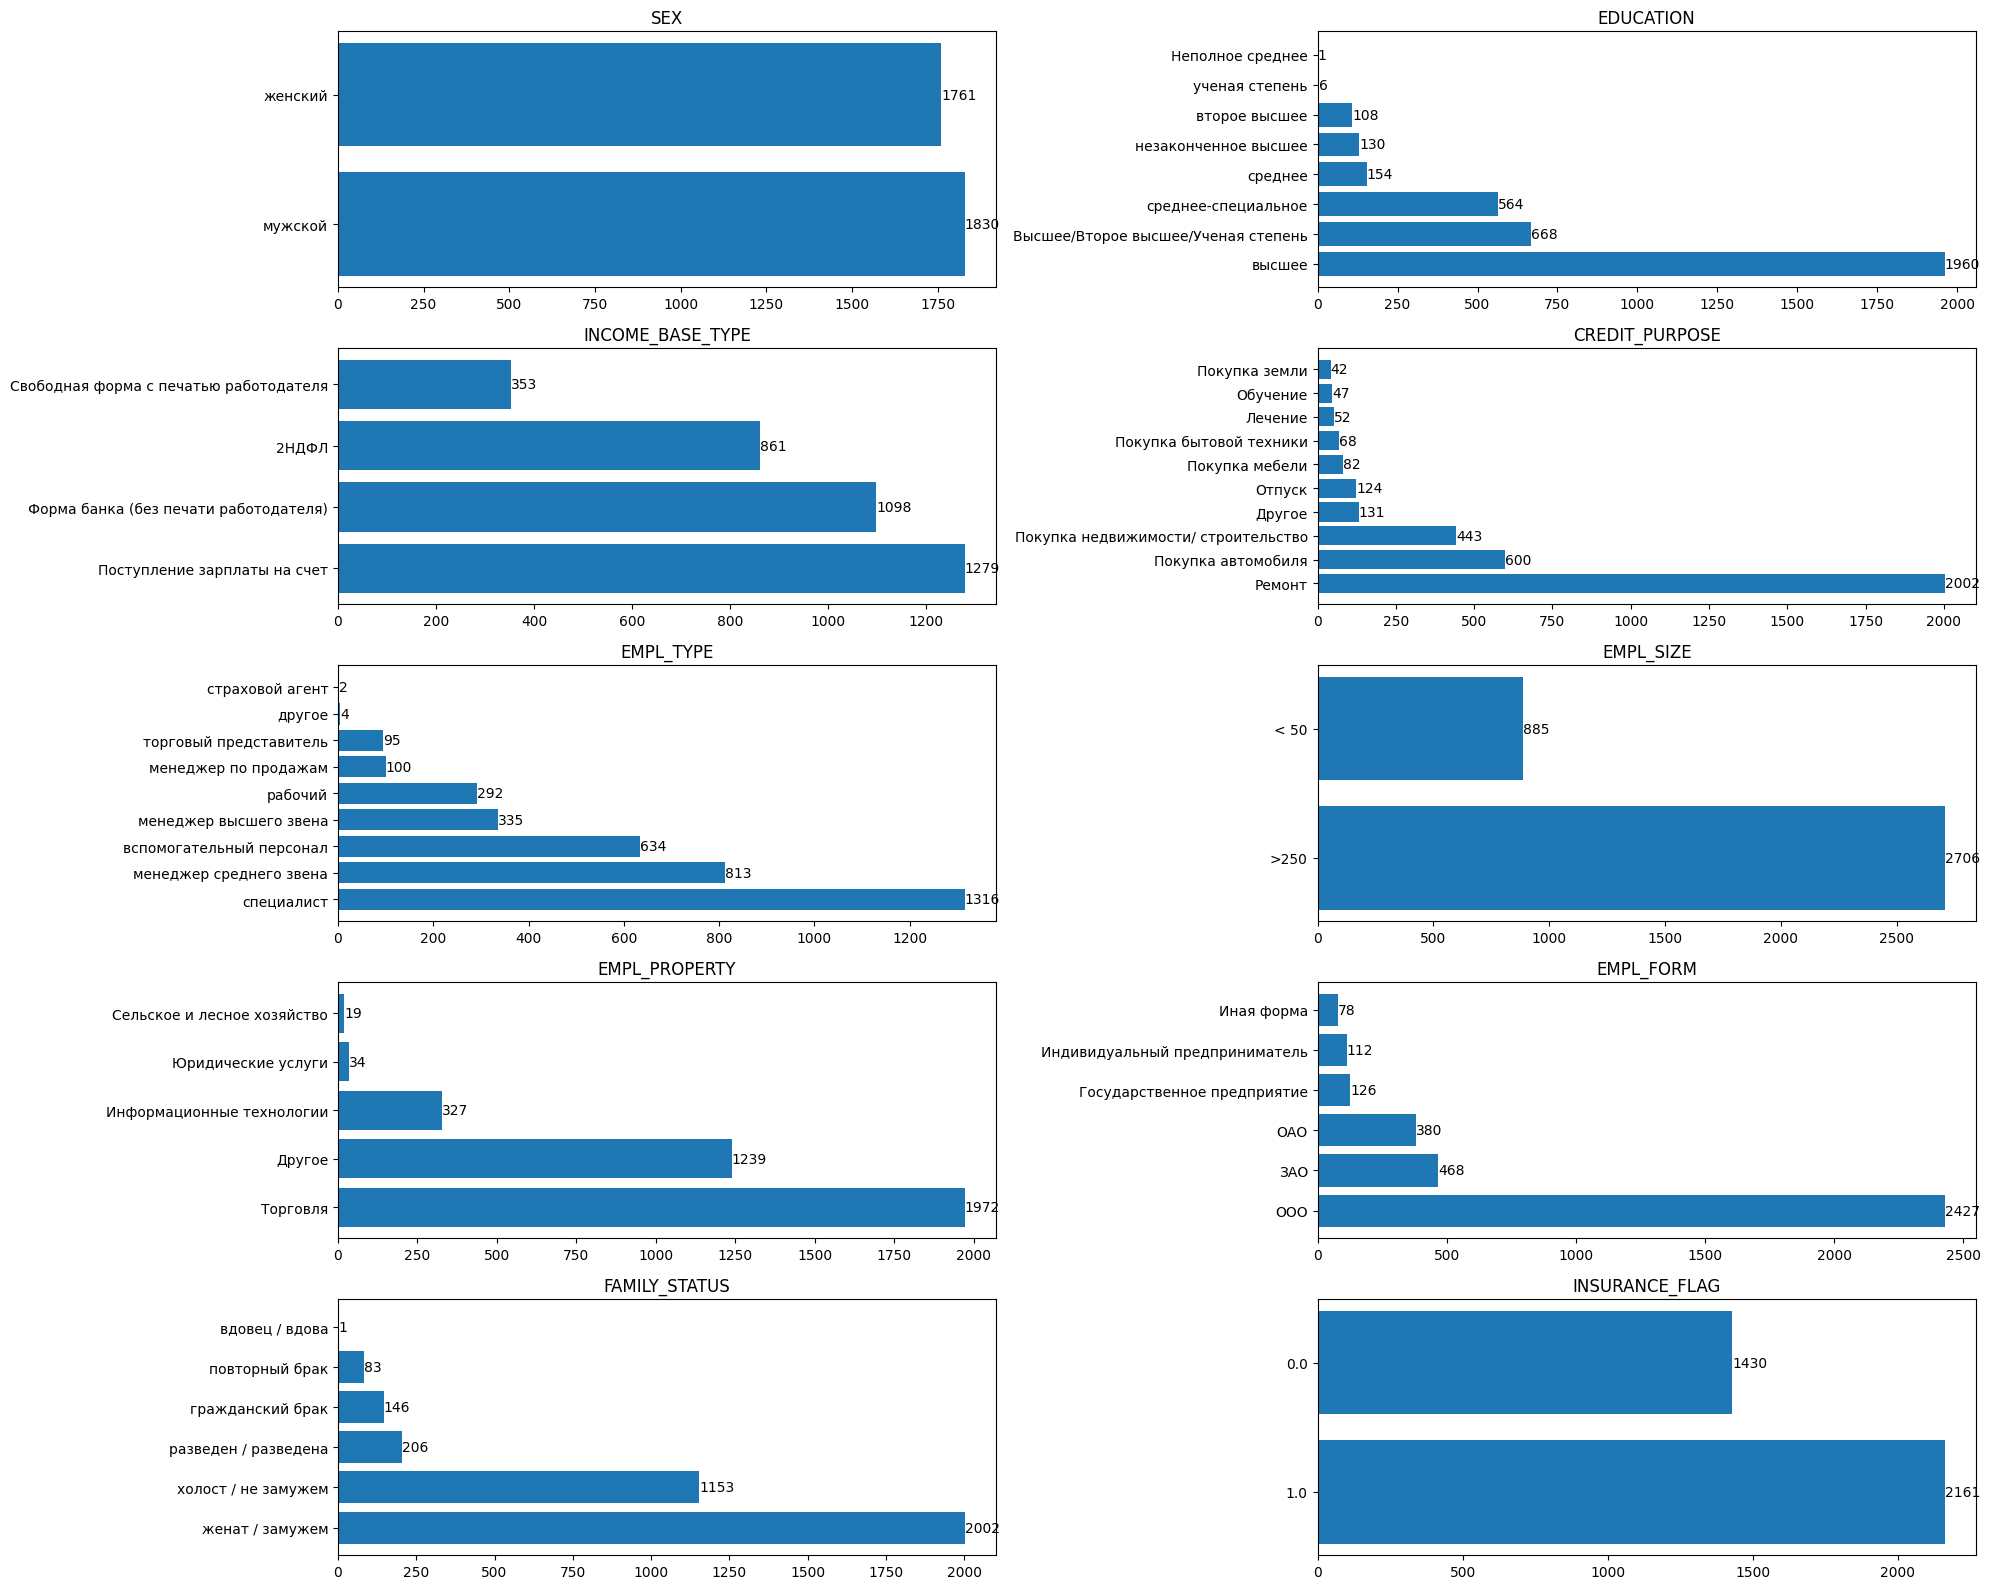

In [457]:
cols = ['SEX', 'EDUCATION','INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'EMPL_TYPE', 
        'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'INSURANCE_FLAG']

fig, axes = plt.subplots(5, 2, figsize=(20, 16))
axes = axes.flatten()  # Делаем плоский массив из 10 элементов

for idx, col in enumerate(cols):
    ax = axes[idx]  # Просто берем по индексу
    
    if col in df_clean.columns:
        counts = df_clean[col].value_counts()
        
        ax.barh(range(len(counts)), counts.values)
        
        for i, count in enumerate(counts.values):
            ax.text(count, i, count, ha='left', va='center')
        
        ax.set_title(col)
        ax.set_yticks(range(len(counts)))
        ax.set_yticklabels(counts.index)

plt.tight_layout()
plt.show()

$\text{Исходя из полученных результатов наиболее часто встречающимся в нашей выборке (по категориальным признакам) клиентом является:}\\
\text{женатый мужчина 34 лет с высоким показателем дохода, специалист, (работодатель в сфере торговли),Организационно - правовая форма: ООО,}\\
\text{Берущий кредит на ремонт, без детей или иждевенцев в семье.}$

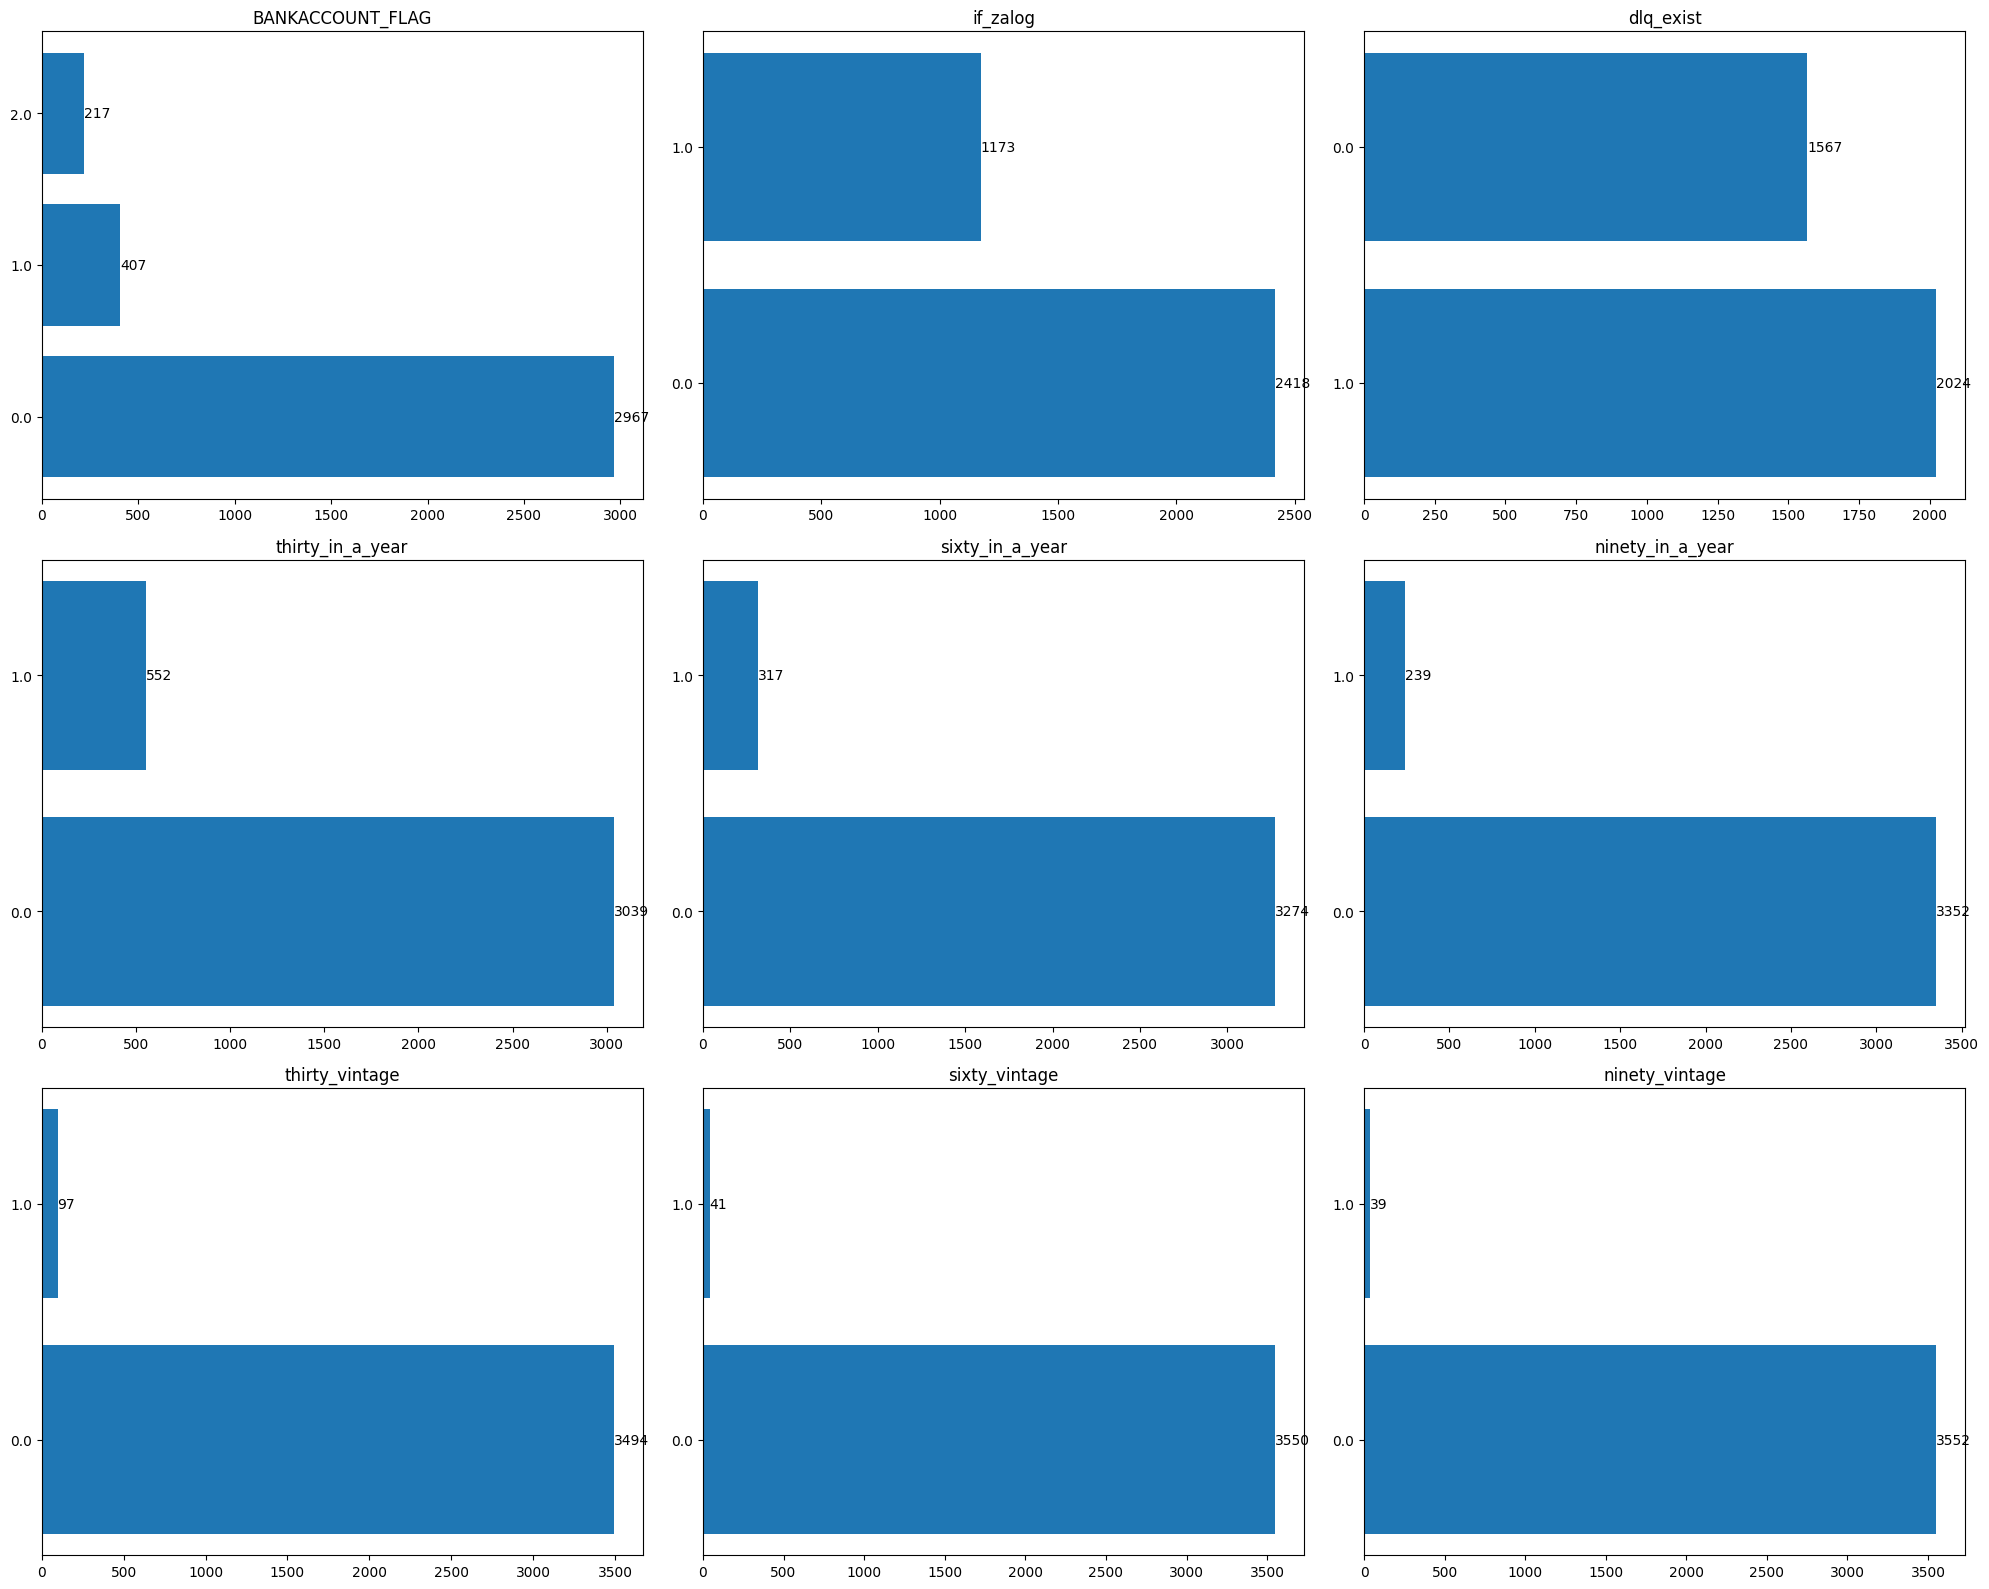

In [458]:
cols = ['BANKACCOUNT_FLAG', 'if_zalog','dlq_exist', 'thirty_in_a_year', 
        'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 
        'sixty_vintage', 'ninety_vintage']

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(cols):

    ax = axes[idx]  
    
    if col in df_clean.columns:
        counts = df_clean[col].value_counts()
        
        ax.barh(range(len(counts)), counts.values)
        
        for i, count in enumerate(counts.values):
            ax.text(count, i, count, ha='left', va='center')
        
        ax.set_title(col)
        ax.set_yticks(range(len(counts)))
        ax.set_yticklabels(counts.index)

plt.tight_layout()
plt.show()

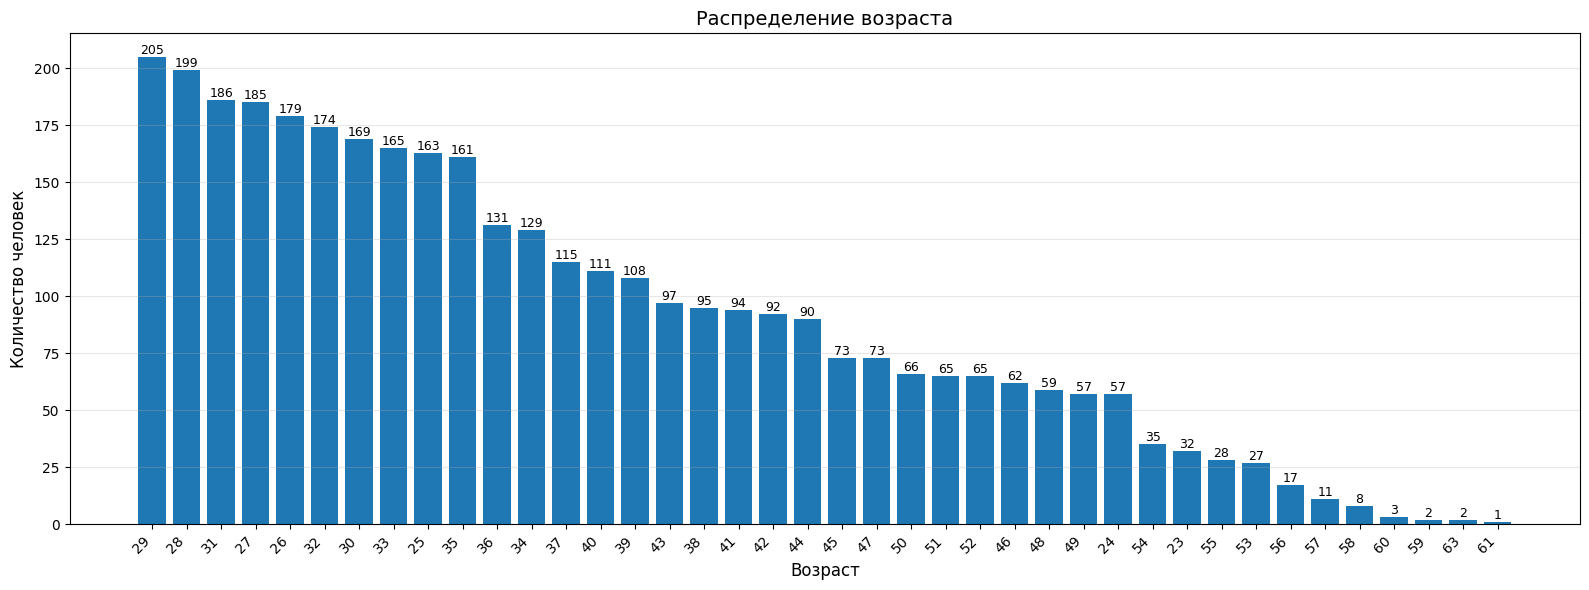

In [ ]:
plt.figure(figsize=(16, 6))

# Считаем и сортируем
age_counts = df_clean['age'].value_counts().sort_values(ascending=False)

age_counts.index = age_counts.index.astype(int)

plt.bar(range(len(age_counts)), age_counts.values)

for i, count in enumerate(age_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=9)

plt.title('Распределение возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество человек', fontsize=12)

plt.xticks(range(len(age_counts)), age_counts.index, rotation=45, ha='right')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [460]:
df_res = df_clean.copy()

$\text{Теперь необходимо закодировать данные для образования можно использовать labeling, так как грубо говоря можно определить.}\\
\text{какое образование к какому ближе и упорядочить этот признак, для остальных используем one-hot-encoding}$

In [ ]:
df_res['SEX'] = df_res['SEX'].replace({ #бинарный признак можем не делать one-hot-encoding чтобы не увеличивать размерность лишний раз 
    'мужской': 0.0,
    'женский': 1.0
}).astype(float)

df_res['EDUCATION'] = df_res['EDUCATION'].replace({
    'Неполное среднее': 0.0,
    'среднее': 1.0,
    'среднее-специальное': 2.0,
    'незаконченное высшее': 3.0,
    'высшее': 4.0,
    'второе высшее': 5.0,
    'ученая степень': 6.0,
    'Высшее/Второе высшее/Ученая степень': 5.0  #взяли как среднее, есть сомнения в корректности такого подхода, но лучше сократить число уникальных категорий
}).astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6268\3856261860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_res['SEX'] = df_res['SEX'].replace({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6268\3856261860.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_res['EDUCATION'] = df_res['EDUCATION'].replace({


$\text{one-hot-encoding, добавляем новые столбцы с кодировкой, удаляя при этом старые.}\\
\text{Таким образом Переводим категориальные показатели в целочисленные}$

$\text{Изначально делал one-hot-encoding, для всех категориальных значений для образования и пола в том числе.}\\
\text{что в целом тоже корректно и дало очень близкие результаты, но в итоге было принято решение не увеличивать лишний раз размерность}$

In [462]:


# Для пола
#  - One-Hot
#df_res = pd.concat([#
    #df_res.drop('SEX', axis=1),
    #pd.get_dummies(df_res['SEX'], prefix='SEX', dtype='float64')
#], axis=1)

#########################################################################################################################

#df_res = pd.concat([
    #df_res.drop('EDUCATION', axis=1),
    #pd.get_dummies(df_res['EDUCATION'], prefix='EDUCATION', dtype='float64')
#], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('INCOME_BASE_TYPE', axis=1),
    pd.get_dummies(df_res['INCOME_BASE_TYPE'], prefix='INCOME_BASE_TYPE', dtype='float64')
], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('CREDIT_PURPOSE', axis=1),
    pd.get_dummies(df_res['CREDIT_PURPOSE'], prefix='CREDIT_PURPOSE', dtype='float64')
], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('EMPL_TYPE', axis=1),
    pd.get_dummies(df_res['EMPL_TYPE'], prefix='EMPL_TYPE', dtype='float64')
], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('EMPL_SIZE', axis=1),
    pd.get_dummies(df_res['EMPL_SIZE'], prefix='EMPL_SIZE', dtype='float64')
], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('EMPL_PROPERTY', axis=1),
    pd.get_dummies(df_res['EMPL_PROPERTY'], prefix='EMPL_PROPERTY', dtype='float64')
], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('EMPL_FORM', axis=1),
    pd.get_dummies(df_res['EMPL_FORM'], prefix='EMPL_FORM', dtype='float64')
], axis=1)

#########################################################################################################################

df_res = pd.concat([
    df_res.drop('FAMILY_STATUS', axis=1),
    pd.get_dummies(df_res['FAMILY_STATUS'], prefix='FAMILY_STATUS', dtype='float64')
], axis=1)


$\text{Смотрим на результат после one-hot-encoding}\\
\text{Видим что появились новые столбцы, все корректно, теперь в таблице 78 столбцов}$

In [463]:
df_res.head()

INSURANCE_FLAG   DTI  SEX  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0            1.0  0.11  1.0                      1                 0   
1            0.0  0.33  1.0                      0                 0   
2            0.0  0.48  1.0                      0                 0   
4            1.0  0.36  0.0                      1                 0   
5            1.0  0.52  0.0                      1                 0   

   EDUCATION BANKACCOUNT_FLAG  Period_at_work   age  max90days  max60days  \
0        4.0              0.0            37.0  43.0        0.0        0.0   
1        4.0              0.0            16.0  34.0        2.0        2.0   
2        5.0              0.0            53.0  35.0        3.0        2.0   
4        2.0              0.0            49.0  26.0        0.0        0.0   
5        4.0              2.0            19.0  30.0        1.0        1.0   

   max30days  max21days  max14days  avg_num_delay if_zalog  \
0        0.0        0.0        0.0       0.000000      1.0   
1        2.0        1.0        0.0       0.000000      0.0   
2        2.0        1.0        1.0       0.000000      0.0   
4        0.0        0.0        0.0       0.000000      1.0   
5        1.0        1.0        1.0       0.170732      0.0   

   num_AccountActive180  num_AccountActive90  num_AccountActive60  \
0                   0.0                  0.0                  0.0   
1                   1.0                  1.0                  1.0   
2                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   
5                   0.0                  0.0                  0.0   

   Active_to_All_prc  numAccountActiveAll  numAccountClosed  \
0           0.000000                  0.0               3.0   
1           1.000000                  1.0               0.0   
2           0.333333                  1.0               2.0   
4           0.000000                  0.0               5.0   
5           0.444444                  4.0               5.0   

   sum_of_paym_months  all_credits  Active_not_cc  own_closed  \
0                13.0          3.0            0.0         0.0   
1                 1.0          1.0            1.0         0.0   
2                14.0          3.0            0.0         0.0   
4                47.0          5.0            0.0         4.0   
5               102.0          9.0            3.0         0.0   

   min_MnthAfterLoan  max_MnthAfterLoan dlq_exist thirty_in_a_year  \
0               28.0               86.0       0.0              0.0   
1                0.0                0.0       0.0              0.0   
2                6.0               23.0       0.0              0.0   
4               17.0               52.0       0.0              0.0   
5               12.0               94.0       1.0              1.0   

  sixty_in_a_year ninety_in_a_year thirty_vintage sixty_vintage  \
0             0.0              0.0            0.0           0.0   
1             0.0              0.0            0.0           0.0   
2             0.0              0.0            0.0           0.0   
4             0.0              0.0            0.0           0.0   
5             1.0              1.0            0.0           0.0   

  ninety_vintage  INCOME_BASE_TYPE_2НДФЛ  \
0            0.0                     0.0   
1            0.0                     0.0   
2            0.0                     1.0   
4            0.0                     1.0   
5            1.0                     0.0   

   INCOME_BASE_TYPE_Поступление зарплаты на счет  \
0                                            1.0   
1                                            1.0   
2                                            0.0   
4                                            0.0   
5                                            0.0   

   INCOME_BASE_TYPE_Свободная форма с печатью работодателя  \
0                                                0.0         
1                     

In [464]:
# Преобразуем все object колонки в чиловой тип
for col in df_res.columns:
    if df_res[col].dtype == 'object':
        df_res[col] = pd.to_numeric(df_res[col], errors='coerce').astype('float64')

In [465]:

def columnValues(df):

    total_rows = len(df)

    unique_count = df.nunique()
    zeros_count = (df == 0).sum(axis=0)
    nan_count = df.isna().sum()

    # Рассчитываем проценты
    unique_percent = round((unique_count / total_rows * 100), 1)
    zeros_percent = round((zeros_count / total_rows * 100), 1)
    nan_percent = round((nan_count / total_rows * 100), 1)
    data_types = df.dtypes

    # Формируем строку: каждая метрика сразу со своим процентом
    row = [unique_count, f"{unique_percent}%",
           zeros_count, f"{zeros_percent}%",
           nan_count, f"{nan_percent}%",
           data_types]
    return row

data = []
for column in df_res.columns:
    data.append([column] + columnValues(df_res[column]))

print(tabulate(data, headers=['Column', 'Unique', '% of_Unique', 'Zeros', '% of_Zeros', 'NaNs', '% of_NaNs', 'dtype'],
               tablefmt='orgtbl'))

| Column                                                  |   Unique | % of_Unique   |   Zeros | % of_Zeros   |   NaNs | % of_NaNs   | dtype   |
|---------------------------------------------------------+----------+---------------+---------+--------------+--------+-------------+---------|
| INSURANCE_FLAG                                          |        2 | 0.1%          |    1430 | 39.8%        |      0 | 0.0%        | float64 |
| DTI                                                     |       59 | 1.6%          |       0 | 0.0%         |      0 | 0.0%        | float64 |
| SEX                                                     |        2 | 0.1%          |    1830 | 51.0%        |      0 | 0.0%        | float64 |
| FULL_AGE_CHILD_NUMBER                                   |        6 | 0.2%          |    2142 | 59.6%        |      0 | 0.0%        | int64   |
| DEPENDANT_NUMBER                                        |        4 | 0.1%          |    3583 | 99.8%        |      0 | 0.0%     

In [417]:
df_res.head()

INSURANCE_FLAG   DTI  SEX  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0             1.0  0.11  1.0                      1                 0   
1             0.0  0.33  1.0                      0                 0   
2             0.0  0.48  1.0                      0                 0   
4             1.0  0.36  0.0                      1                 0   
5             1.0  0.52  0.0                      1                 0   

   EDUCATION  BANKACCOUNT_FLAG  Period_at_work   age  max90days  max60days  \
0        4.0               0.0            37.0  43.0        0.0        0.0   
1        4.0               0.0            16.0  34.0        2.0        2.0   
2        5.0               0.0            53.0  35.0        3.0        2.0   
4        2.0               0.0            49.0  26.0        0.0        0.0   
5        4.0               2.0            19.0  30.0        1.0        1.0   

   max30days  max21days  max14days  avg_num_delay  if_zalog  \
0        0.0        0.0        0.0       0.000000       1.0   
1        2.0        1.0        0.0       0.000000       0.0   
2        2.0        1.0        1.0       0.000000       0.0   
4        0.0        0.0        0.0       0.000000       1.0   
5        1.0        1.0        1.0       0.170732       0.0   

   num_AccountActive180  num_AccountActive90  num_AccountActive60  \
0                   0.0                  0.0                  0.0   
1                   1.0                  1.0                  1.0   
2                   0.0                  0.0                  0.0   
4                   0.0                  0.0                  0.0   
5                   0.0                  0.0                  0.0   

   Active_to_All_prc  numAccountActiveAll  numAccountClosed  \
0           0.000000                  0.0               3.0   
1           1.000000                  1.0               0.0   
2           0.333333                  1.0               2.0   
4           0.000000                  0.0               5.0   
5           0.444444                  4.0               5.0   

   sum_of_paym_months  all_credits  Active_not_cc  own_closed  \
0                13.0          3.0            0.0         0.0   
1                 1.0          1.0            1.0         0.0   
2                14.0          3.0            0.0         0.0   
4                47.0          5.0            0.0         4.0   
5               102.0          9.0            3.0         0.0   

   min_MnthAfterLoan  max_MnthAfterLoan  dlq_exist  thirty_in_a_year  \
0               28.0               86.0        0.0               0.0   
1                0.0                0.0        0.0               0.0   
2                6.0               23.0        0.0               0.0   
4               17.0               52.0        0.0               0.0   
5               12.0               94.0        1.0               1.0   

   sixty_in_a_year  ninety_in_a_year  thirty_vintage  sixty_vintage  \
0              0.0               0.0             0.0            0.0   
1              0.0               0.0             0.0            0.0   
2              0.0               0.0             0.0            0.0   
4              0.0               0.0             0.0            0.0   
5              1.0               1.0             0.0            0.0   

   ninety_vintage  INCOME_BASE_TYPE_2НДФЛ  \
0             0.0                     0.0   
1             0.0                     0.0   
2             0.0                     1.0   
4             0.0                     1.0   
5             1.0                     0.0   

   INCOME_BASE_TYPE_Поступление зарплаты на счет  \
0                                            1.0   
1                                            1.0   
2                                            0.0   
4                                            0.0   
5                                            0.0   

   INCOME_BASE_TYPE_Свободная форма с печатью работодателя  \
0                        


$\text{В новом датафрейме практически нет пропущенных значений, то есть более высока полнота данных по оставшимся клиентам}\\
\text{Получили итоговую витрину данных для сегментации, без пропусков, без некорректных значений, максимальная полнота данных по клиентам}$


$\text{Переходим к кластеризации}$

In [466]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

In [467]:
from sklearn.cluster import KMeans #DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [468]:
df_res.shape[0]

3591

$\text{Подготовка данных}\\  \text{Сначала проводим нормализацию, после чего используем РСА}\\ \text{(один из основных способов уменьшить размерность данных, 
потеряв наименьшее количество информации)}\\ $

In [469]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_res)

In [470]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)



$\text{Используем метод K-means}\\$

$\text{Метод локтя для определения оптимального числа кластеров}\\ $

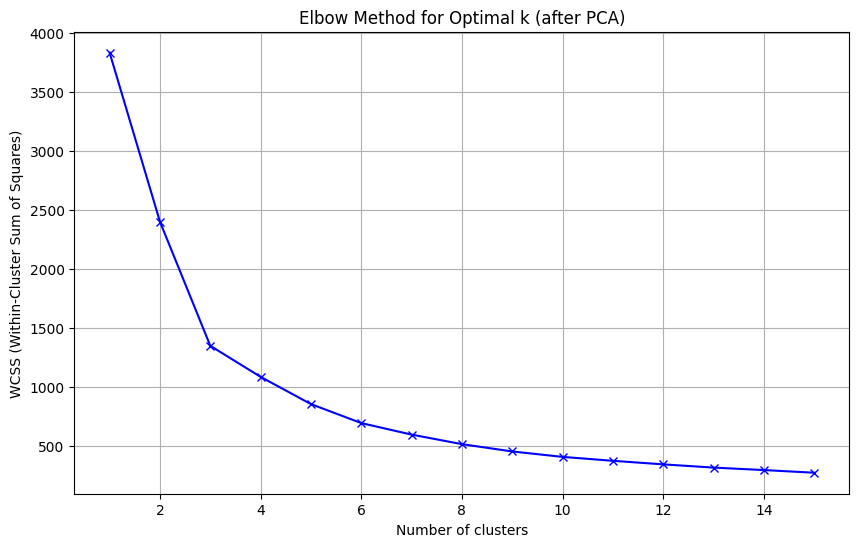

In [471]:
# k means determine k
distortions = []
K = range(1, 16)

for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_) 

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k (after PCA)')
plt.grid(True)
plt.show()

In [472]:
results_sil_kmeans = {}
for i in range(2, 16):

    kmeans = KMeans(n_clusters=i, max_iter=500, n_init=20, random_state=7)
    labels = kmeans.fit_predict(X_pca)
    
    sil_score = silhouette_score(X_pca, labels)
    results_sil_kmeans.update({i: sil_score})

$\text{Метод силуэта для определения оптимального числа кластеров}\\  \text{Если S(i) близко к 1, то точка правильно назначена и может быть интерпретирована как принадлежащая к ‘соответствующему’ кластеру}\\ $

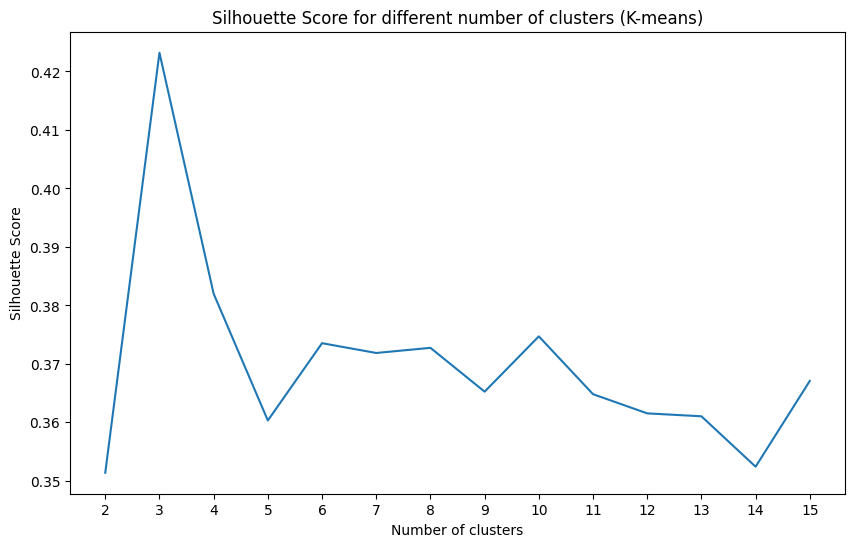

In [473]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

$Метод$ $Дэвиса-Болдина$

In [474]:
from sklearn.metrics import davies_bouldin_score
results_db_kmeans = {}
for i in range(2, 16):

    kmeans = KMeans(n_clusters = i, max_iter=500, n_init=20, random_state=7)
    labels = kmeans.fit_predict(X_pca)

    db_index = davies_bouldin_score(X_pca, labels)
    results_db_kmeans.update({i: db_index})

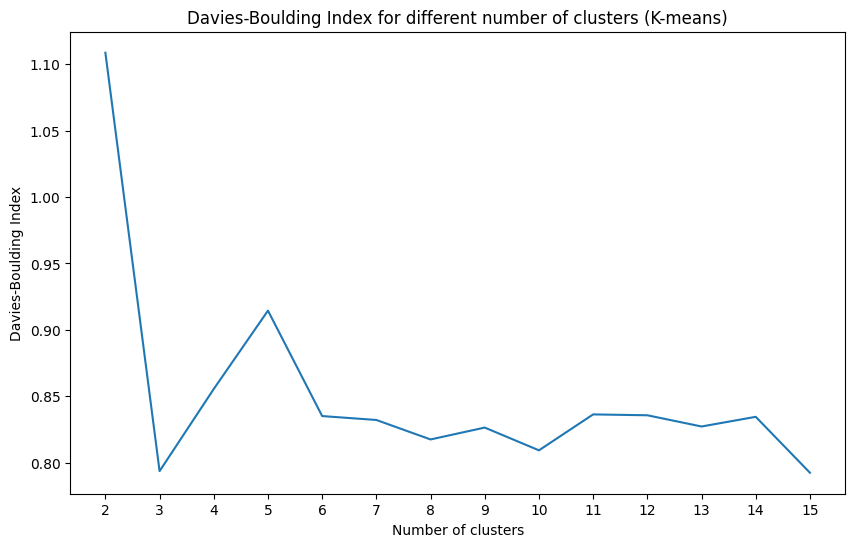

In [475]:

plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

$\text{Еще раз внимательно посмотрим на результаты, которые дает нам метод локтя и силуэта,}\\  \text{Для метода локтя видим изгибы на 3 и 6 кластерах, метод силуэта дает лучшее значение при 3 кластерах и неплохой показатель при 6}\\ \text{Так как требуется минимально 5 кластеров, возьмем для шести кластеров, для 3-ех также продемонстрируем кластеризацию} $

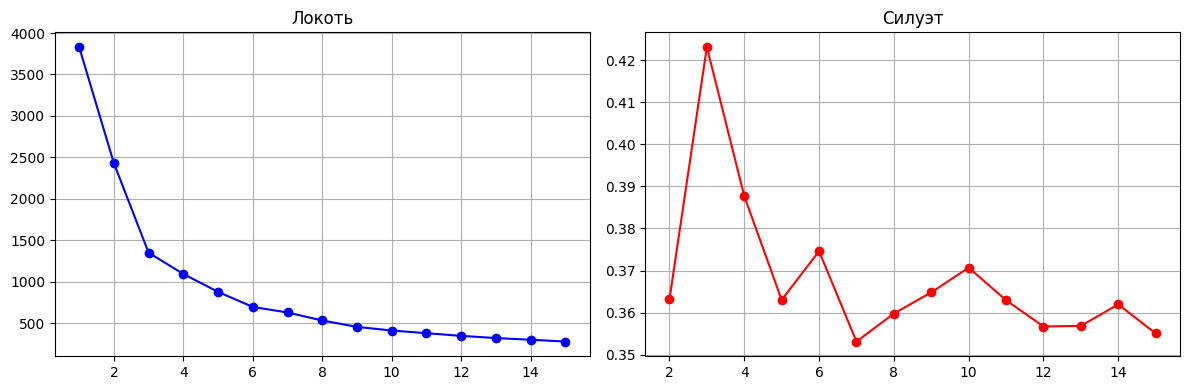

In [ ]:

#Метод локтя и силуэта

inertias = [KMeans(n_clusters=k, random_state=42).fit(X_pca).inertia_ 
            for k in range(1, 16)]

silhouettes = [silhouette_score(X_pca, 
                KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)) 
                for k in range(2, 16)]

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(range(1, 16), inertias, 'bo-'); ax1.set_title('Локоть'); ax1.grid(True)
ax2.plot(range(2, 16), silhouettes, 'ro-'); ax2.set_title('Силуэт'); ax2.grid(True)
plt.tight_layout(); plt.show()

$\text{Используем метод кластеризации K-means для найденного оптимального числа кластеров}\\ $

In [477]:
best_k = 6  # по методу локтя
min_k = 3   # минимальное 

# Сегментация 1:  k (6)
kmeans_best = KMeans(n_clusters=best_k, random_state=7, n_init=20)
labels_best = kmeans_best.fit_predict(X_pca)

# Сегментация 2: k (3)
kmeans_min = KMeans(n_clusters=min_k, random_state=7, n_init=20)
labels_min = kmeans_min.fit_predict(X_pca)

$\text{Визуализируем наше разбиение на кластеры. Визуализируем разбиение на 6 и на 3 кластера} $

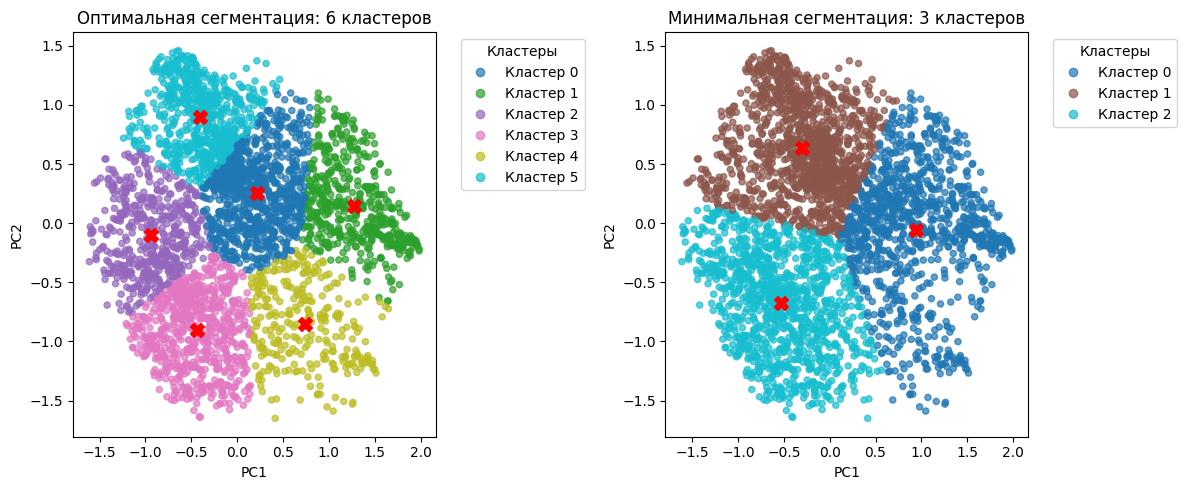

In [ ]:

X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Визуализация ДВУХ сегментаций
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# График 1: Оптимальное k (6)
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best, cmap='tab10', alpha=0.7, s=20)

# Вычисляем центры кластеров
centers_best = np.array([X_pca[labels_best == i].mean(axis=0) for i in range(best_k)])
axes[0].scatter(centers_best[:, 0], centers_best[:, 1], c='red', s=100, marker='X', label='Центры')
axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')
axes[0].set_title(f'Оптимальная сегментация: {best_k} кластеров')

# Добавляем легенду для кластеров
handles1, labels1 = scatter1.legend_elements()
axes[0].legend(handles1, [f'Кластер {i}' for i in range(best_k)], 
               title="Кластеры", bbox_to_anchor=(1.05, 1), loc='upper left')


# График 2: k (3)
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_min, cmap='tab10', alpha=0.7, s=20)
# Вычисляем центры кластеров
centers_min = np.array([X_pca[labels_min == i].mean(axis=0) for i in range(min_k)])
axes[1].scatter(centers_min[:, 0], centers_min[:, 1], c='red', s=100, marker='X', label='Центры')
axes[1].set_xlabel('PC1'); axes[1].set_ylabel('PC2')
axes[1].set_title(f'Минимальная сегментация: {min_k} кластеров')


# Добавляем легенду для кластеров
handles2, labels2 = scatter2.legend_elements()
axes[1].legend(handles2, [f'Кластер {i}' for i in range(min_k)], 
               title="Кластеры", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

$\text{Строим круговую диаграмму с процентом и количеством}\\  $

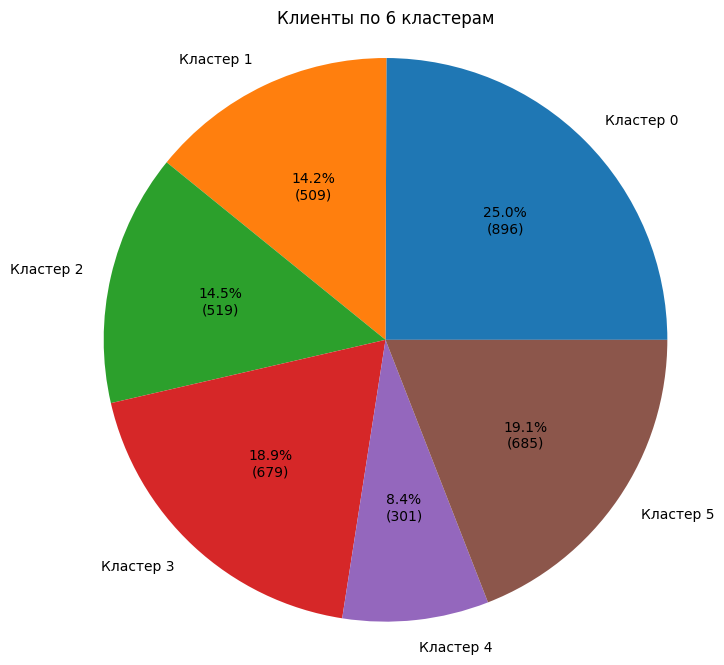

In [479]:
plt.figure(figsize=(8, 8))

cluster_counts = np.bincount(labels_best)

plt.pie(cluster_counts, 
        labels=[f'Кластер {i}' for i in range(best_k)],
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(cluster_counts))})')
plt.title(f'Клиенты по {best_k} кластерам')
plt.axis('equal')
plt.show()

$\text{Итого оптимальное количество кластеров равно шести: Кластеры примерно равновелики между собой,}\\  \text{Значения в кластерах могут быть схожи на границах кластеров, Внутри сегмента однородность максимальная,}\\ \text{Между сегментами однородность минимальна} $

In [ ]:
df_clean.head()

INCOME_BASE_TYPE  \
0            Поступление зарплаты на счет   
1            Поступление зарплаты на счет   
2                                   2НДФЛ   
4                                   2НДФЛ   
5  Свободная форма с печатью работодателя   

                        CREDIT_PURPOSE INSURANCE_FLAG   DTI      SEX  \
0                               Ремонт            1.0  0.11  женский   
1                               Отпуск            0.0  0.33  женский   
2                               Ремонт            0.0  0.48  женский   
4  Покупка недвижимости/ строительство            1.0  0.36  мужской   
5                        Покупка земли            1.0  0.52  мужской   

   FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0                      1                 0   
1                      0                 0   
2                      0                 0   
4                      1                 0   
5                      1                 0   

                             EDUCATION                EMPL_TYPE EMPL_SIZE  \
0                               высшее  менеджер среднего звена      >250   
1                               высшее               специалист      >250   
2  Высшее/Второе высшее/Ученая степень  менеджер среднего звена      >250   
4                  среднее-специальное                  рабочий      >250   
5                               высшее               специалист      >250   

  BANKACCOUNT_FLAG  Period_at_work   age              EMPL_PROPERTY  \
0              0.0            37.0  43.0                     Другое   
1              0.0            16.0  34.0                     Другое   
2              0.0            53.0  35.0                   Торговля   
4              0.0            49.0  26.0  Информационные технологии   
5              2.0            19.0  30.0                   Торговля   

    EMPL_FORM        FAMILY_STATUS  max90days  max60days  max30days  \
0  Иная форма      женат / замужем        0.0        0.0        0.0   
1         ЗАО  холост / не замужем        2.0        2.0        2.0   
2         ООО  холост / не замужем        3.0        2.0        2.0   
4         ЗАО      женат / замужем        0.0        0.0        0.0   
5         ООО      женат / замужем        1.0        1.0        1.0   

   max21days  max14days  avg_num_delay if_zalog  num_AccountActive180  \
0        0.0        0.0       0.000000      1.0                   0.0   
1        1.0        0.0       0.000000      0.0                   1.0   
2        1.0        1.0       0.000000      0.0                   0.0   
4        0.0        0.0       0.000000      1.0                   0.0   
5        1.0        1.0       0.170732      0.0                   0.0   

   num_AccountActive90  num_AccountActive60  Active_to_All_prc  \
0                  0.0                  0.0           0.000000   
1                  1.0                  1.0           1.000000   
2                  0.0                  0.0           0.333333   
4                  0.0                  0.0           0.000000   
5                  0.0                  0.0           0.444444   

   numAccountActiveAll  numAccountClosed  sum_of_paym_months  all_credits  \
0                  0.0               3.0                13.0          3.0   
1                  1.0               0.0                 1.0          1.0   
2                  1.0               2.0                14.0          3.0   
4                  0.0               5.0                47.0          5.0   
5                  4.0               5.0               102.0          9.0   

   Active_not_cc  own_closed  min_MnthAfterLoan  max_MnthAfterLoan dlq_exist  \
0            0.0         0.0               28.0               86.0       0.0   
1            1.0         0.0                0.0                0.0       0.0   
2            0.0         0.0                6.0               23.0       0.0   
4            0.0         4.0               17.0               52.0       0.0   
5            3.0         0.0

In [ ]:
df_clean['cluster'] = labels_best #добавляем метки кластеров к нашей таблице

In [481]:
df_res['cluster'] = labels_best

$\text{Смотрим на распределение данных внутри всех кластеров (делаем группировку по кластерам)}\\  \text{Для количественных считаем среднее и медианное значение по кластеру, для категориальных смотрим моду } $

In [ ]:
# Сначала определим типы переменных автоматически
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Убираем 'cluster' из списков, если он там есть
if 'cluster' in numeric_cols:
    numeric_cols.remove('cluster')

print(f"Количественные переменные: {numeric_cols}")
print("\n")
print(f"Категориальные переменные: {categorical_cols}")

Количественные переменные: ['DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'Period_at_work', 'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan']


Категориальные переменные: ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']


In [ ]:
# Группируем по кластерам и считаем статистику
print("РАСПРЕДЕЛЕНИЕ ДАННЫХ ВНУТРИ КЛАСТЕРОВ")

# Количественные переменные: средние и медианы
if numeric_cols:
    print("\n КОЛИЧЕСТВЕННЫЕ ПЕРЕМЕННЫЕ (средние):")
    numeric_means = df_clean.groupby('cluster')[numeric_cols].mean()
    print(numeric_means)

    print("\n КОЛИЧЕСТВЕННЫЕ ПЕРЕМЕННЫЕ (медианы):")
    numeric_medians = df_clean.groupby('cluster')[numeric_cols].median()
    print(numeric_medians)


# Категориальные переменные: мода (самое частое значение)
if categorical_cols:
    print("\n КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ (самые частые значения):")
    
    def get_mode(series):
        mode_vals = series.mode()
        return mode_vals.iloc[0] if not mode_vals.empty else None
    
    for col in categorical_cols:
        print(f"\n{col}:")
        mode_by_cluster = df_clean.groupby('cluster')[col].agg(get_mode)
        print(mode_by_cluster)

РАСПРЕДЕЛЕНИЕ ДАННЫХ ВНУТРИ КЛАСТЕРОВ

 КОЛИЧЕСТВЕННЫЕ ПЕРЕМЕННЫЕ (средние):
              DTI  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  Period_at_work  \
cluster                                                                      
0        0.387042               0.561384          0.001116       50.504464   
1        0.369647               0.731373          0.005882       55.301961   
2        0.393276               0.296724          0.000000       52.350674   
3        0.400750               0.747059          0.004412       80.095588   
4        0.357176               0.890365          0.003322       64.219269   
5        0.399982               0.287591          0.005839       42.259854   

               age  max90days  max60days  max30days  max21days  max14days  \
cluster                                                                     
0        35.287946   1.817639   1.244541   0.864721   0.625648   0.496059   
1        38.266667   1.760784   1.219608   0.888235   0.682353   0.

$\text{Делаем распределение возраста по шести полученным кластерам для наглядности (группы по 5 лет)}\\  
\text{Также посмотрим и некоторые другие распредление по количественным данным, которые помогут лучше оценить активность клиента,}\\ 
\text{количество кредитов, сумму платежей и тд.} $

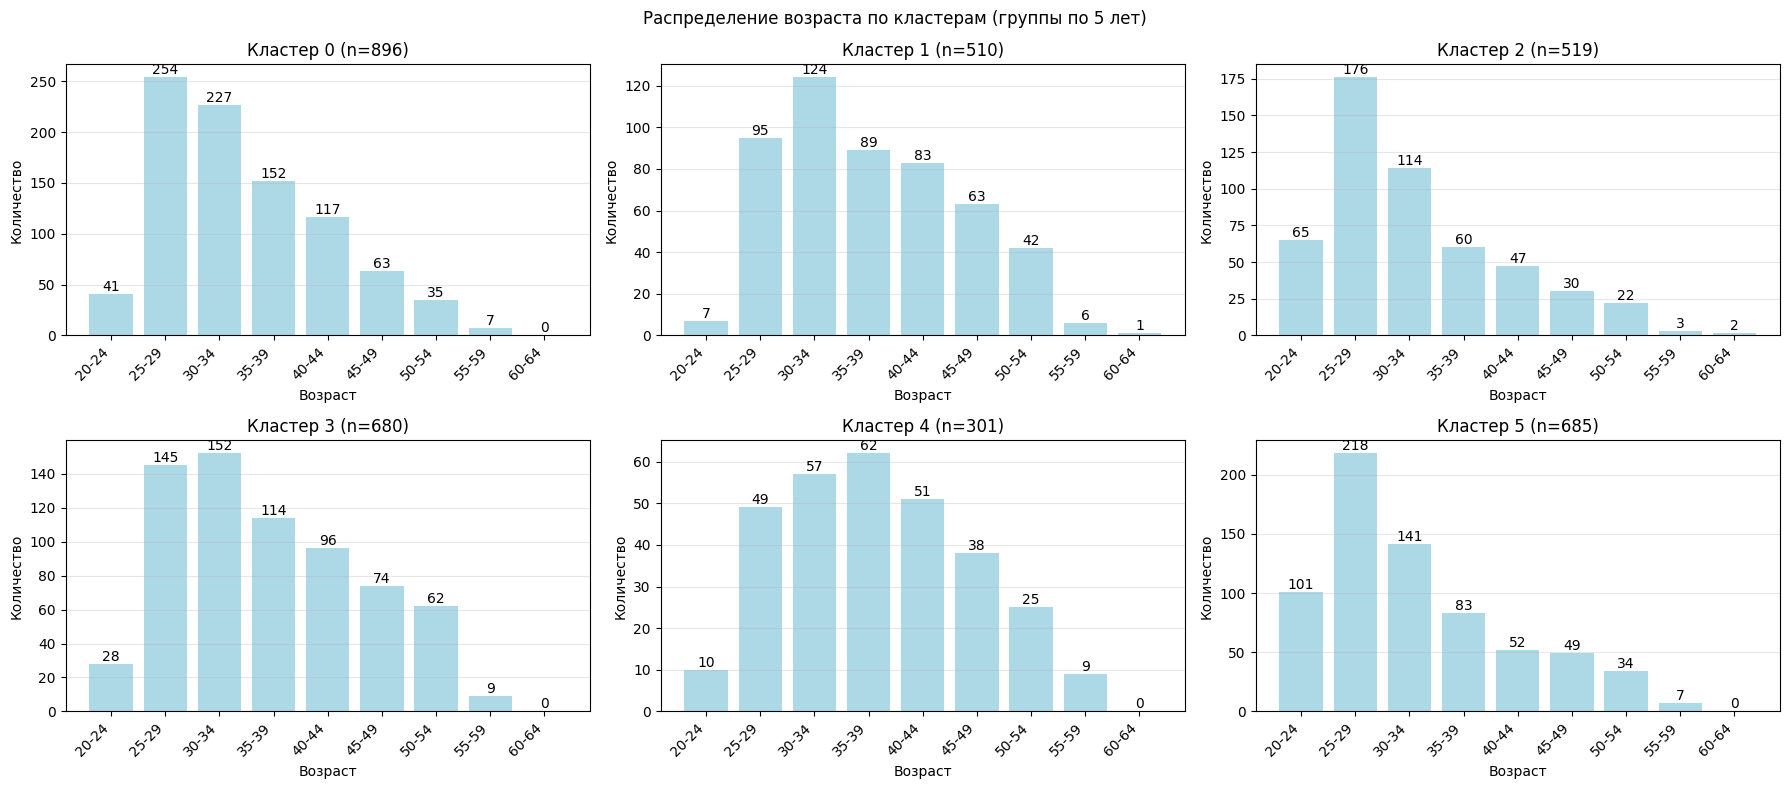

In [ ]:
# Простой вариант с группировкой по 5 лет
clusters = sorted(df_clean['cluster'].unique())
n_cols = 3
n_rows = (len(clusters) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

# Создаем группы
age_bins = list(range(20, 70, 5))
age_labels = [f'{age_bins[i]}-{age_bins[i+1]-1}' for i in range(len(age_bins)-1)]

for idx, cluster_num in enumerate(clusters):
    ax = axes[idx]
    
    cluster_data = df_clean[df_clean['cluster'] == cluster_num].copy()
    
    cluster_data['age_group'] = pd.cut(cluster_data['age'], bins=age_bins, 
                                       labels=age_labels, include_lowest=True)
    
    age_counts = cluster_data['age_group'].value_counts().sort_index()

    ax.bar(range(len(age_counts)), age_counts.values, color='lightblue')
    
    for i, count in enumerate(age_counts.values):
        ax.text(i, count, str(count), ha='center', va='bottom')
    
    ax.set_title(f'Кластер {cluster_num} (n={len(cluster_data)})')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Количество')
    ax.set_xticks(range(len(age_counts)))
    ax.set_xticklabels(age_counts.index, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')

for idx in range(len(clusters), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Распределение возраста по кластерам (группы по 5 лет)')
plt.tight_layout()
plt.show()

In [486]:

print("Возраст по кластерам:")
for cluster_num in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    print(f"Кластер {cluster_num}: средний = {cluster_data['age'].mean():.1f}, медиана = {cluster_data['age'].median():.0f}")

Возраст по кластерам:
Кластер 0: средний = 35.3, медиана = 34
Кластер 1: средний = 38.3, медиана = 37
Кластер 2: средний = 33.5, медиана = 31
Кластер 3: средний = 37.6, медиана = 36
Кластер 4: средний = 38.9, медиана = 38
Кластер 5: средний = 33.7, медиана = 31


$\text{Делаем распределение количества кредитов по шести полученным кластерам} $

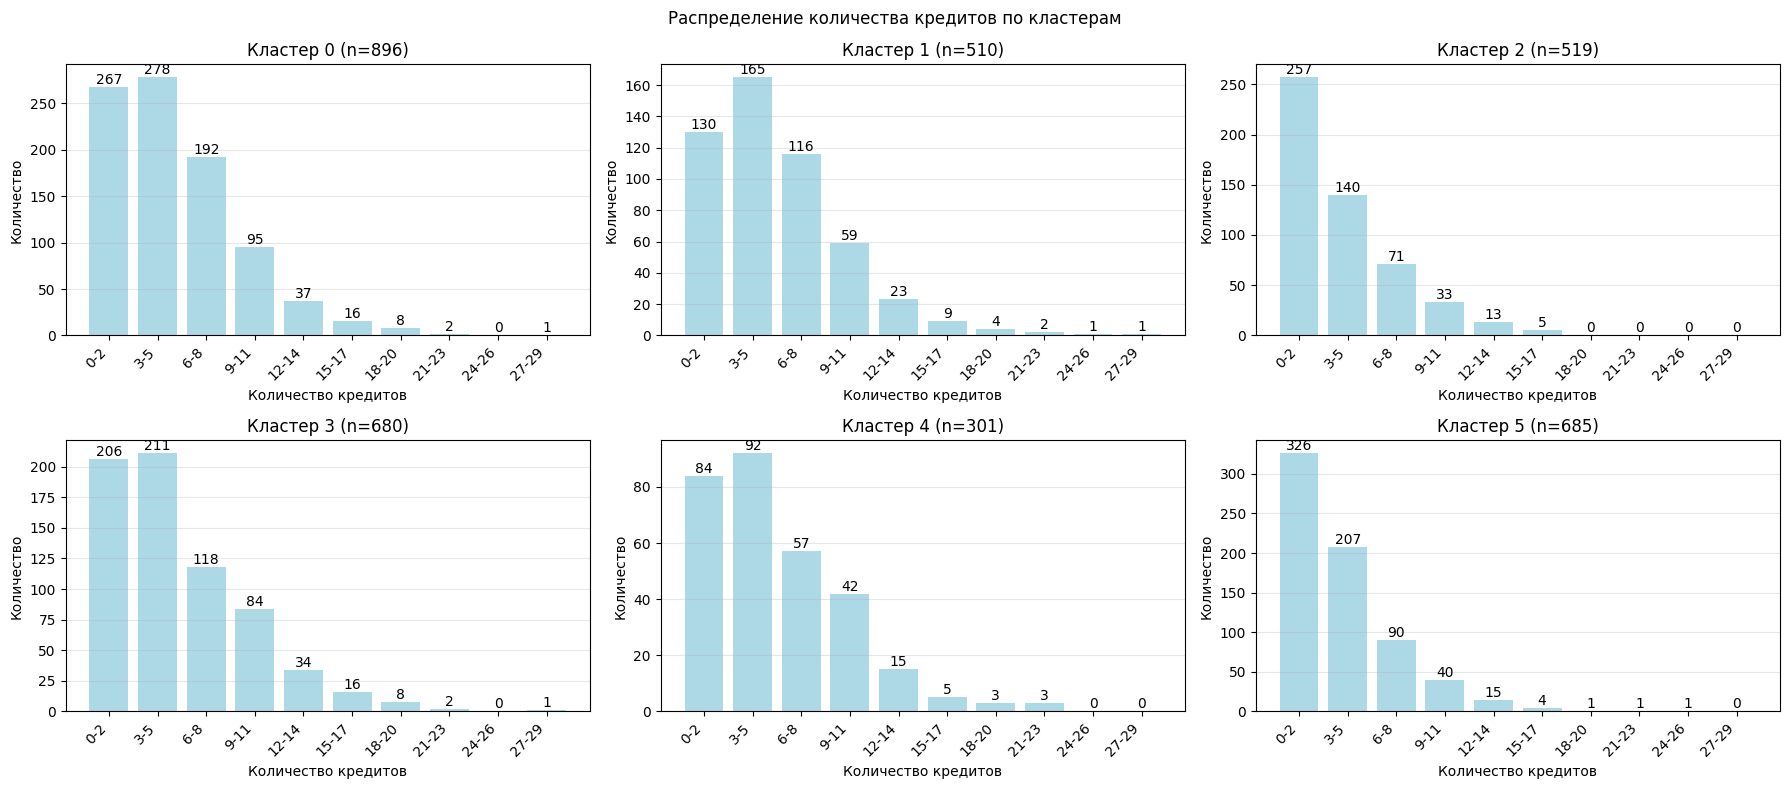

In [490]:
# Простой вариант с группировкой по 5 лет
clusters = sorted(df_clean['cluster'].unique())
n_cols = 3
n_rows = (len(clusters) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

# Создаем группы
age_bins = list(range(0, 31, 3))
age_labels = [f'{age_bins[i]}-{age_bins[i+1]-1}' for i in range(len(age_bins)-1)]

for idx, cluster_num in enumerate(clusters):
    ax = axes[idx]
    
    cluster_data = df_clean[df_clean['cluster'] == cluster_num].copy()
    
    cluster_data['group'] = pd.cut(cluster_data['all_credits'], bins=age_bins, 
                                       labels=age_labels, include_lowest=True)
    
    age_counts = cluster_data['group'].value_counts().sort_index()
    
    ax.bar(range(len(age_counts)), age_counts.values, color='lightblue')
    
    for i, count in enumerate(age_counts.values):
        ax.text(i, count, str(count), ha='center', va='bottom')
    
    ax.set_title(f'Кластер {cluster_num} (n={len(cluster_data)})')
    ax.set_xlabel('Количество кредитов')
    ax.set_ylabel('Количество')
    ax.set_xticks(range(len(age_counts)))
    ax.set_xticklabels(age_counts.index, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')


plt.suptitle('Распределение количества кредитов по кластерам')
plt.tight_layout()
plt.show()

In [491]:

print("Количество кредитов по кластерам:")
for cluster_num in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    print(f"Кластер {cluster_num}: средний = {cluster_data['all_credits'].mean():.1f}, медиана = {cluster_data['all_credits'].median():.0f}")

Количество кредитов по кластерам:
Кластер 0: средний = 6.2, медиана = 5
Кластер 1: средний = 6.4, медиана = 6
Кластер 2: средний = 4.5, медиана = 4
Кластер 3: средний = 6.3, медиана = 5
Кластер 4: средний = 6.5, медиана = 6
Кластер 5: средний = 4.5, медиана = 4


$\text{Делаем распределение сумм платежей за последний месяц по шести полученным кластерам} $

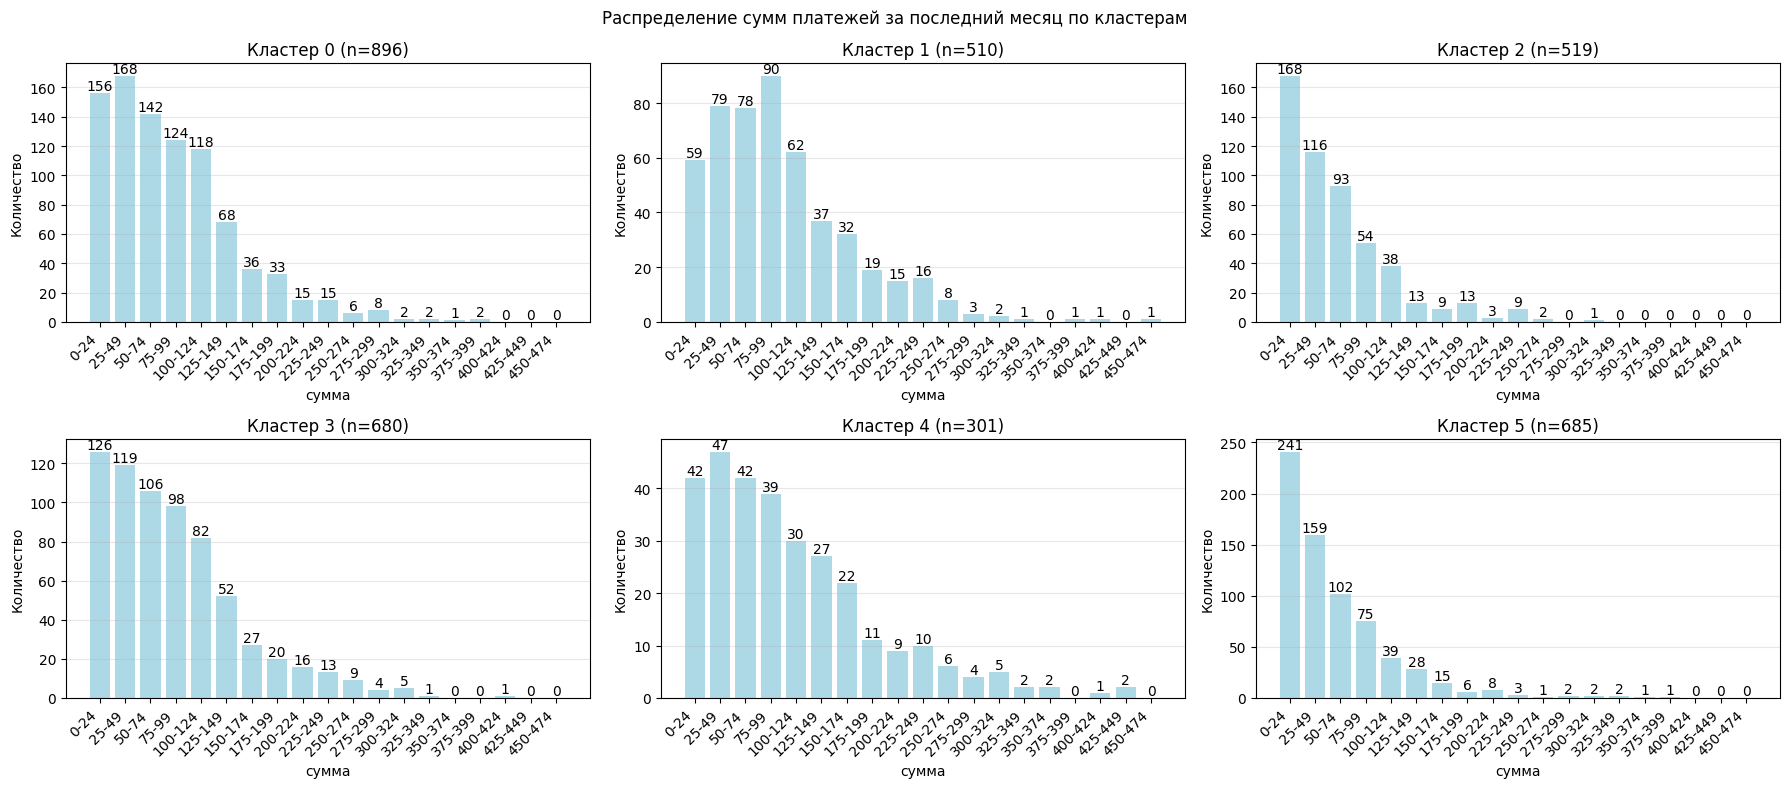

In [492]:

clusters = sorted(df_clean['cluster'].unique())
n_cols = 3
n_rows = (len(clusters) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

# Создаем группы
age_bins = list(range(0, 500, 25))
age_labels = [f'{age_bins[i]}-{age_bins[i+1]-1}' for i in range(len(age_bins)-1)]

for idx, cluster_num in enumerate(clusters):
    ax = axes[idx]
    

    cluster_data = df_clean[df_clean['cluster'] == cluster_num].copy()
    
   
    cluster_data['group'] = pd.cut(cluster_data['sum_of_paym_months'], bins=age_bins, 
                                       labels=age_labels, include_lowest=True)
    
    age_counts = cluster_data['group'].value_counts().sort_index()
    
    ax.bar(range(len(age_counts)), age_counts.values, color='lightblue')
    
    for i, count in enumerate(age_counts.values):
        ax.text(i, count, str(count), ha='center', va='bottom')
    
    ax.set_title(f'Кластер {cluster_num} (n={len(cluster_data)})')
    ax.set_xlabel('сумма')
    ax.set_ylabel('Количество')
    ax.set_xticks(range(len(age_counts)))
    ax.set_xticklabels(age_counts.index, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')

# Скрываем пустые оси
for idx in range(len(clusters), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Распределение сумм платежей за последний месяц по кластерам')
plt.tight_layout()
plt.show()

In [ ]:

print(" Сумма выплат за месяц по кластерам:")
for cluster_num in sorted(df_clean['cluster'].unique()):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    print(f"Кластер {cluster_num}: средний = {cluster_data['sum_of_paym_months'].mean():.1f}, медиана = {cluster_data['sum_of_paym_months'].median():.0f}")

 Сумма выплат за месяц по кластерам:
Кластер 0: средний = 84.9, медиана = 72
Кластер 1: средний = 103.4, медиана = 86
Кластер 2: средний = 58.7, медиана = 43
Кластер 3: средний = 86.7, медиана = 73
Кластер 4: средний = 108.0, медиана = 87
Кластер 5: средний = 56.9, медиана = 40


$\text{Делаем распределение категориальных признаков по шести полученным кластерам} $

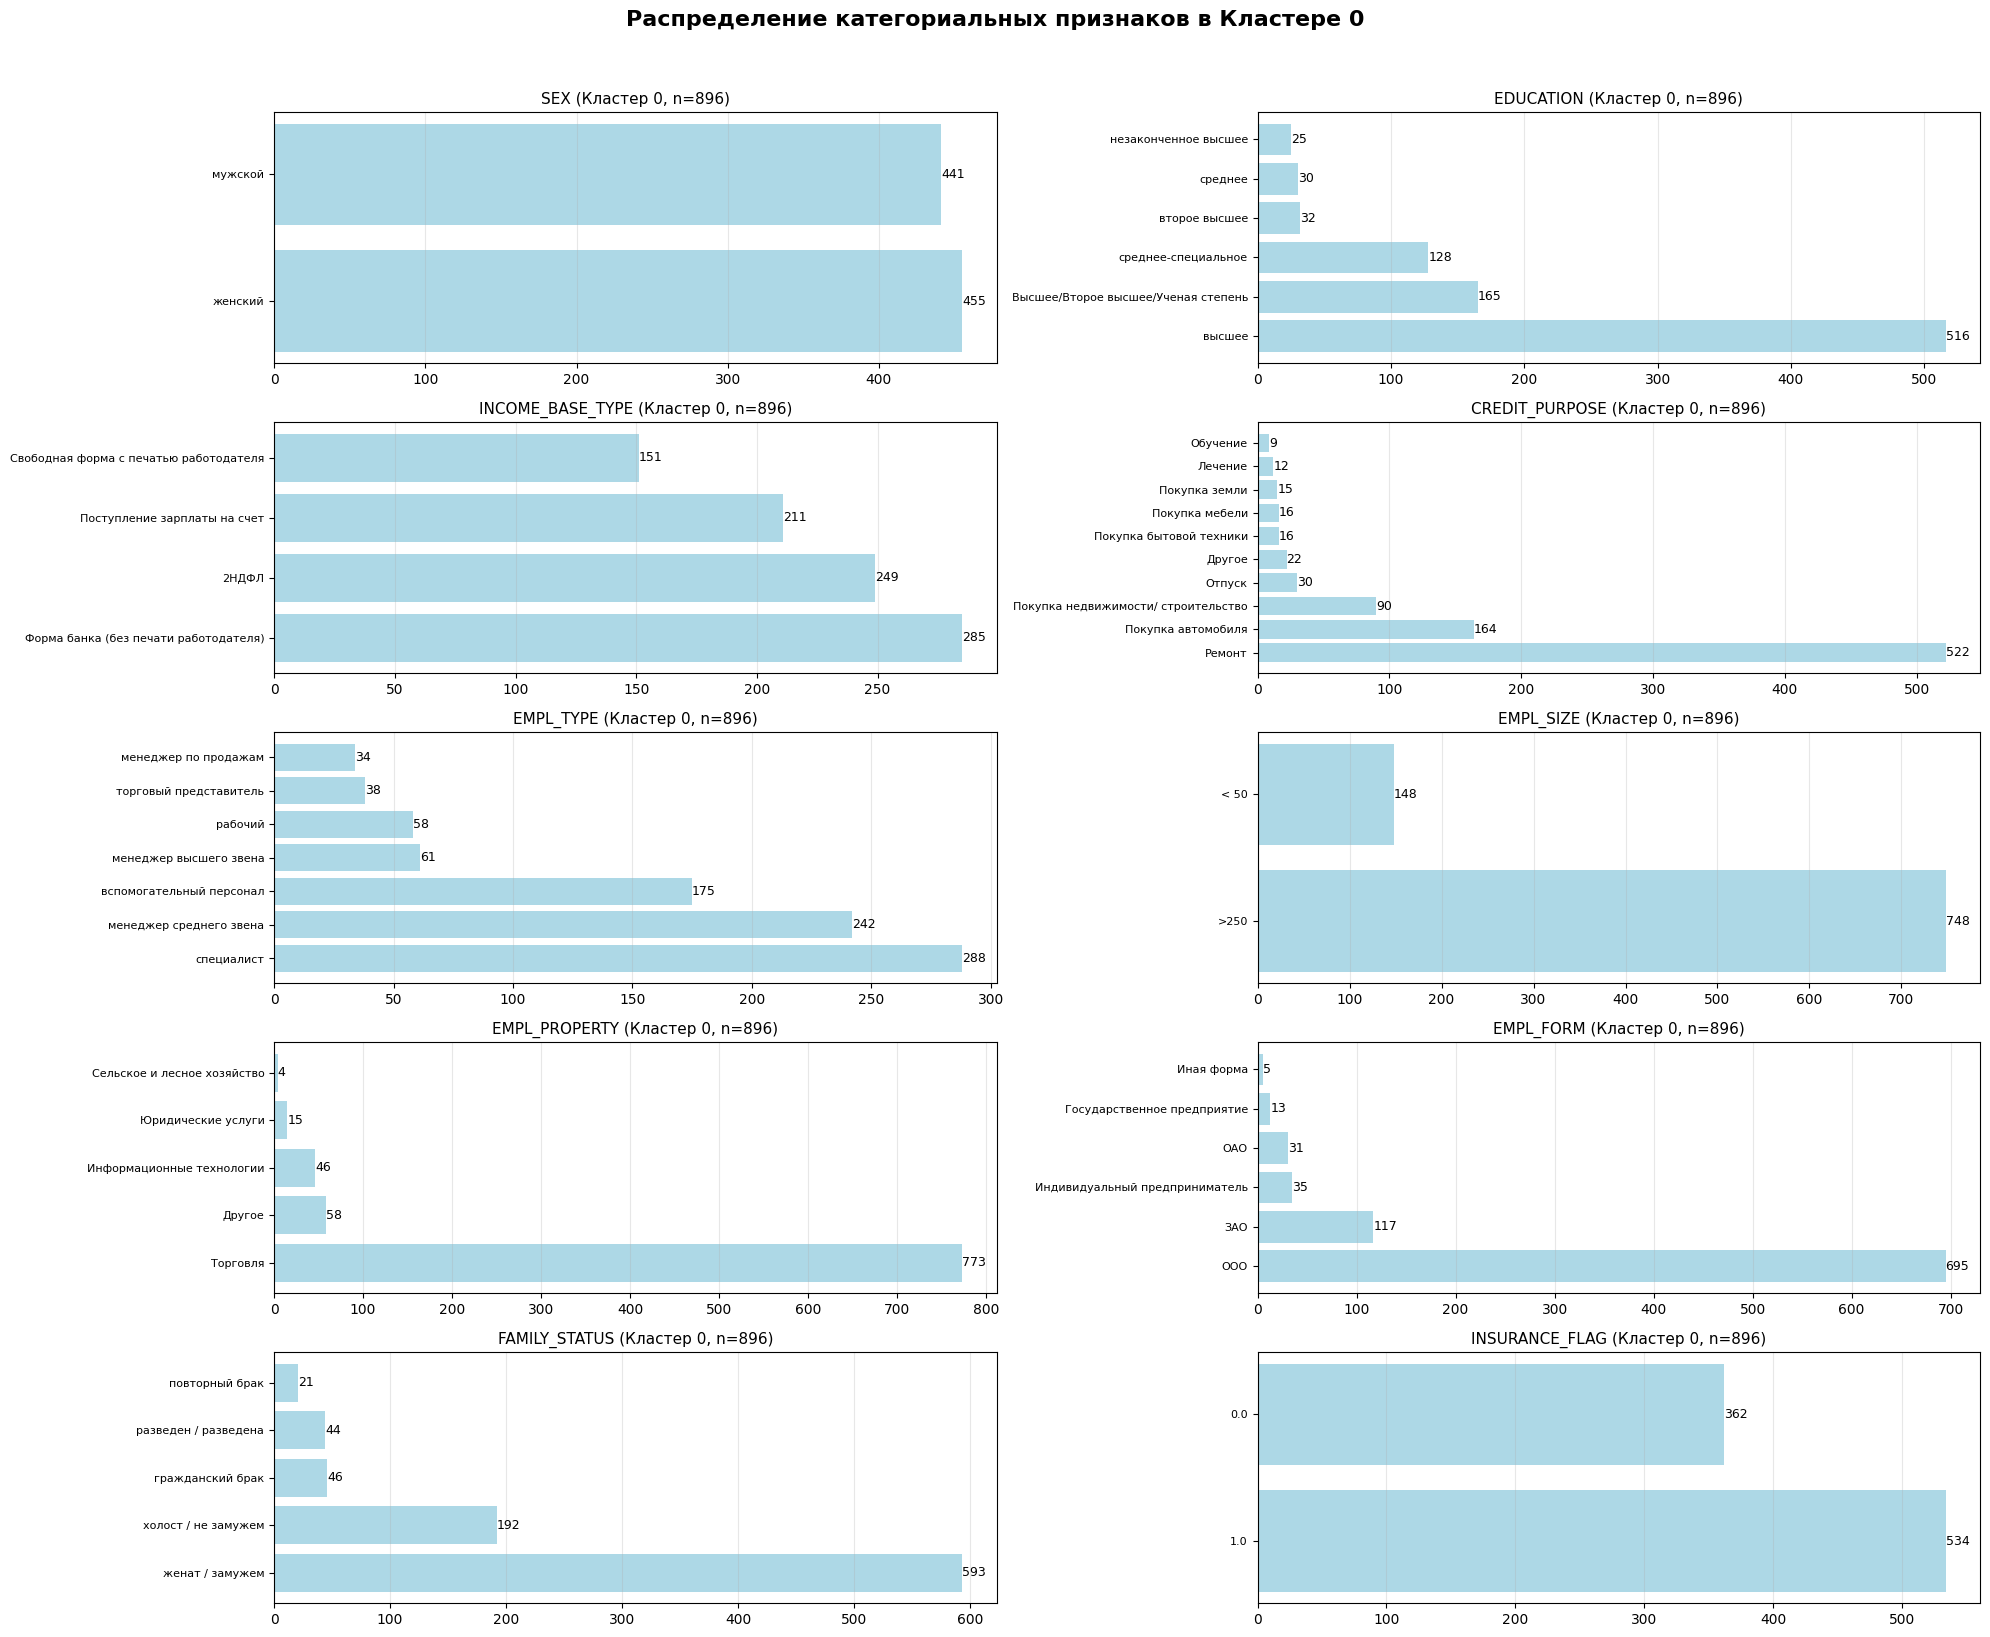

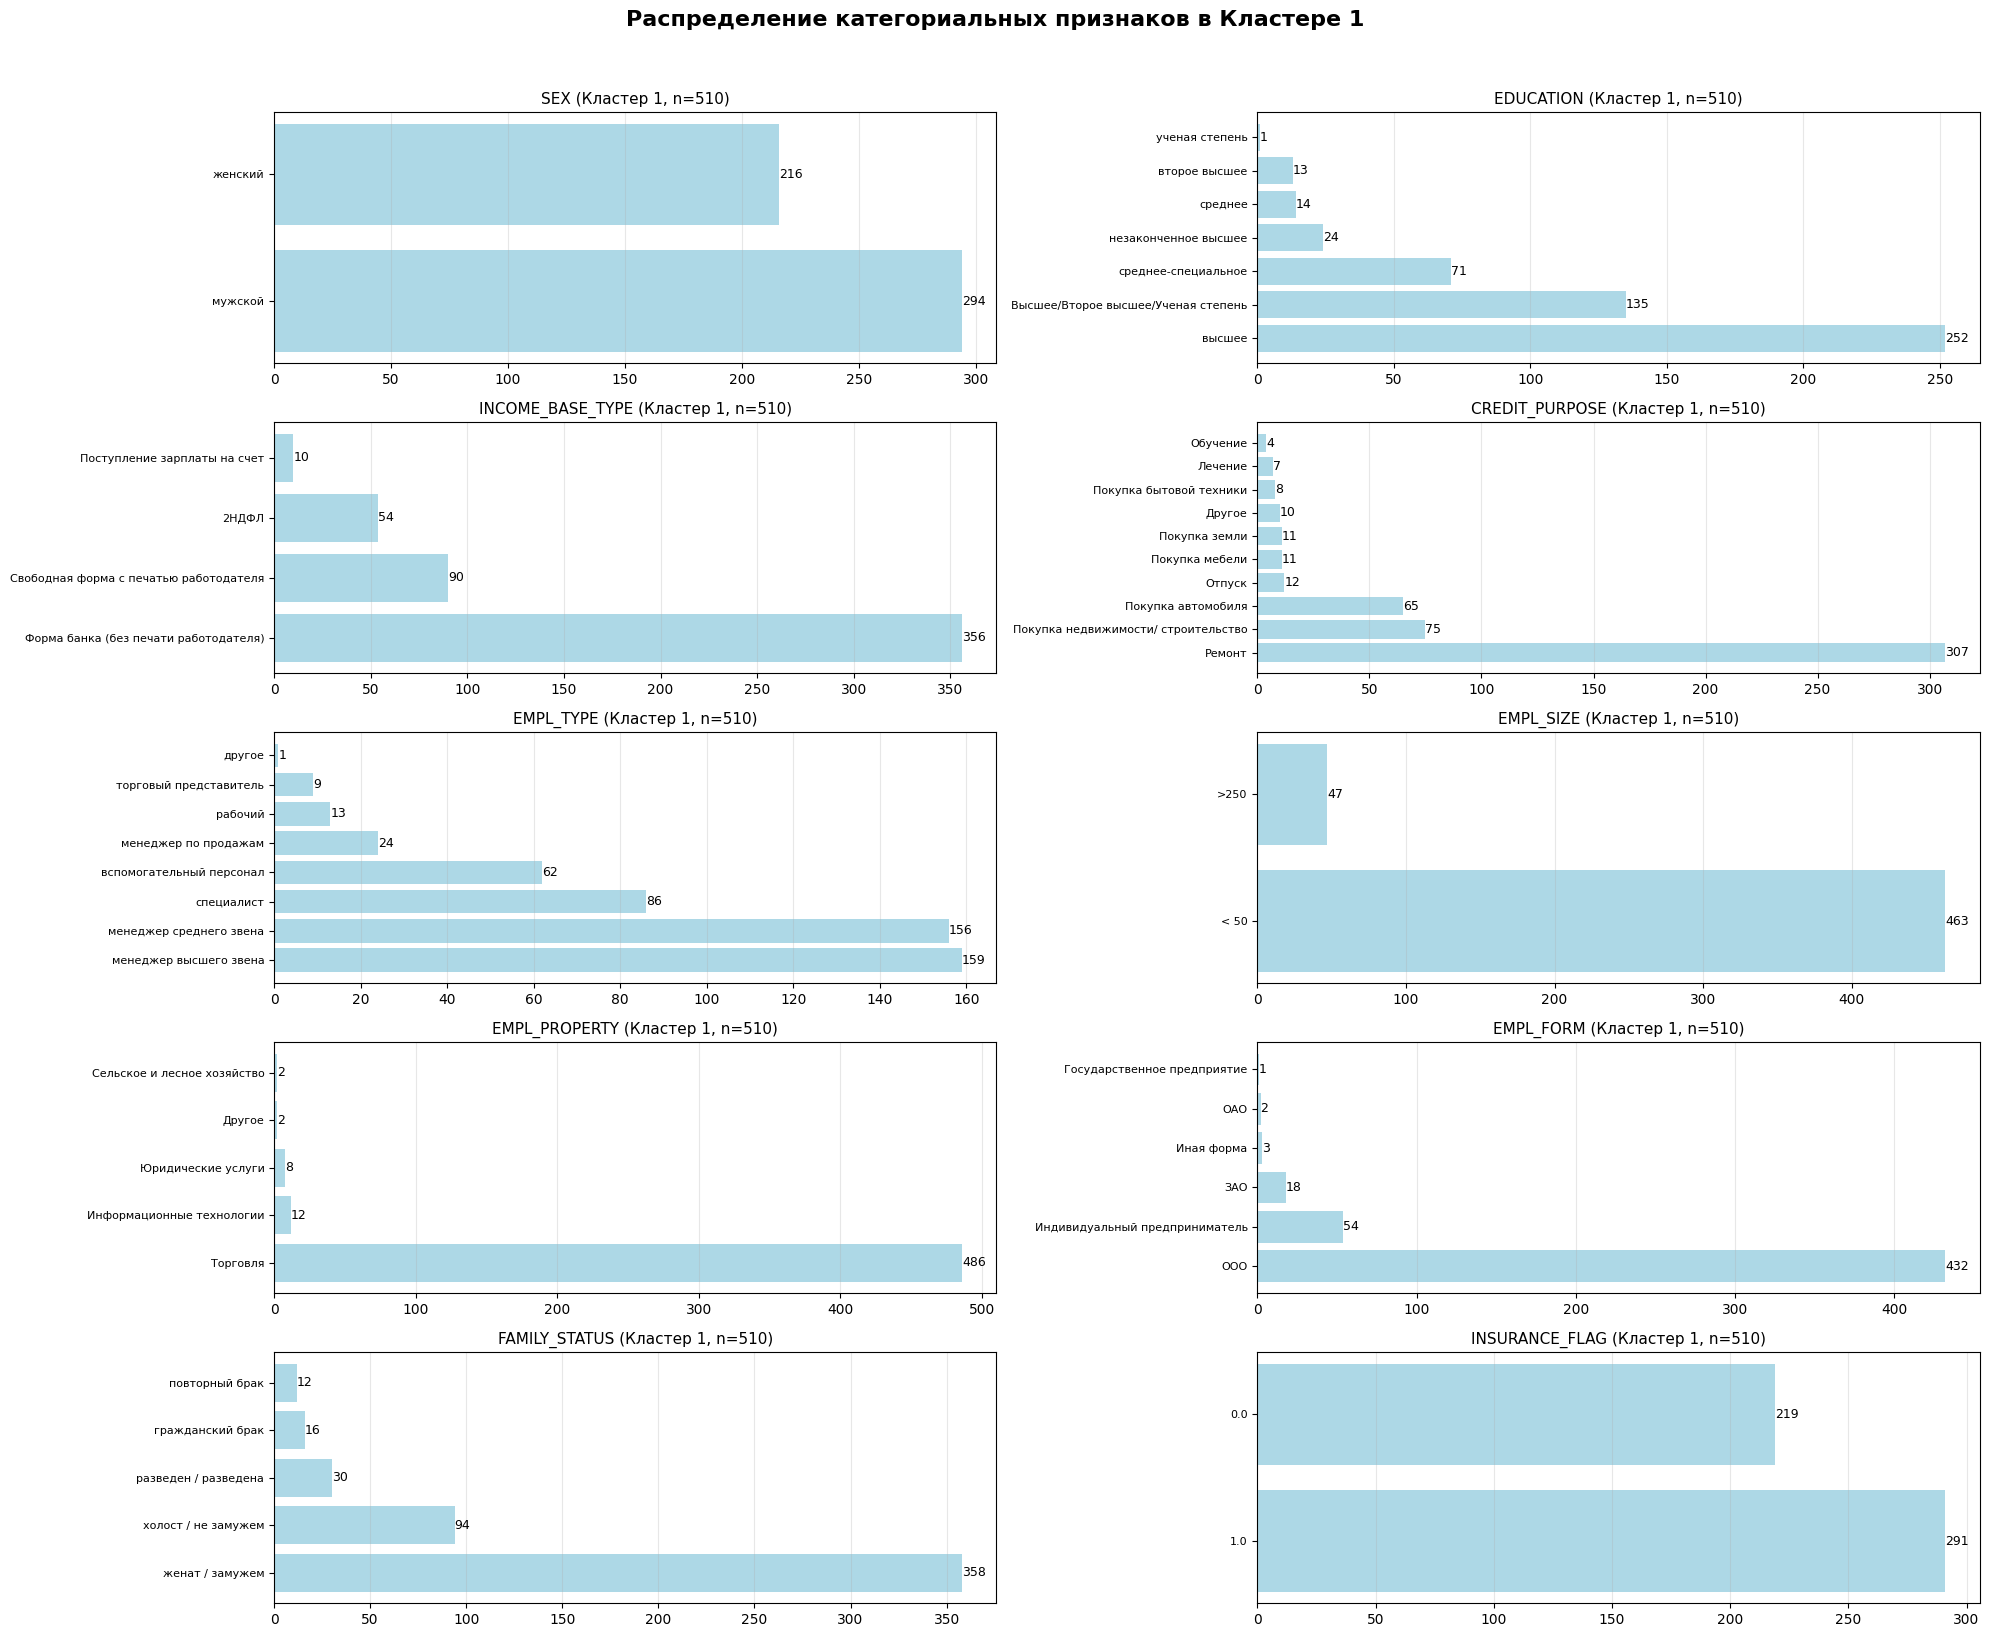

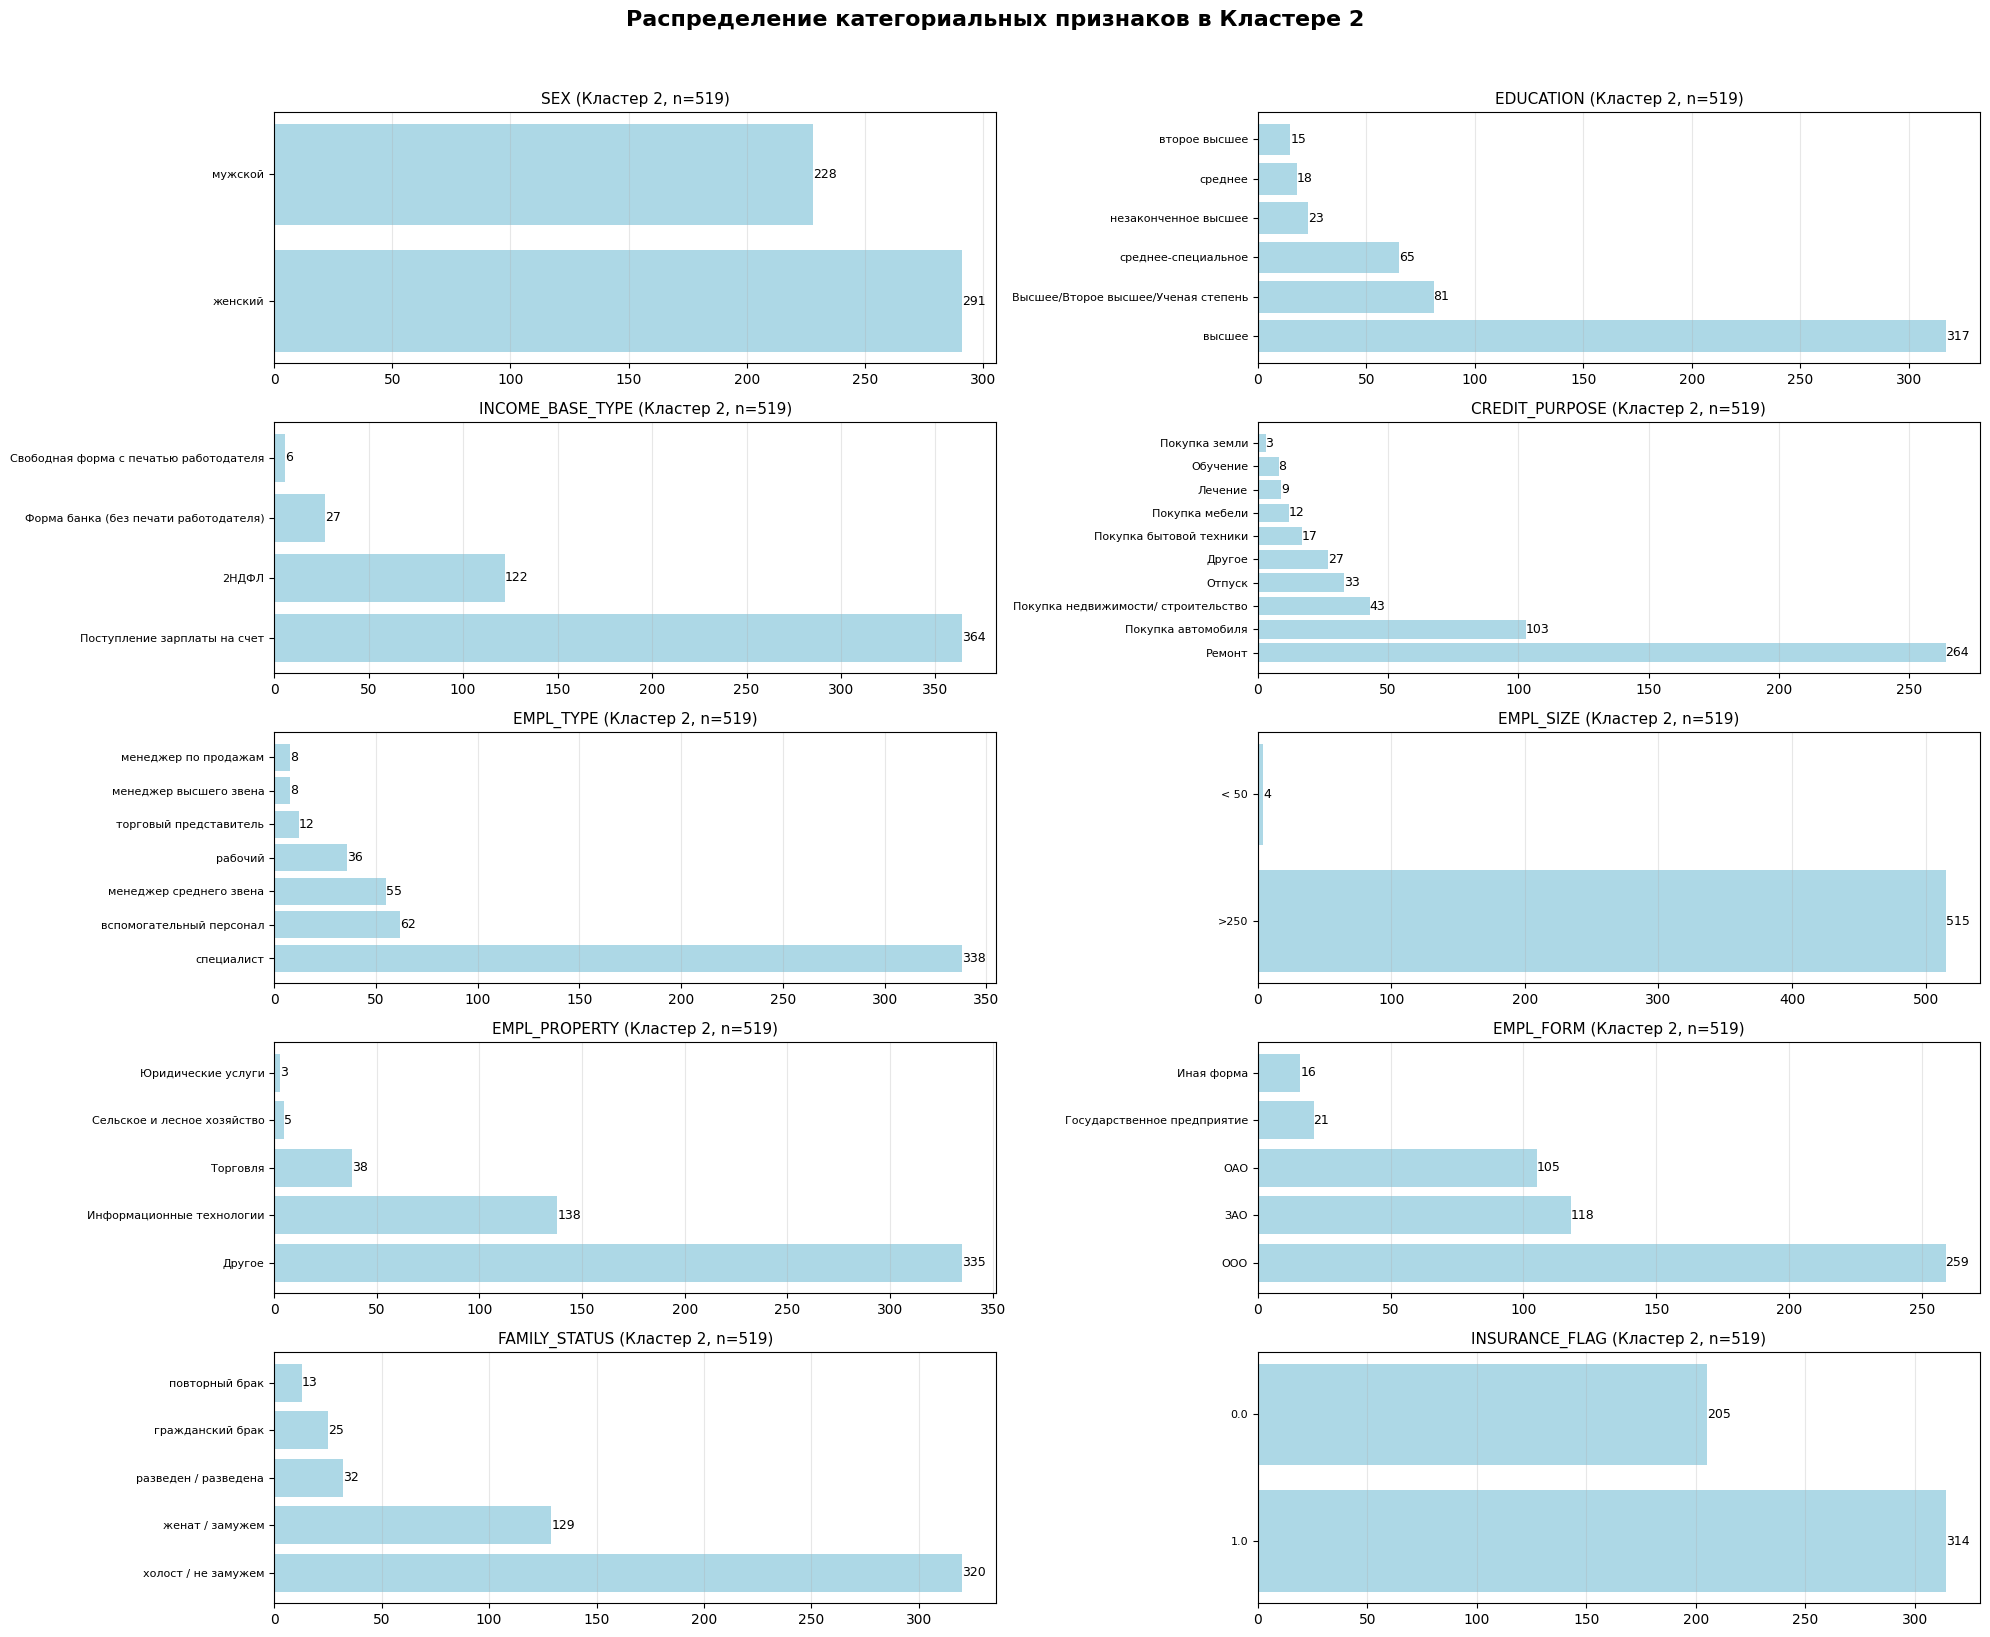

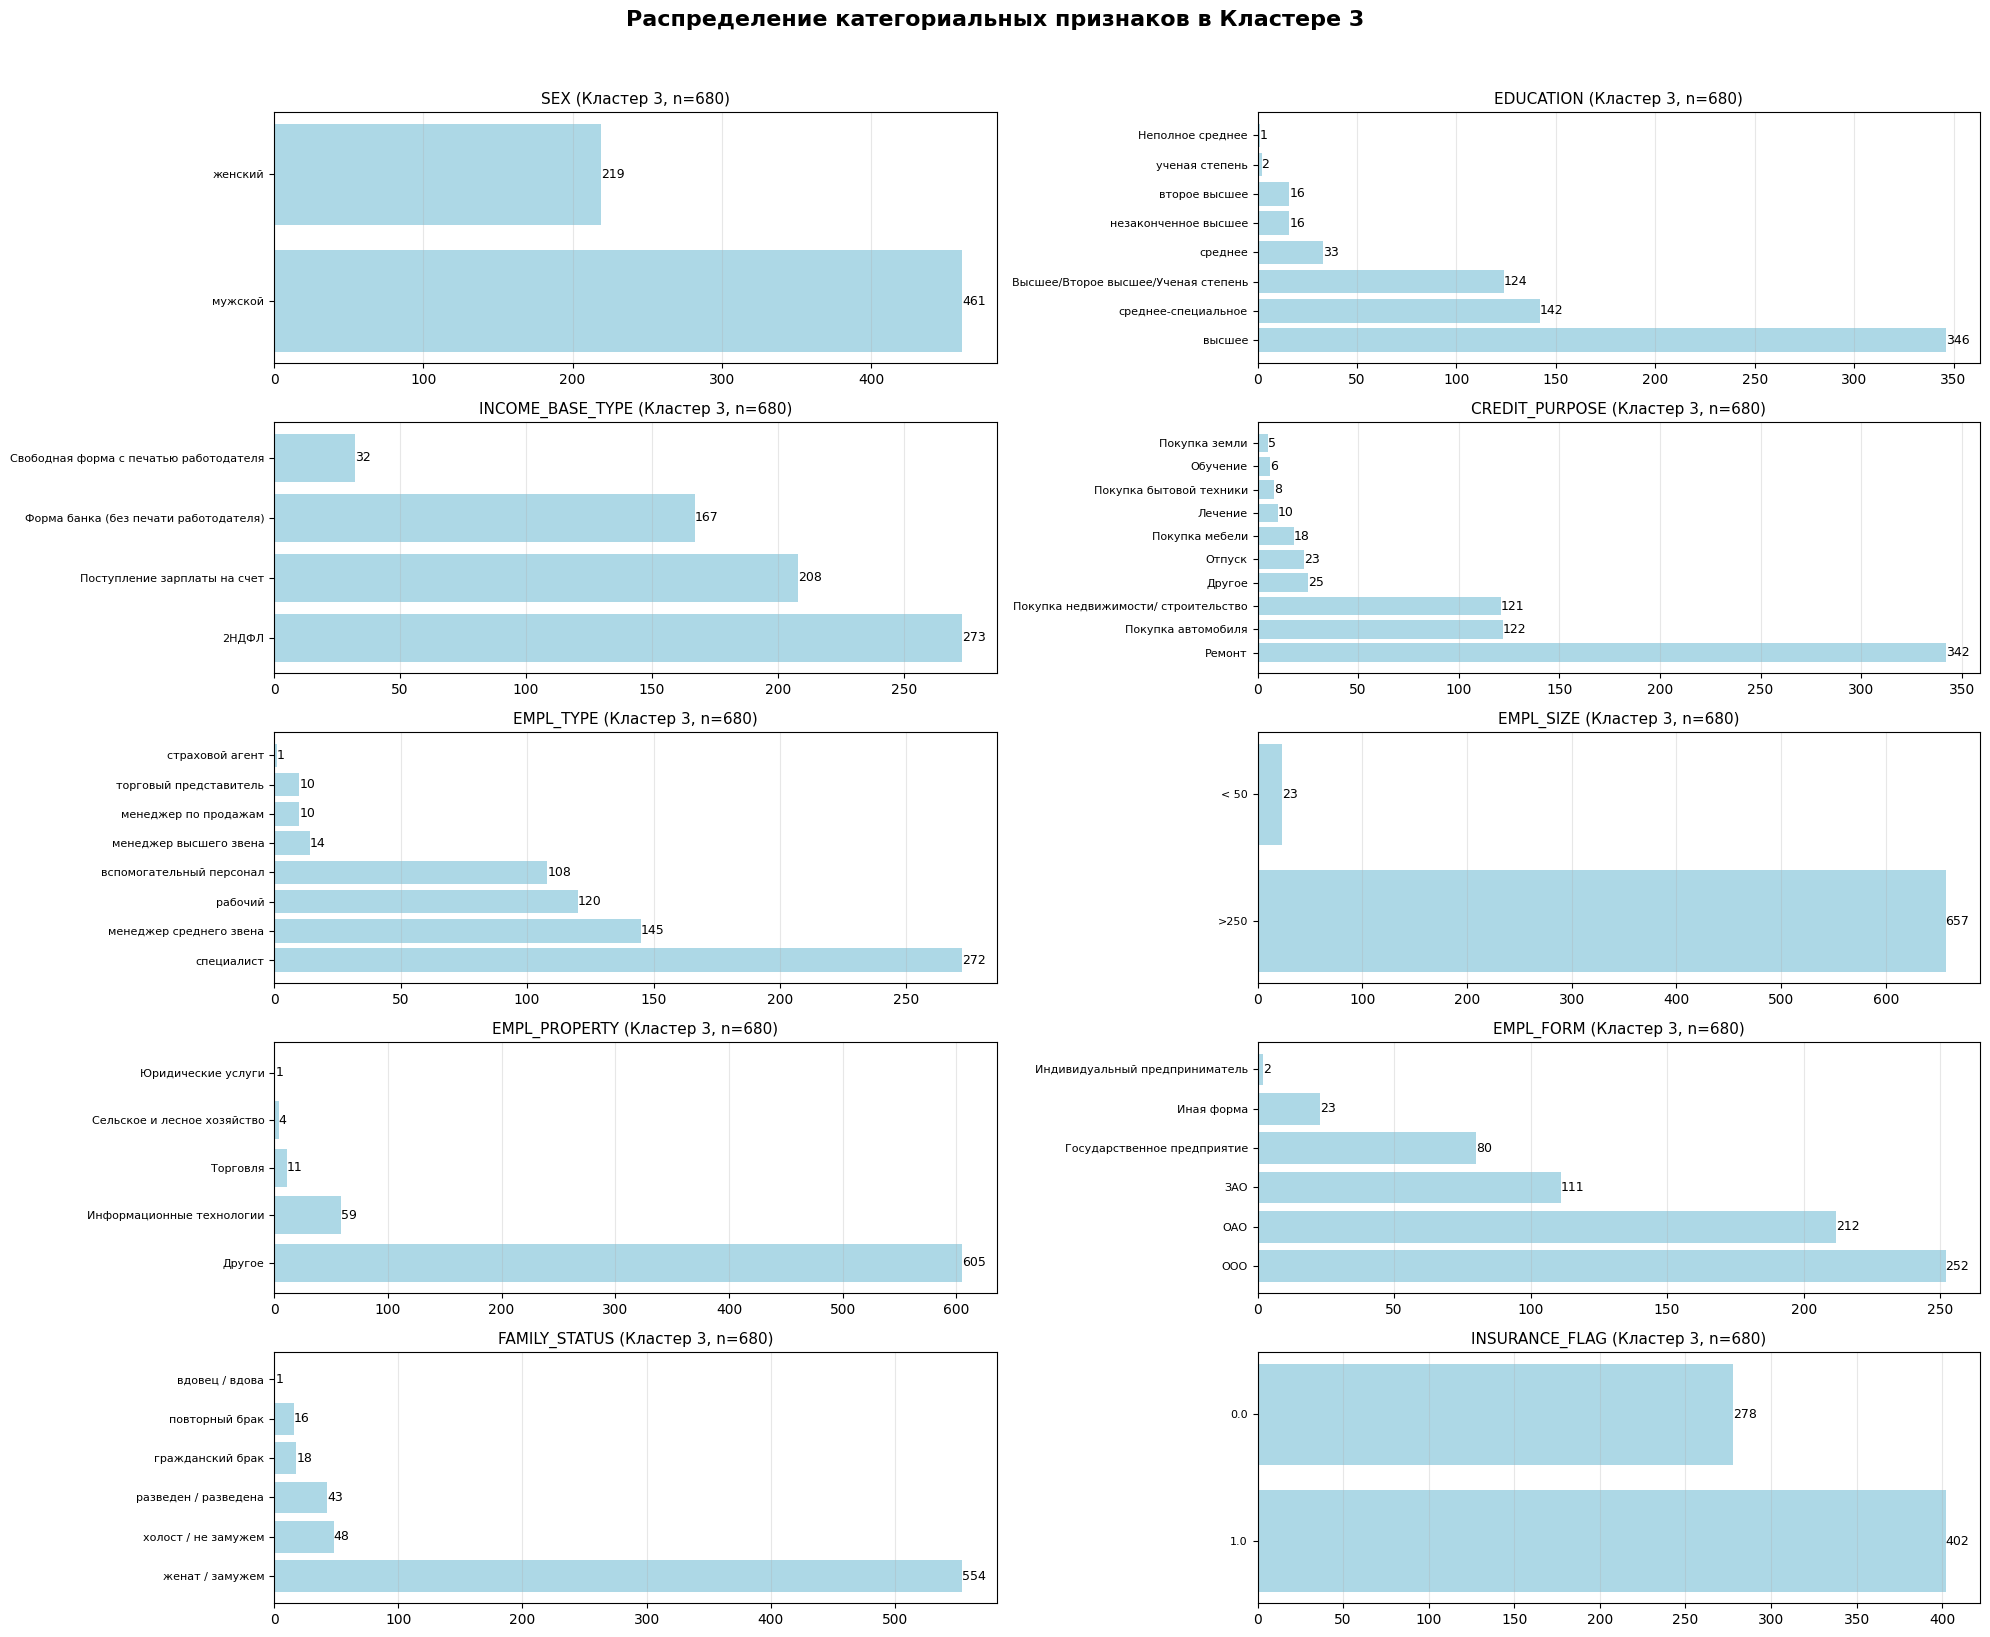

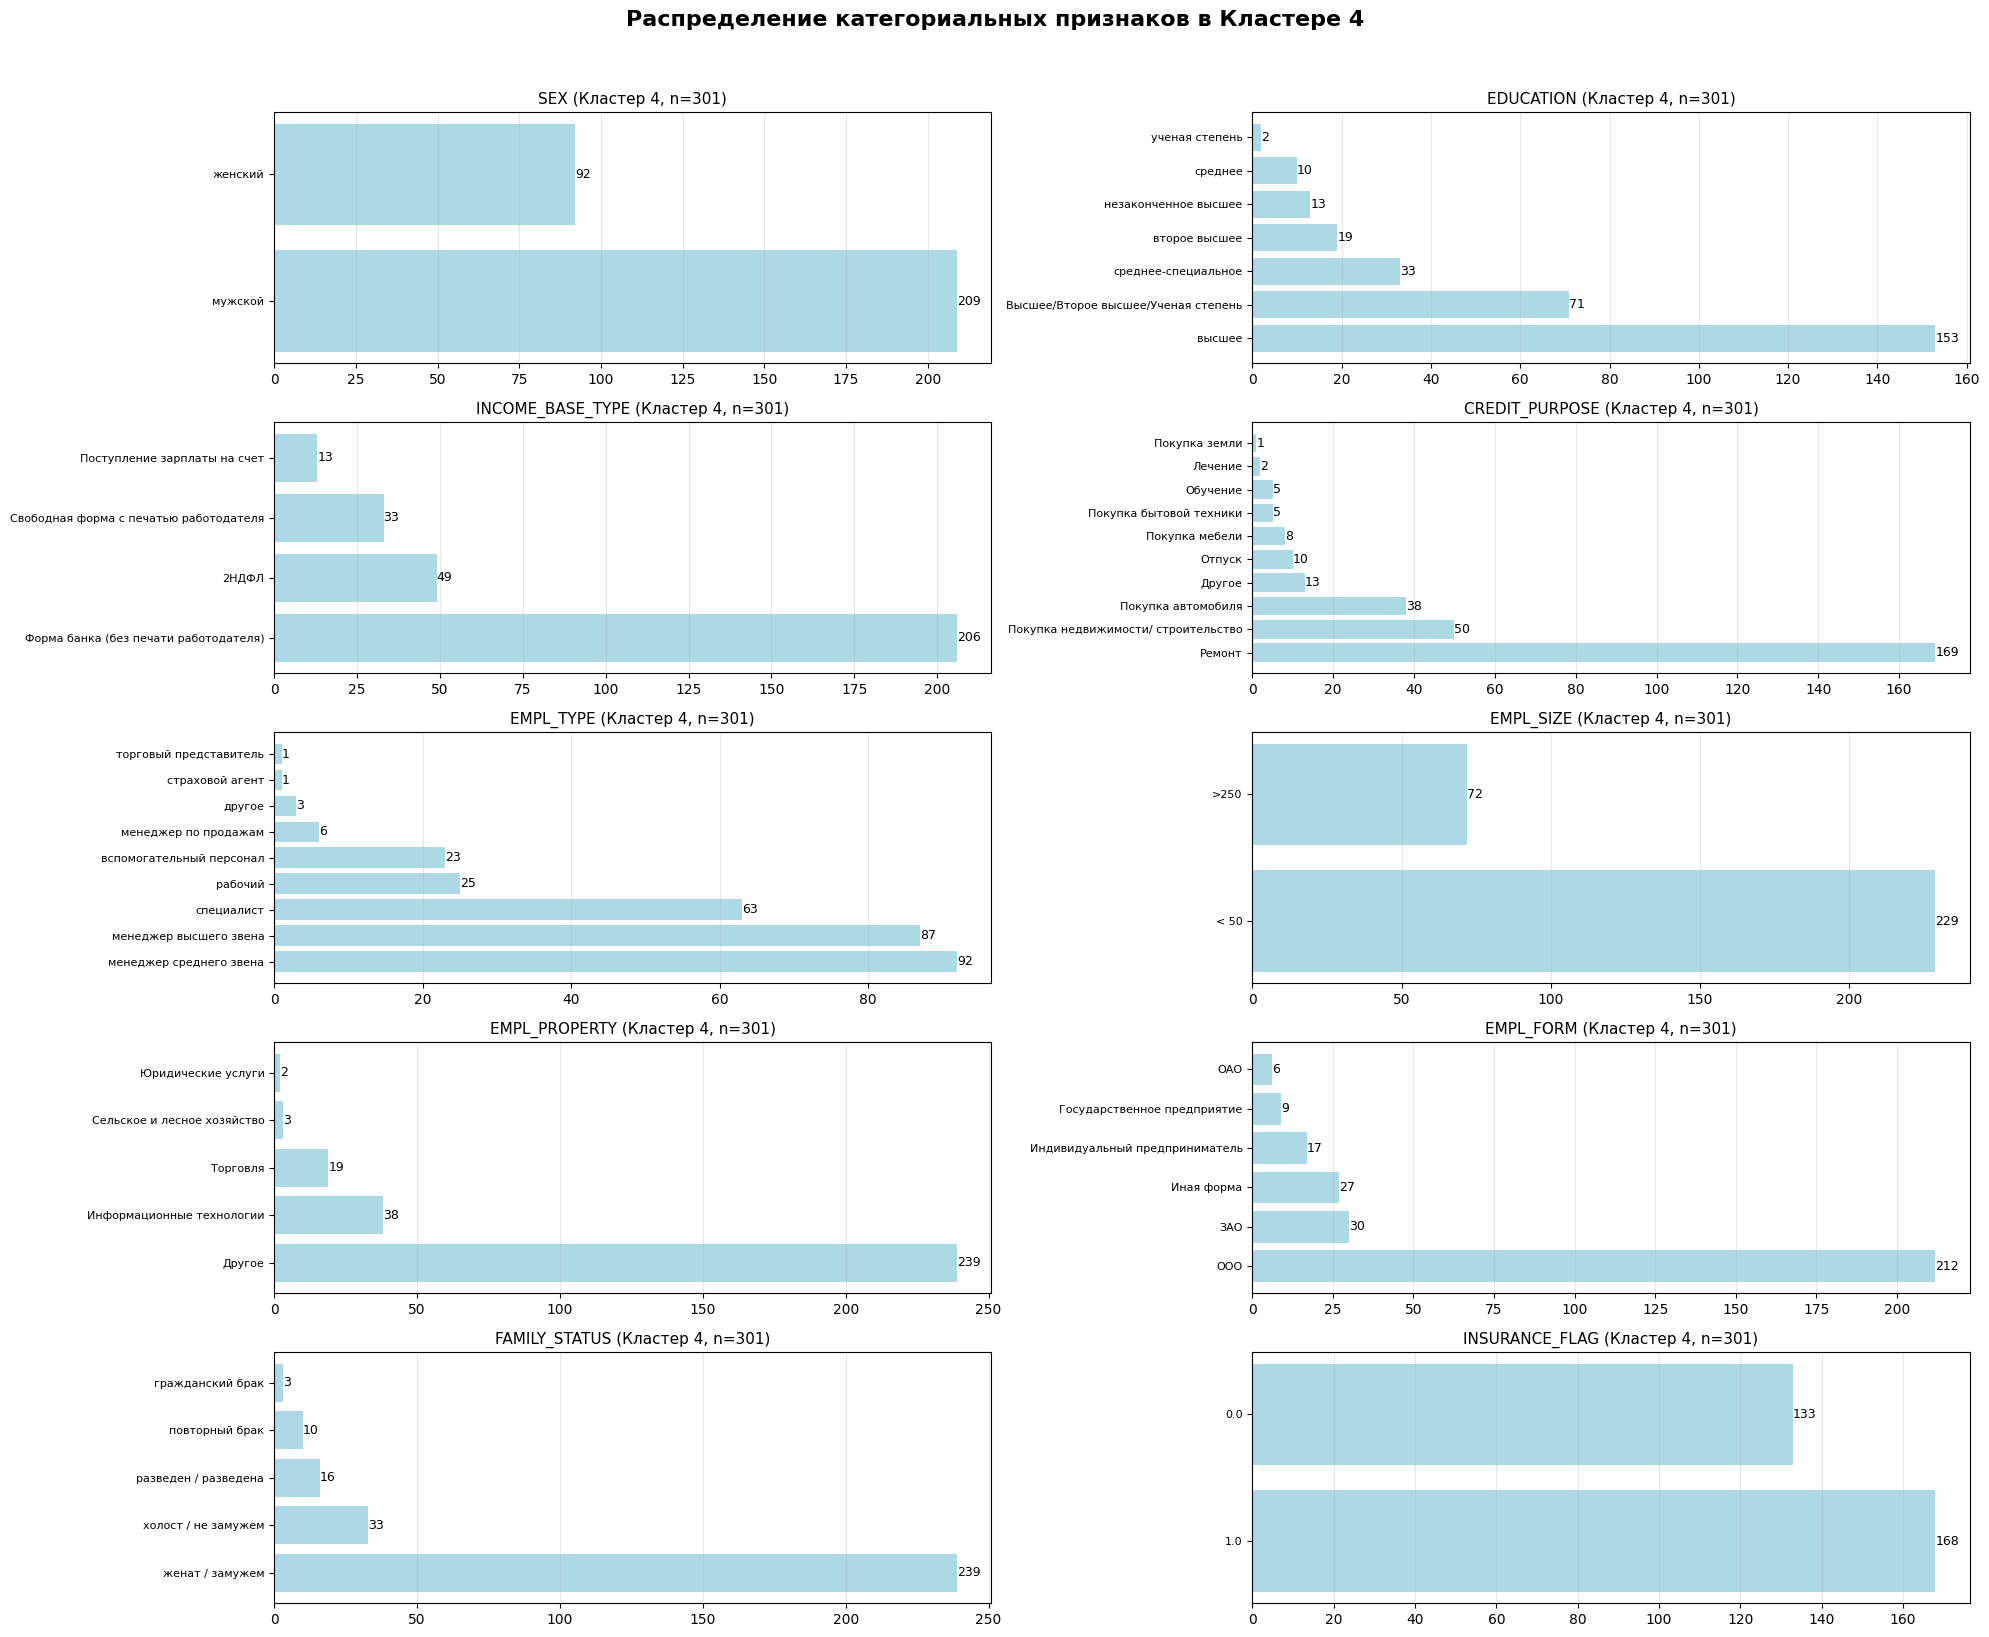

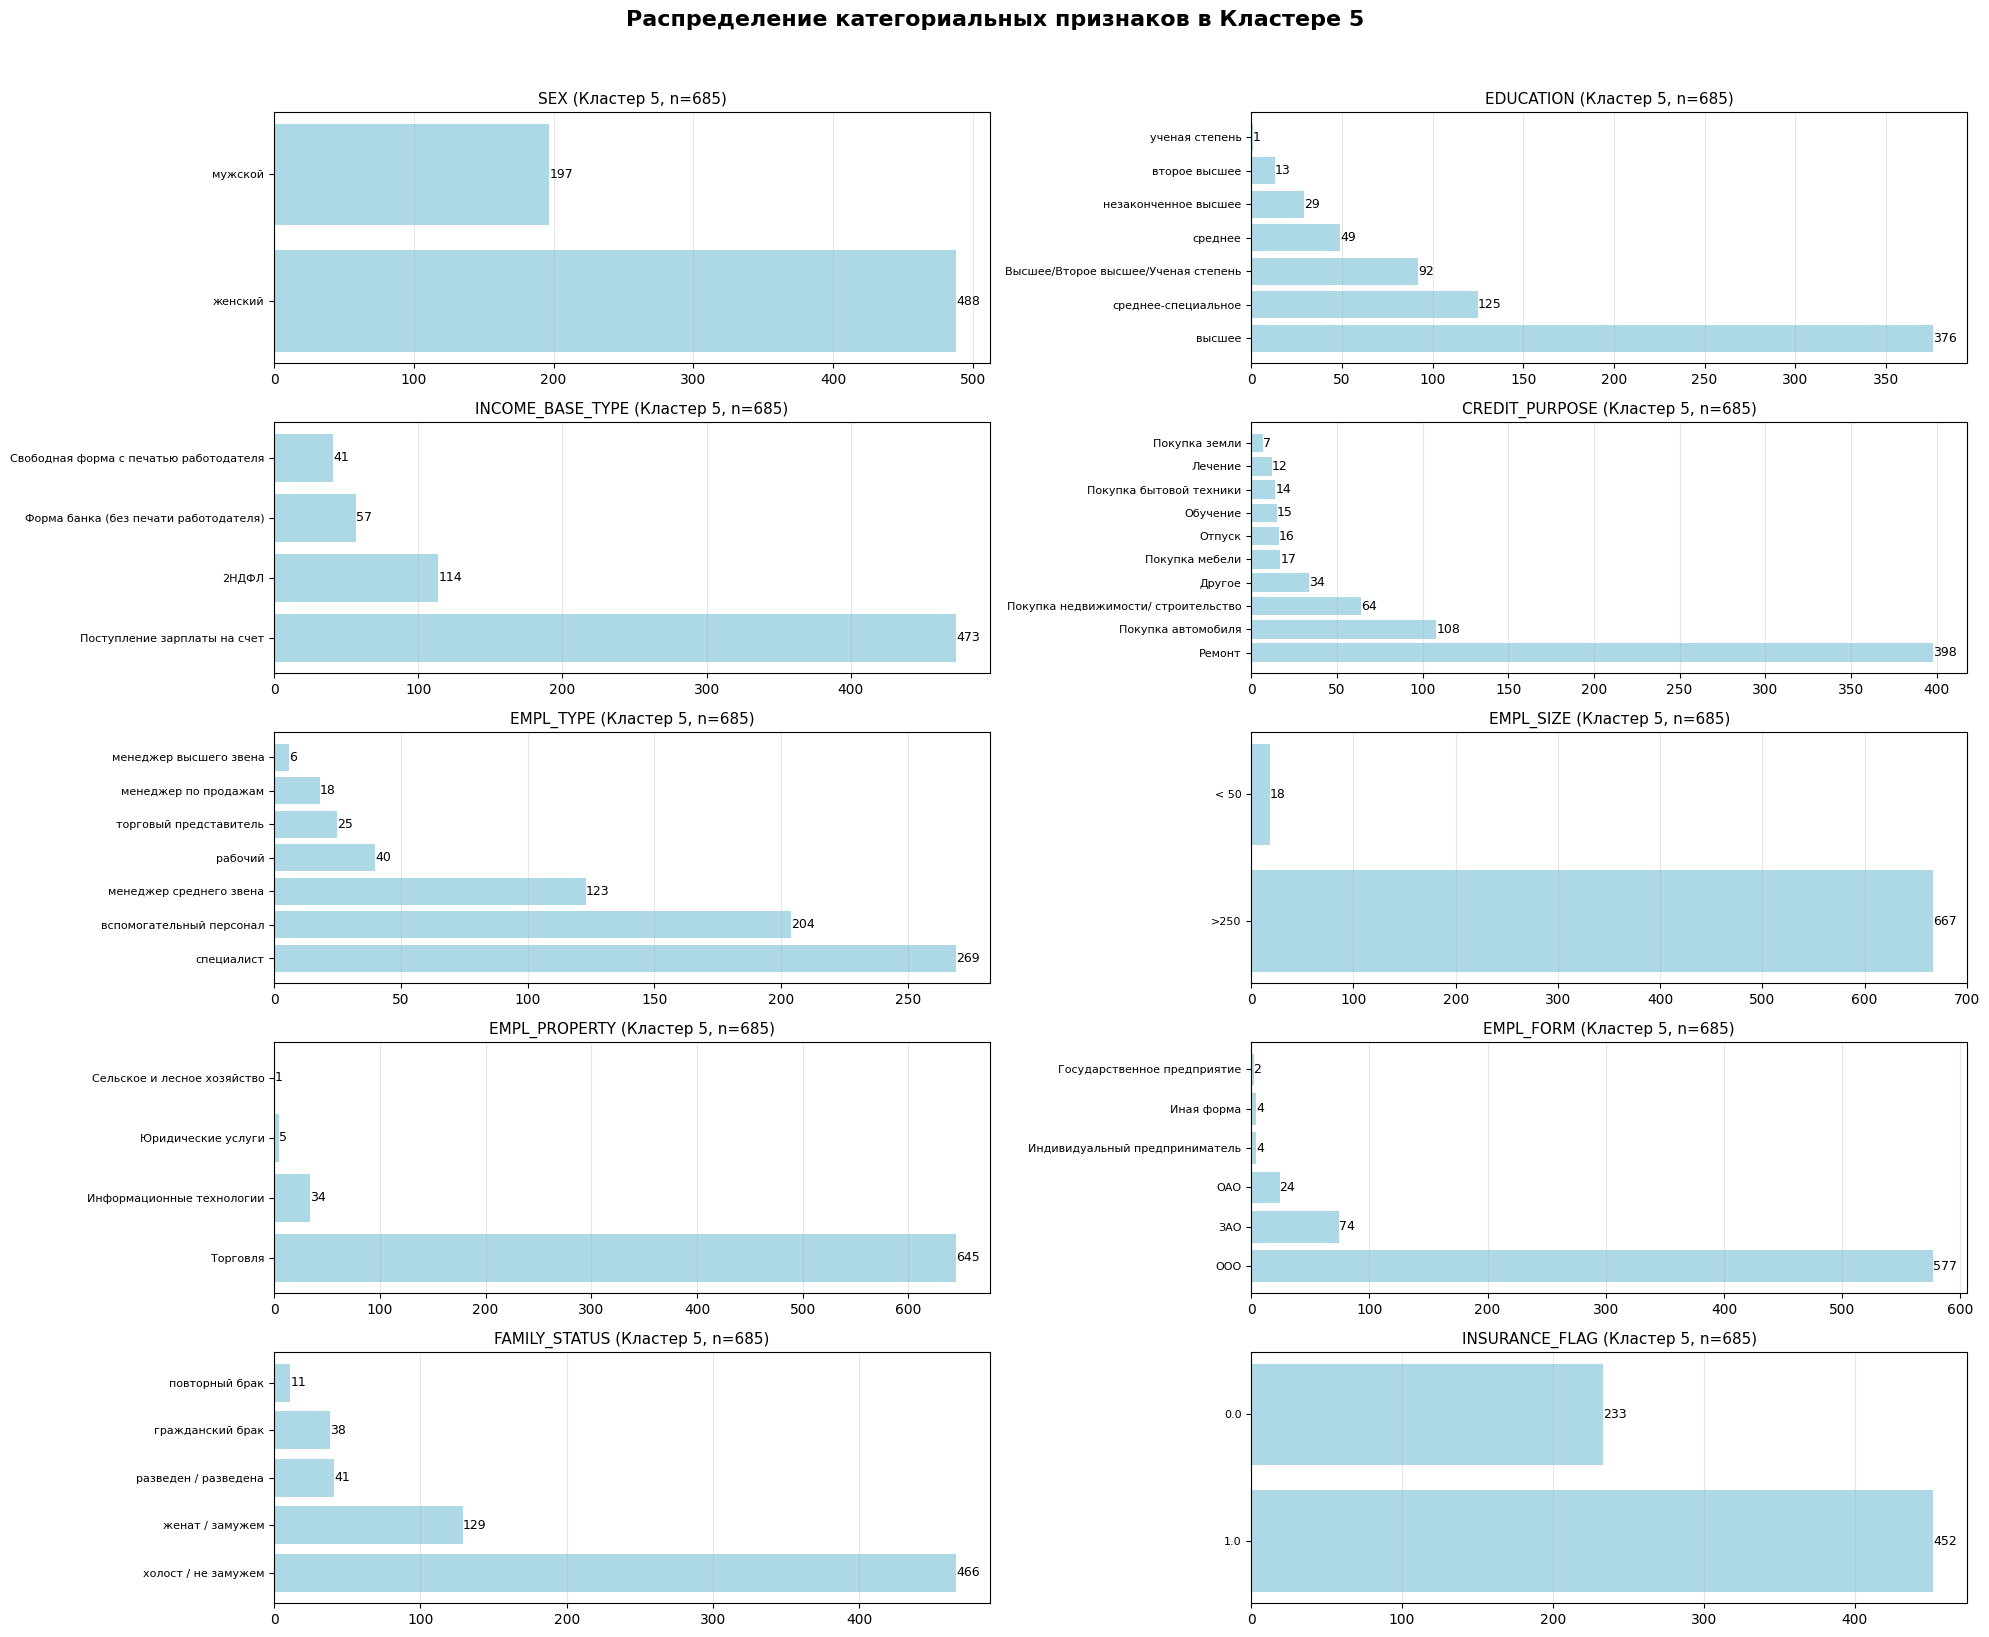

In [ ]:
cols = ['SEX', 'EDUCATION','INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'EMPL_TYPE', 
        'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'INSURANCE_FLAG']

# Определяем все уникальные кластеры
clusters = sorted(df_clean['cluster'].unique())

# Для каждого кластера строим отдельный график
for cluster_num in clusters:
    # Фильтруем данные по кластеру
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]

    fig, axes = plt.subplots(5, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    for idx, col in enumerate(cols):
        ax = axes[idx]
        
        if col in df_clean.columns:
            
            counts = cluster_data[col].value_counts()
            
            ax.barh(range(len(counts)), counts.values, color='lightblue')
            
            for i, count in enumerate(counts.values):
                ax.text(count, i, str(count), ha='left', va='center', fontsize=9)
            
            ax.set_title(f'{col} (Кластер {cluster_num}, n={len(cluster_data)})', fontsize=11)
            ax.set_yticks(range(len(counts)))
            ax.set_yticklabels(counts.index, fontsize=8)
            ax.grid(True, alpha=0.3, axis='x')
    
    plt.suptitle(f'Распределение категориальных признаков в Кластере {cluster_num}', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

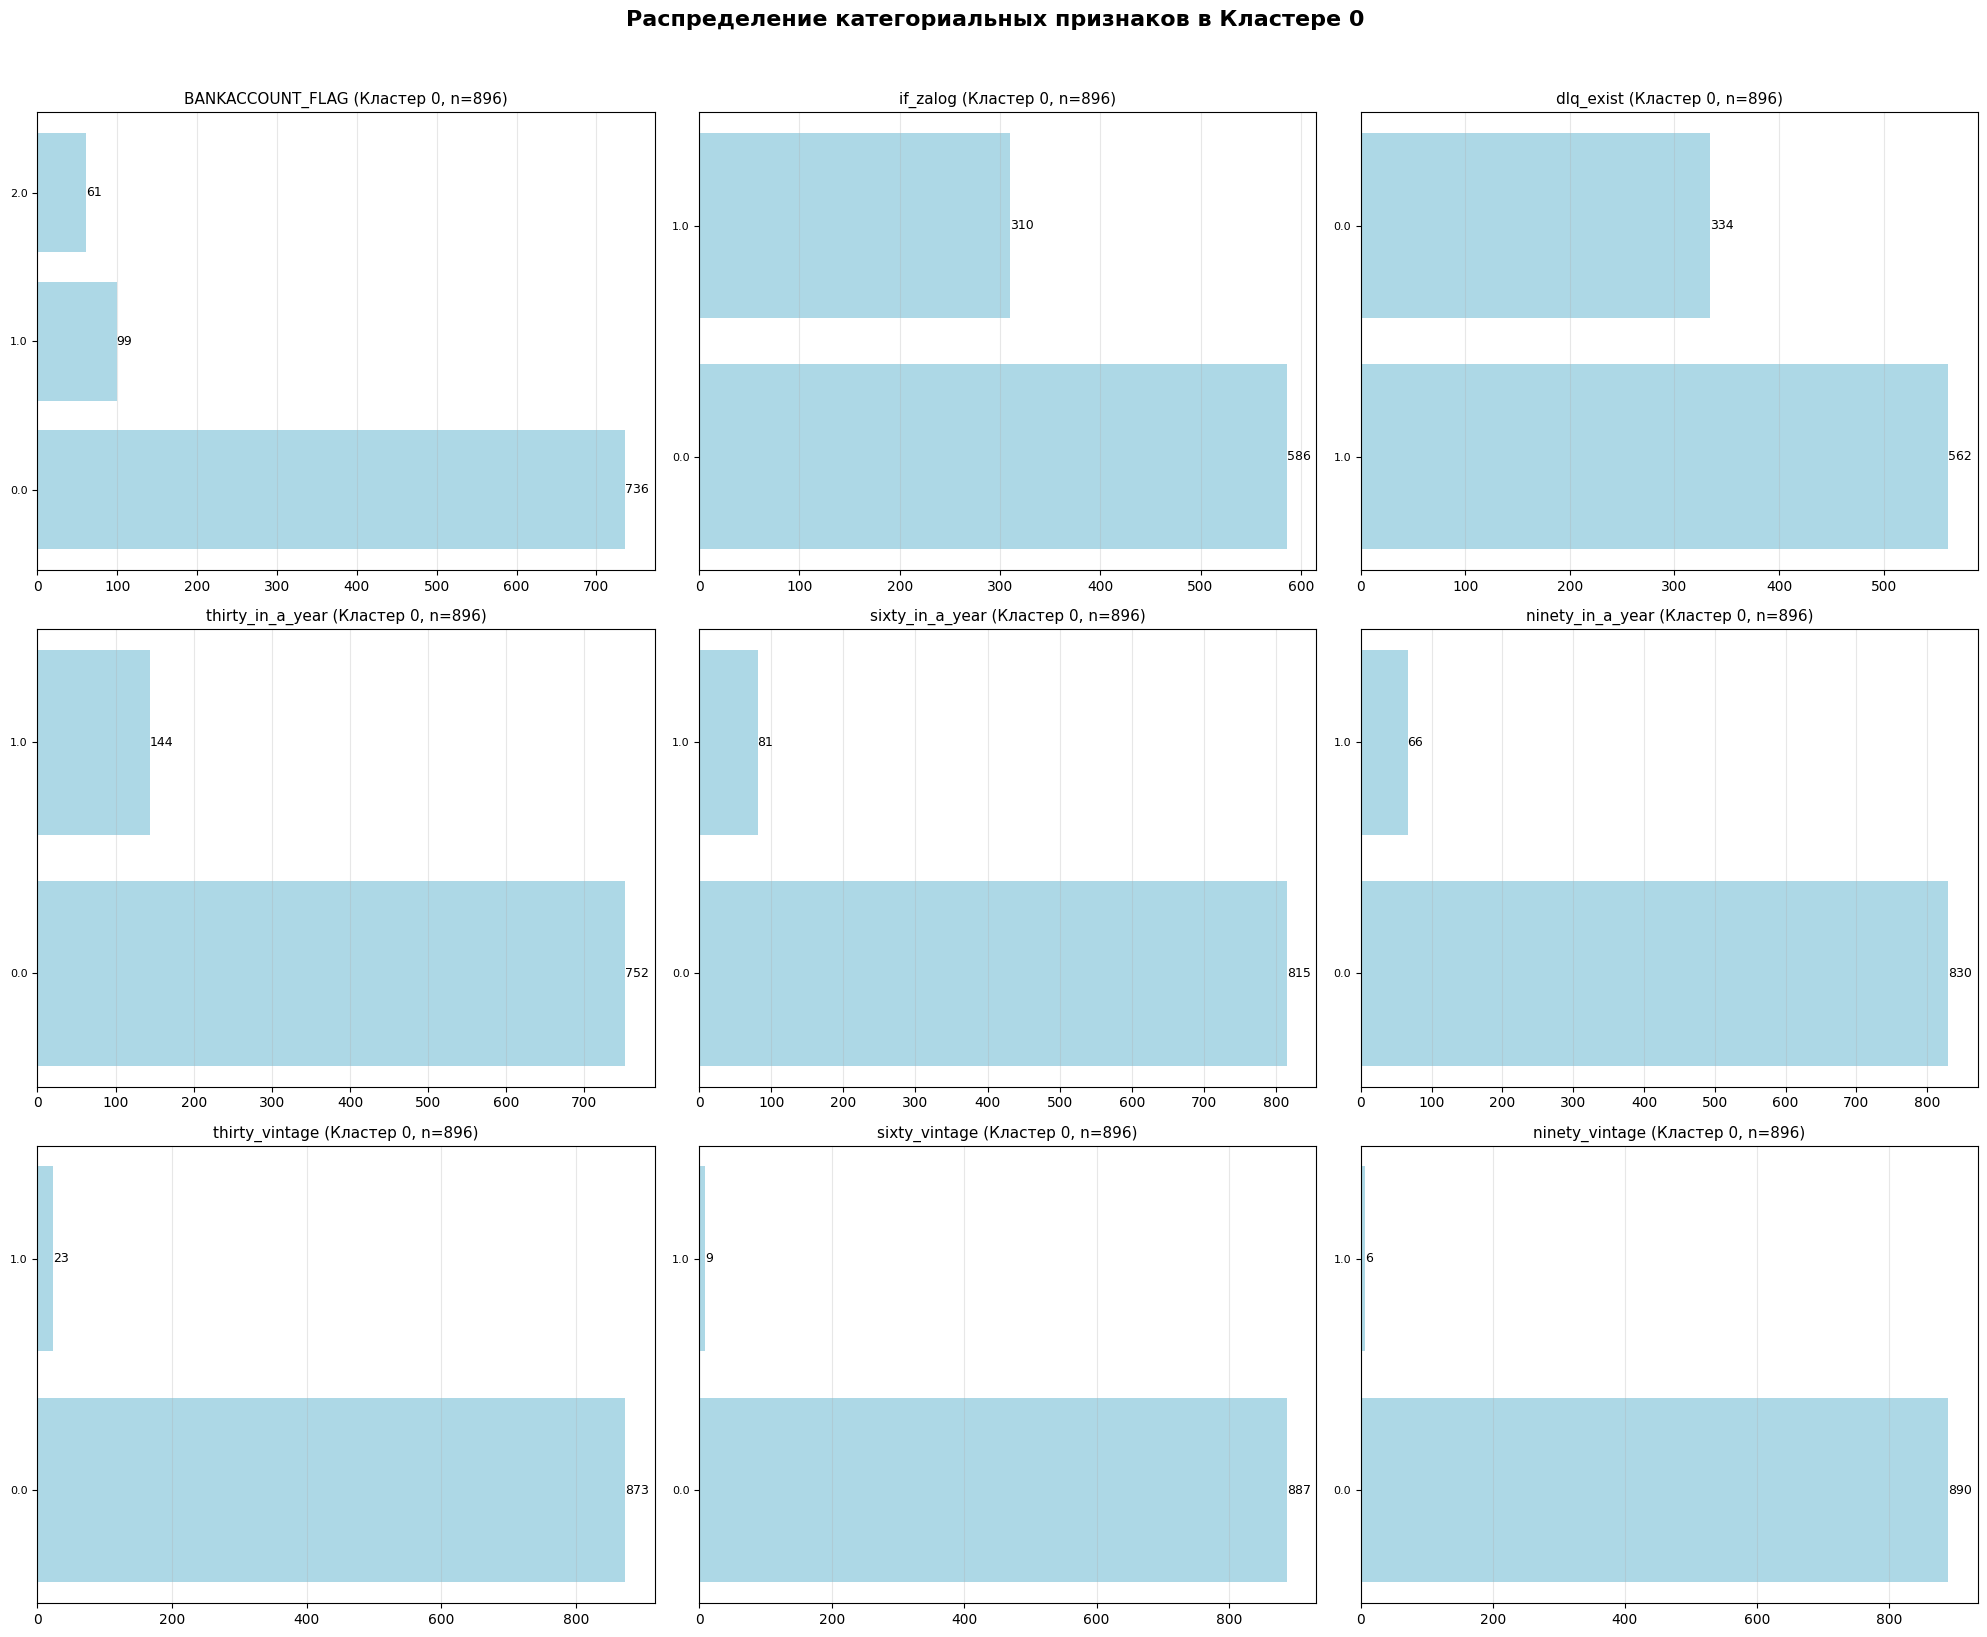

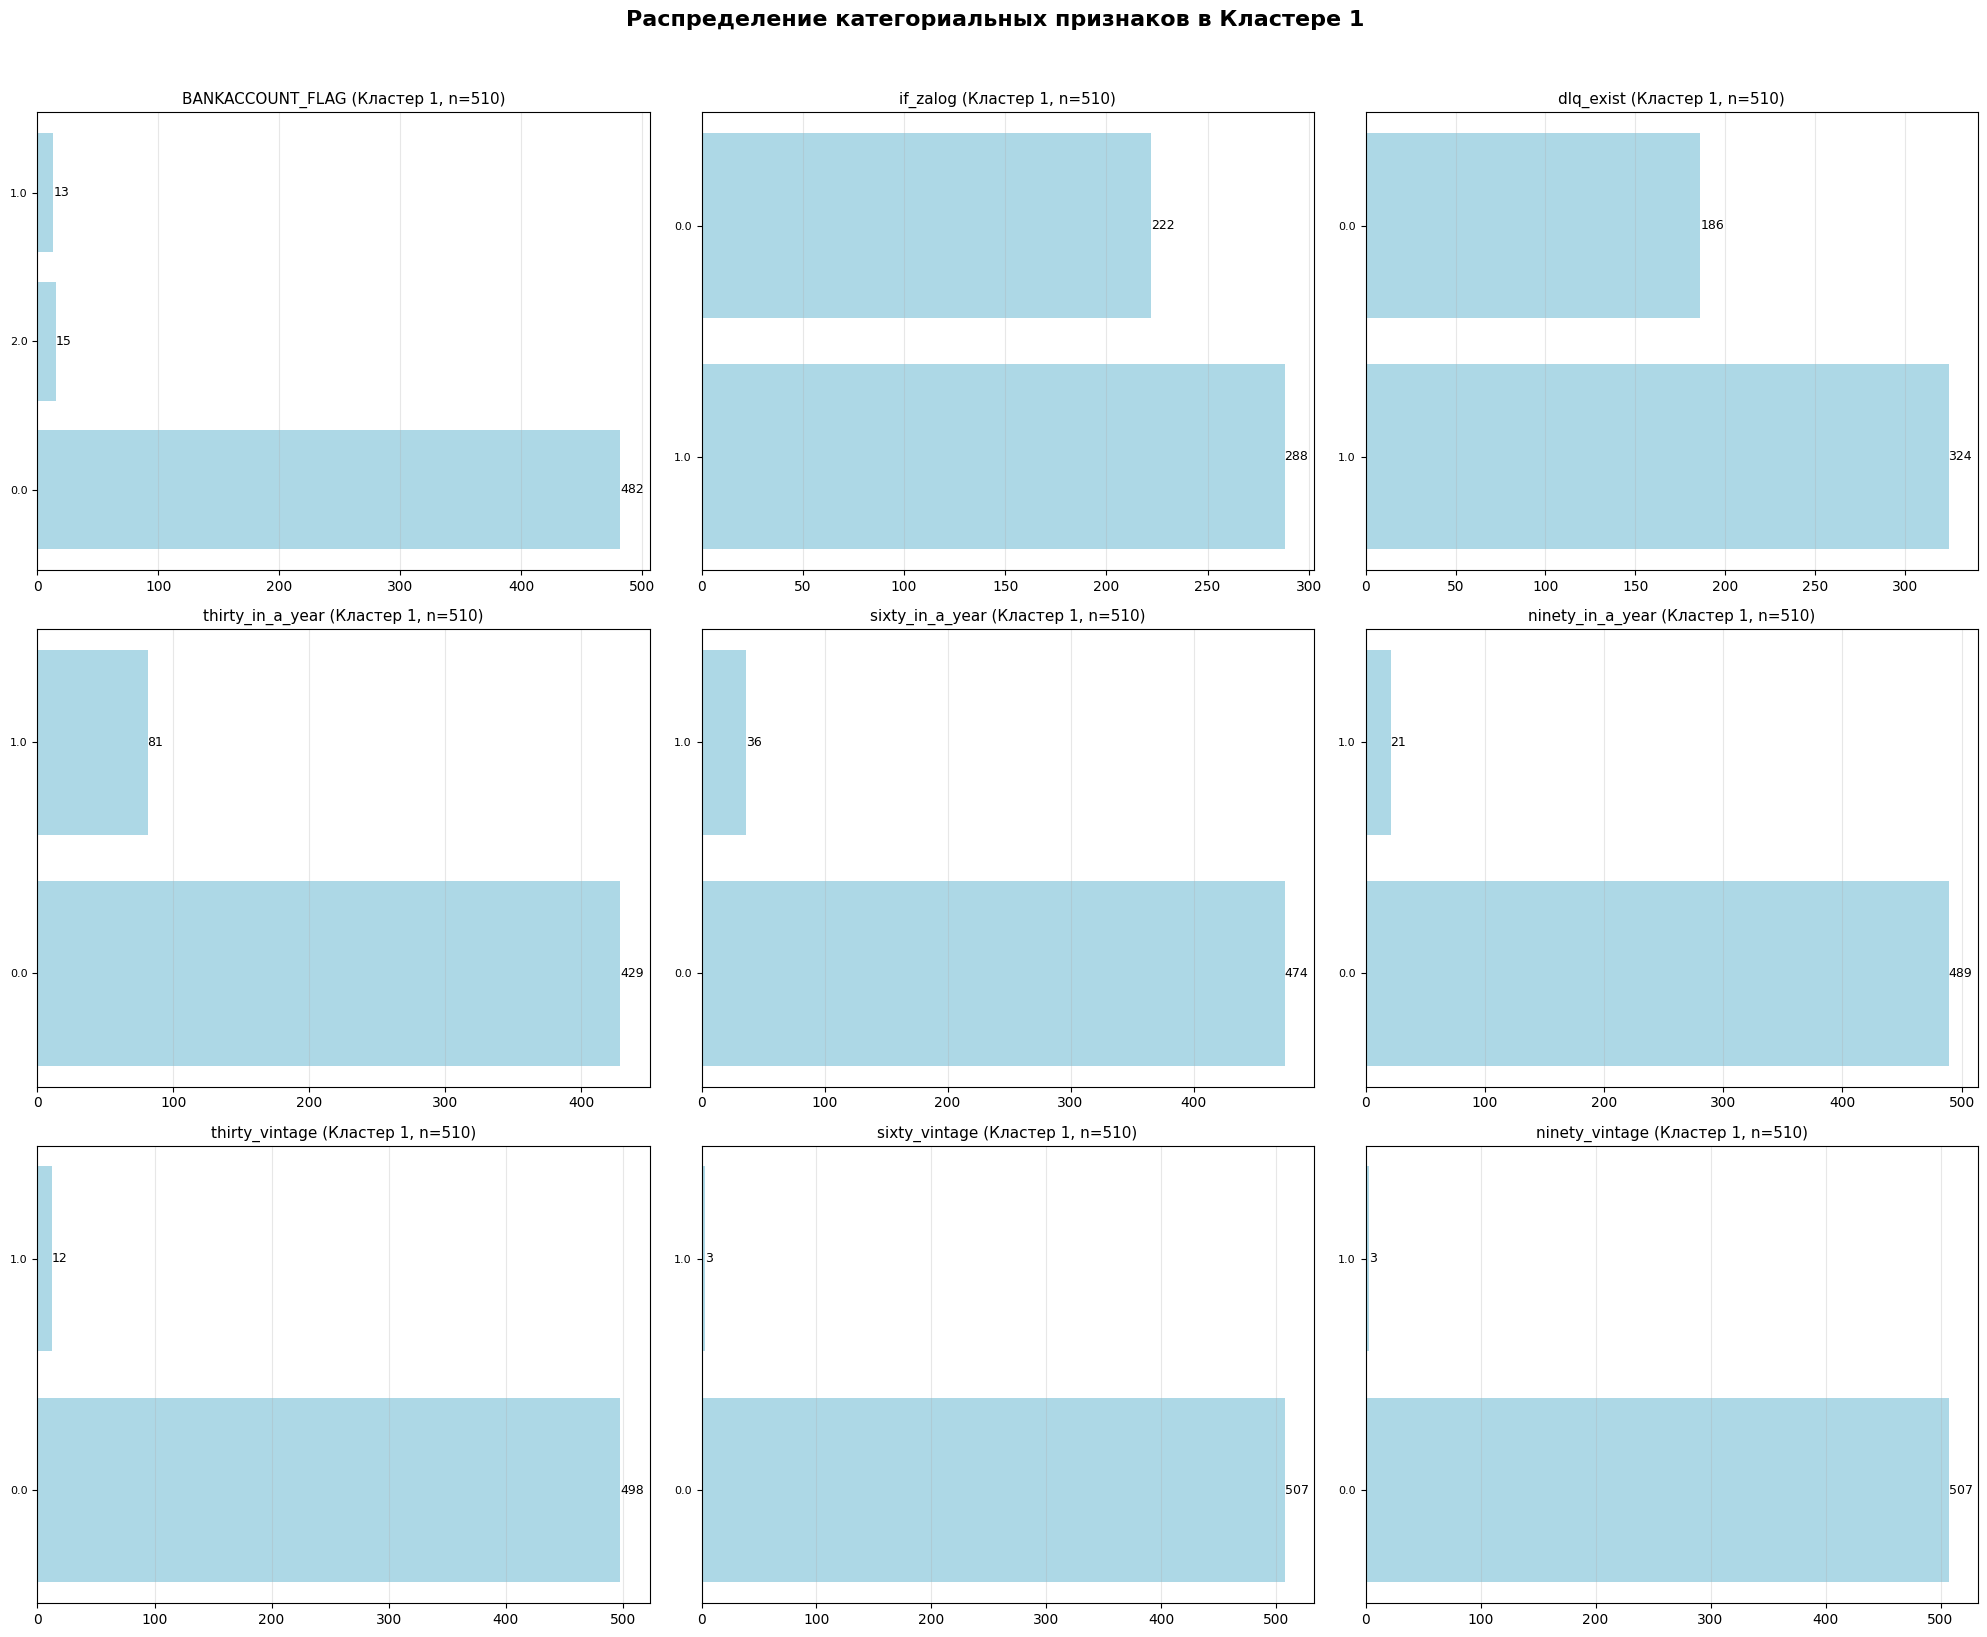

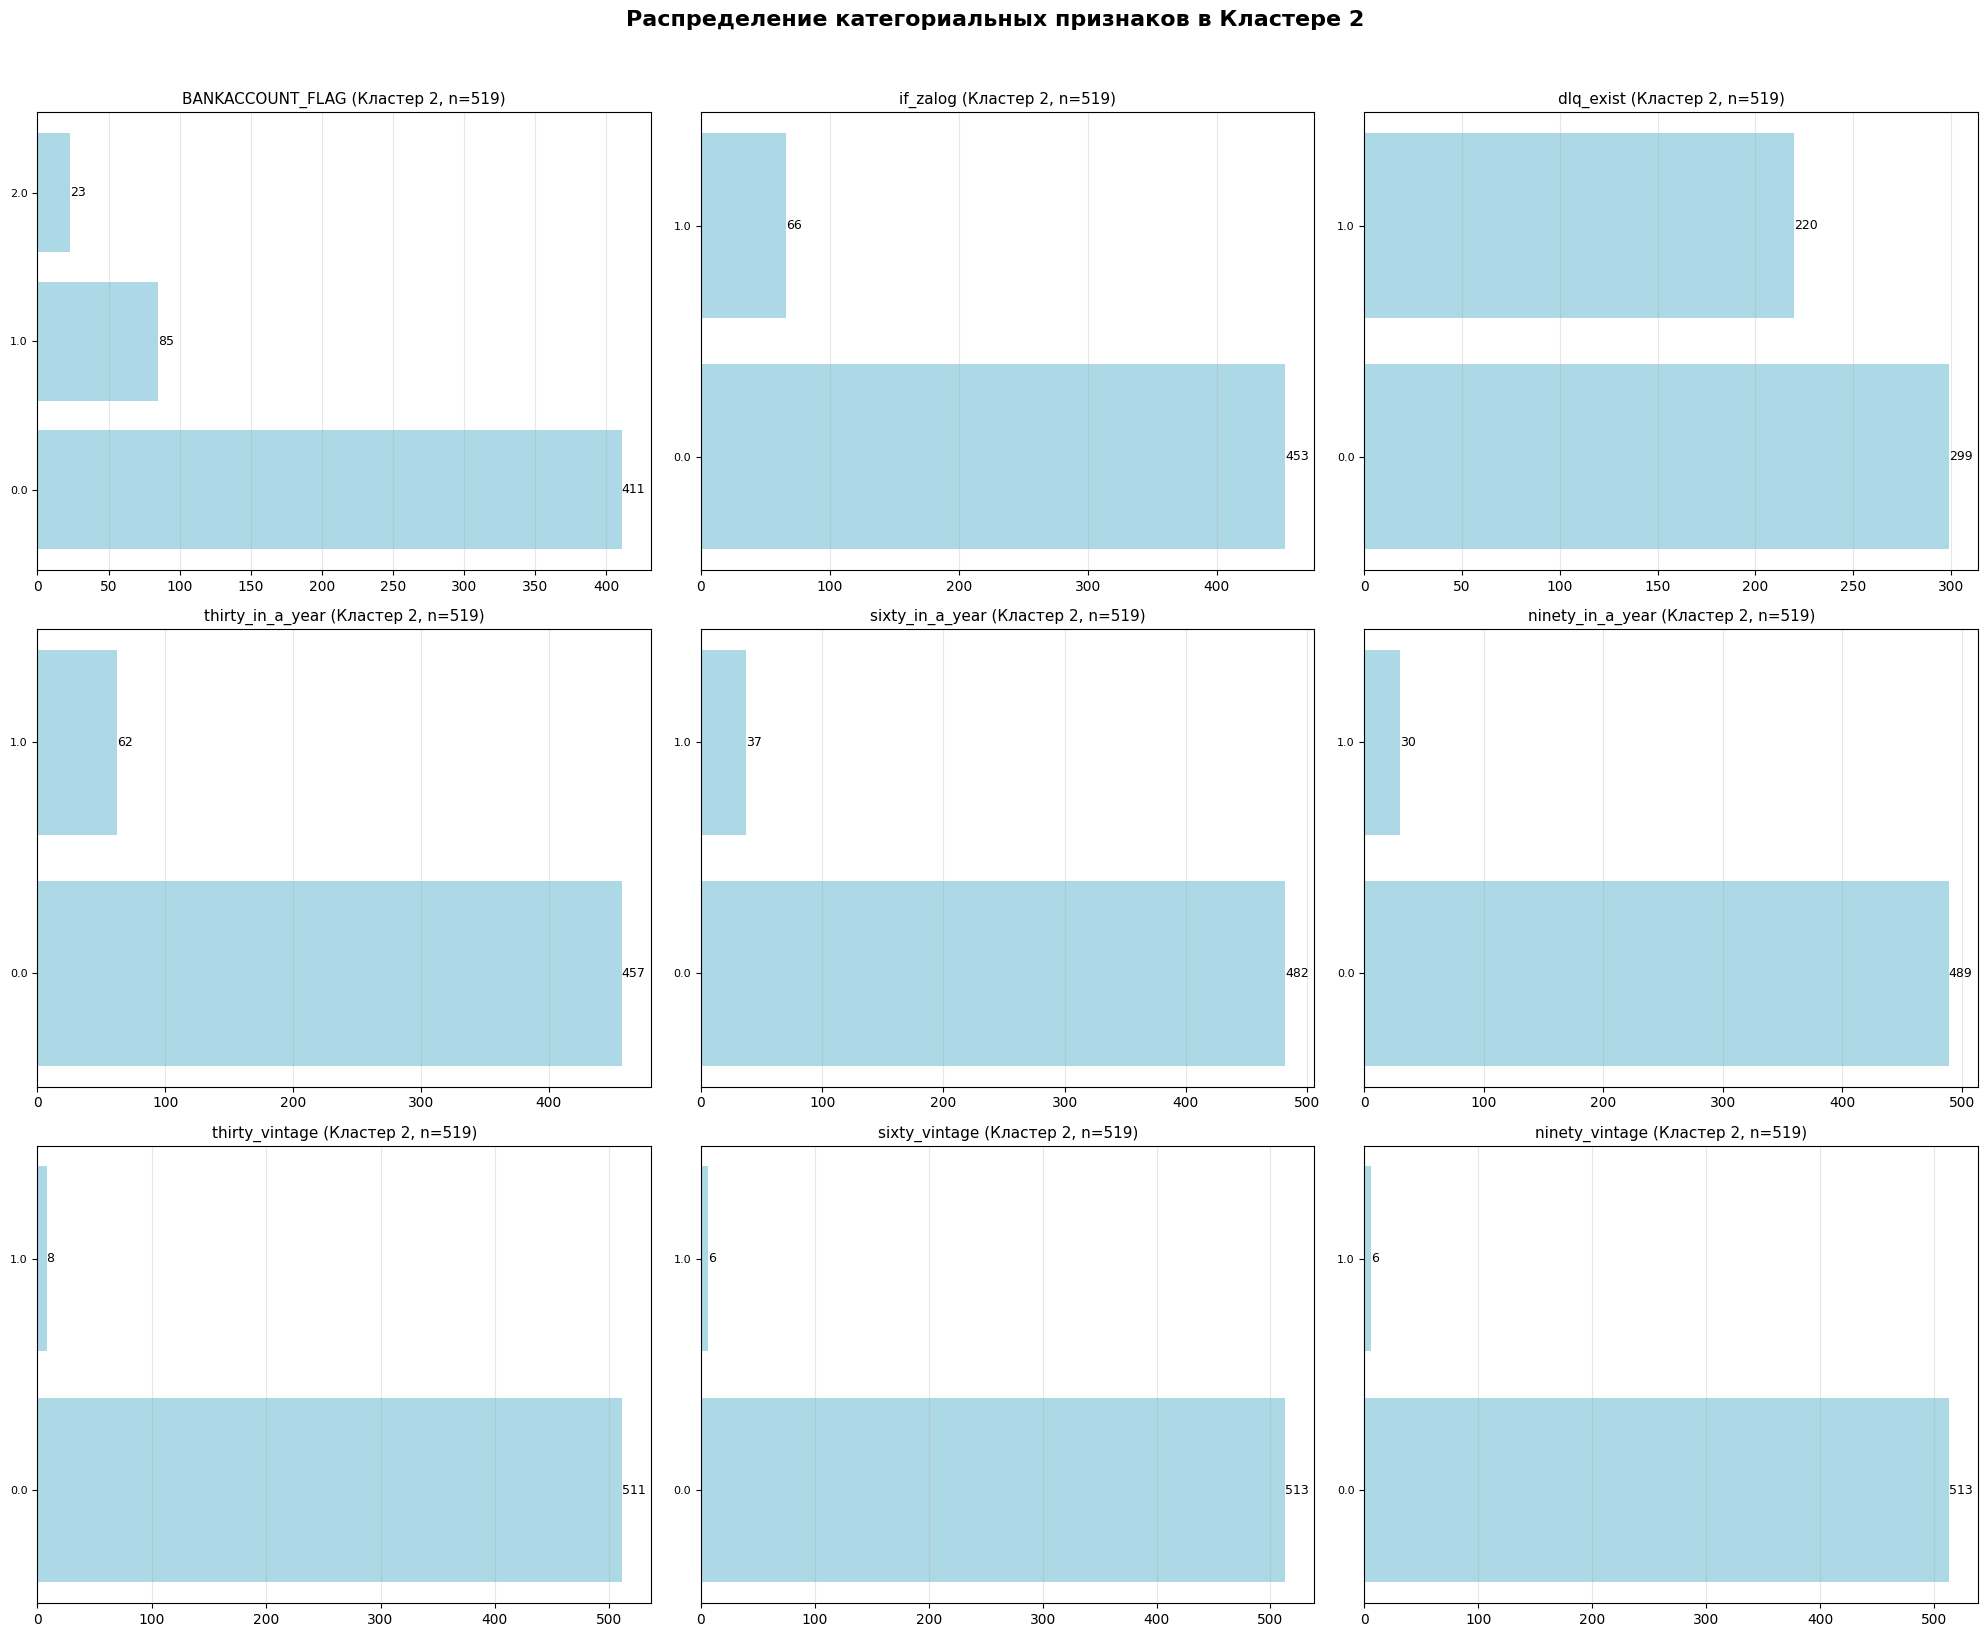

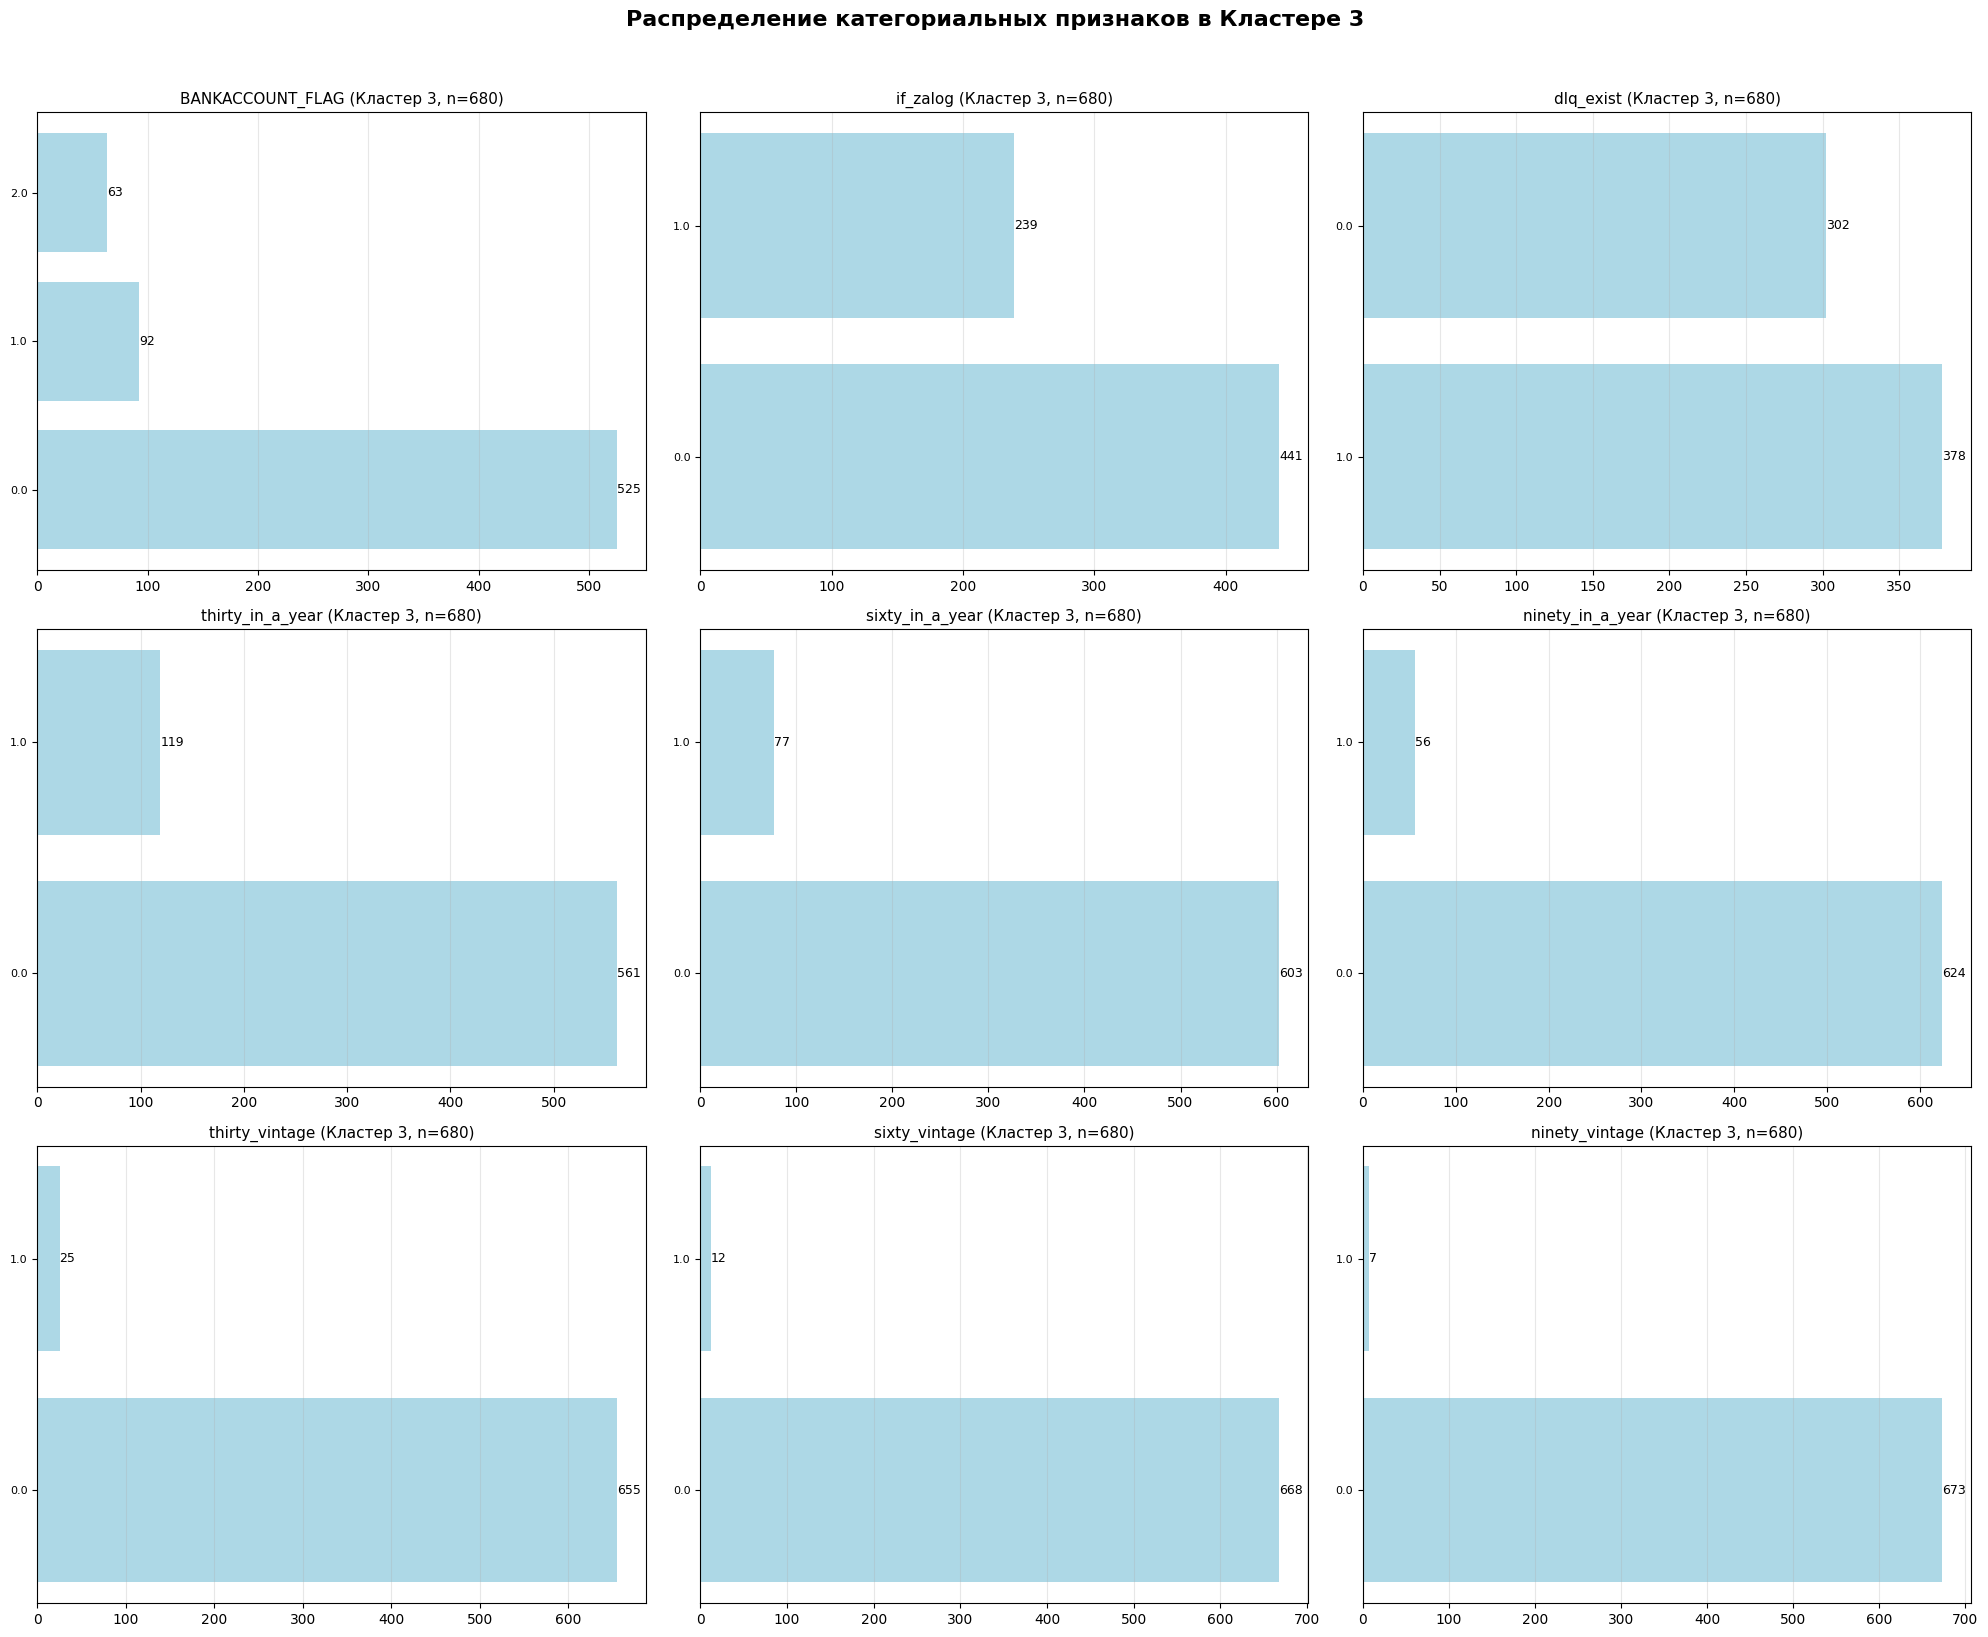

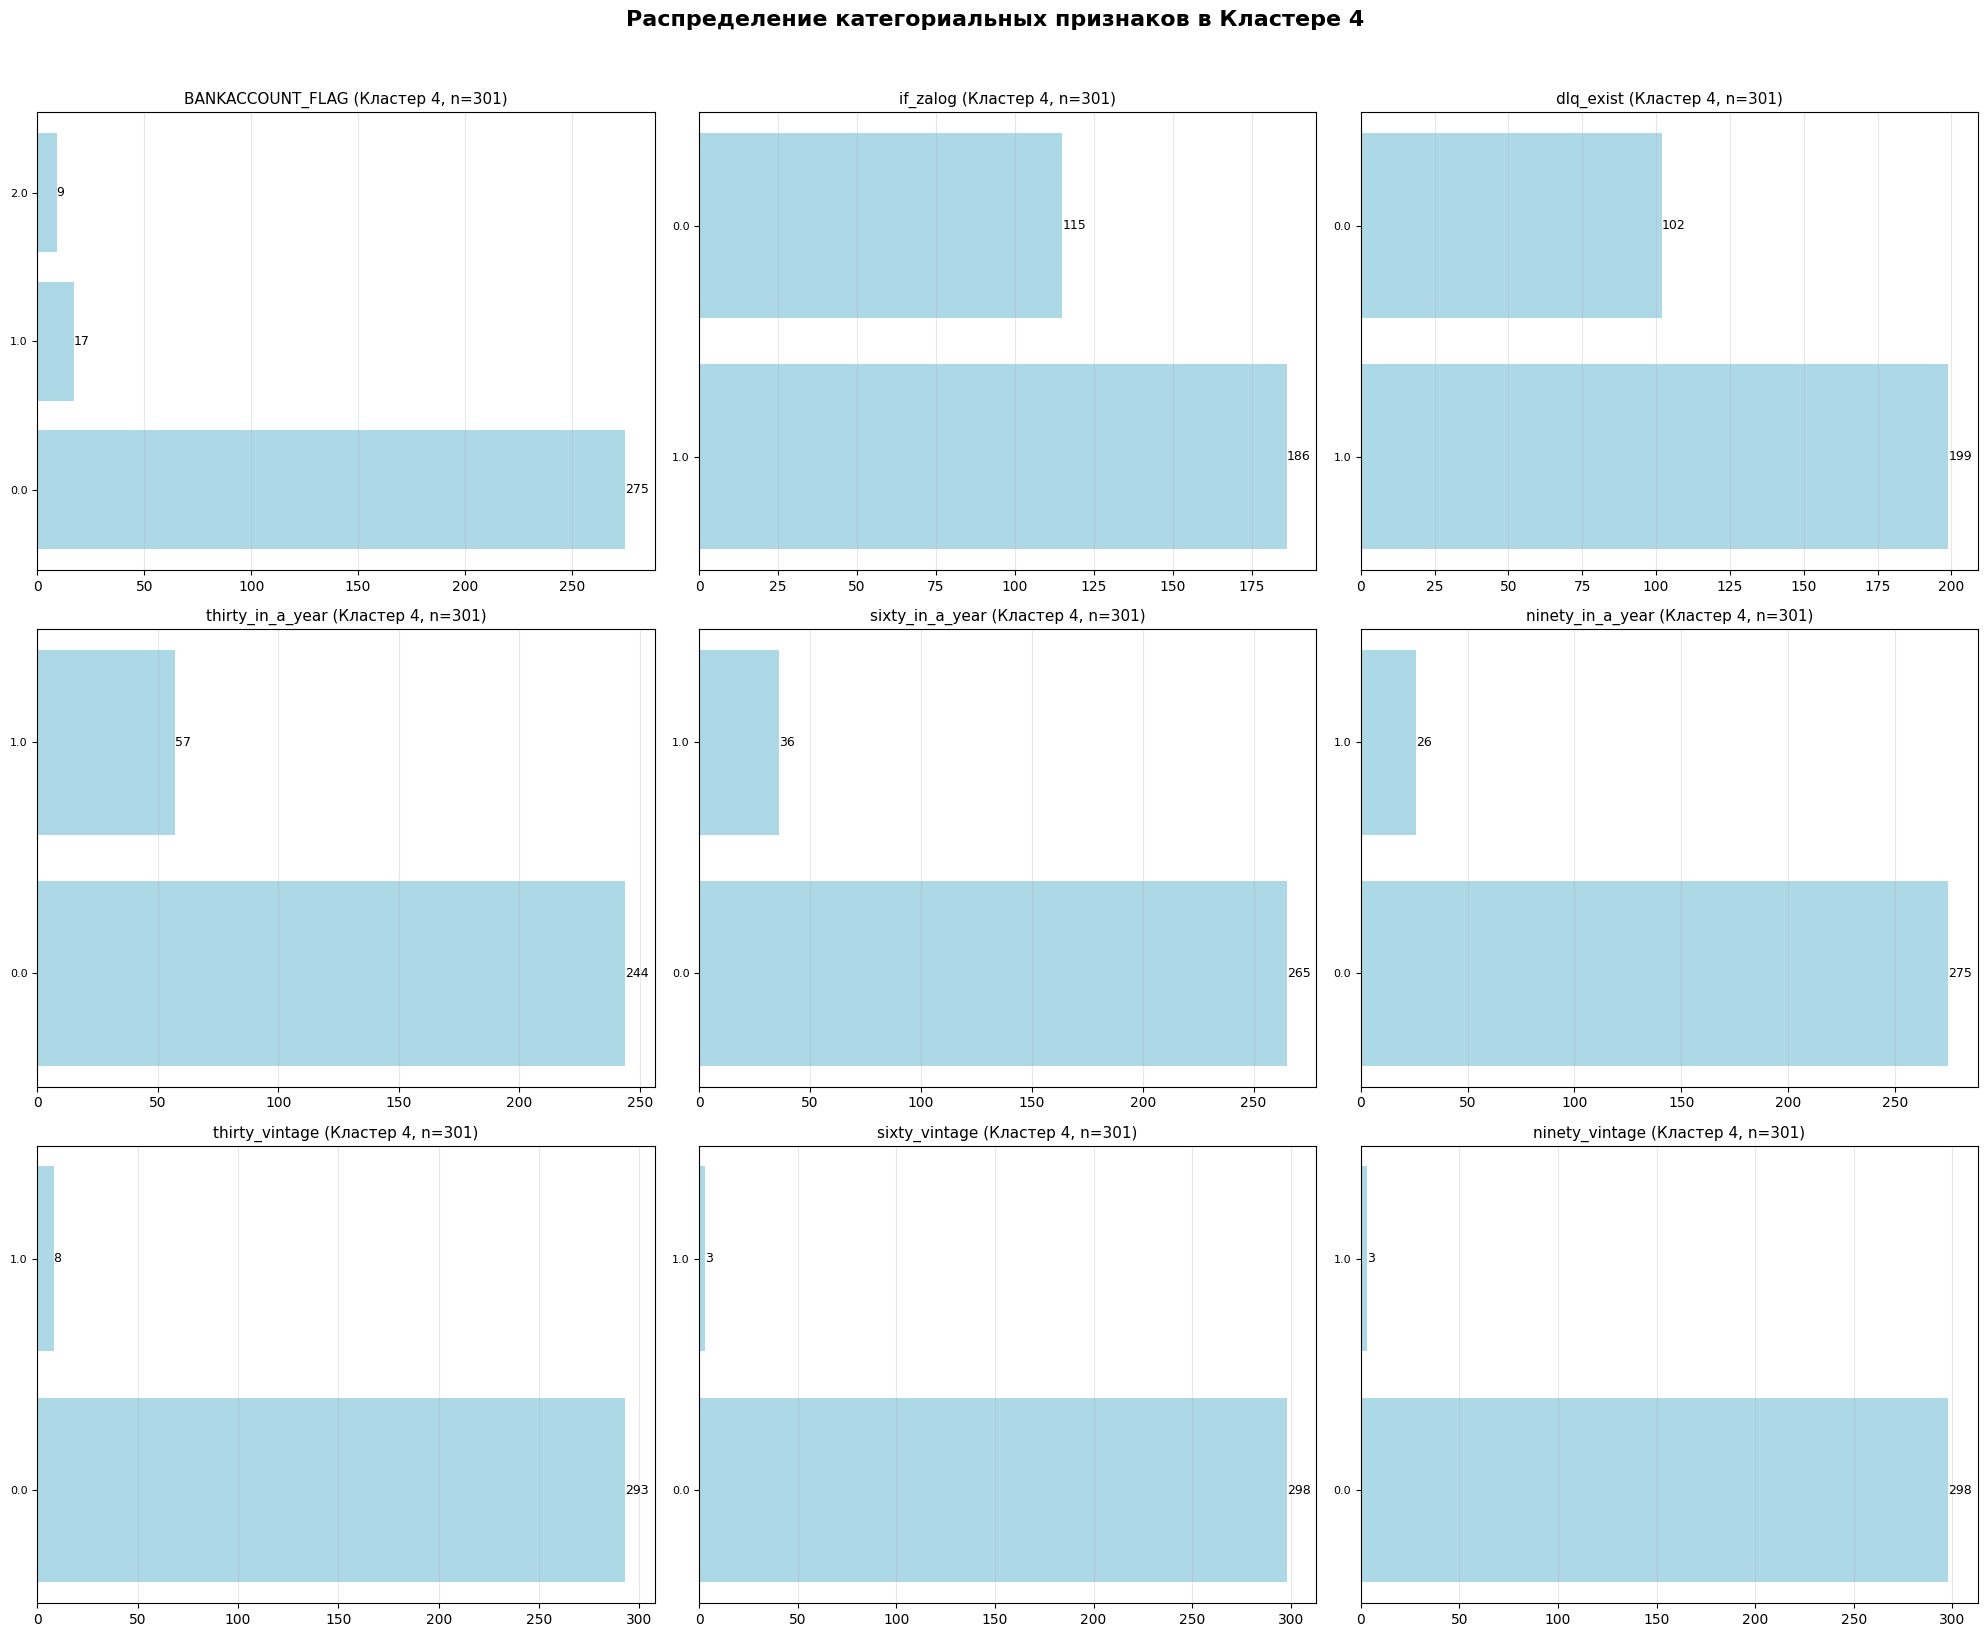

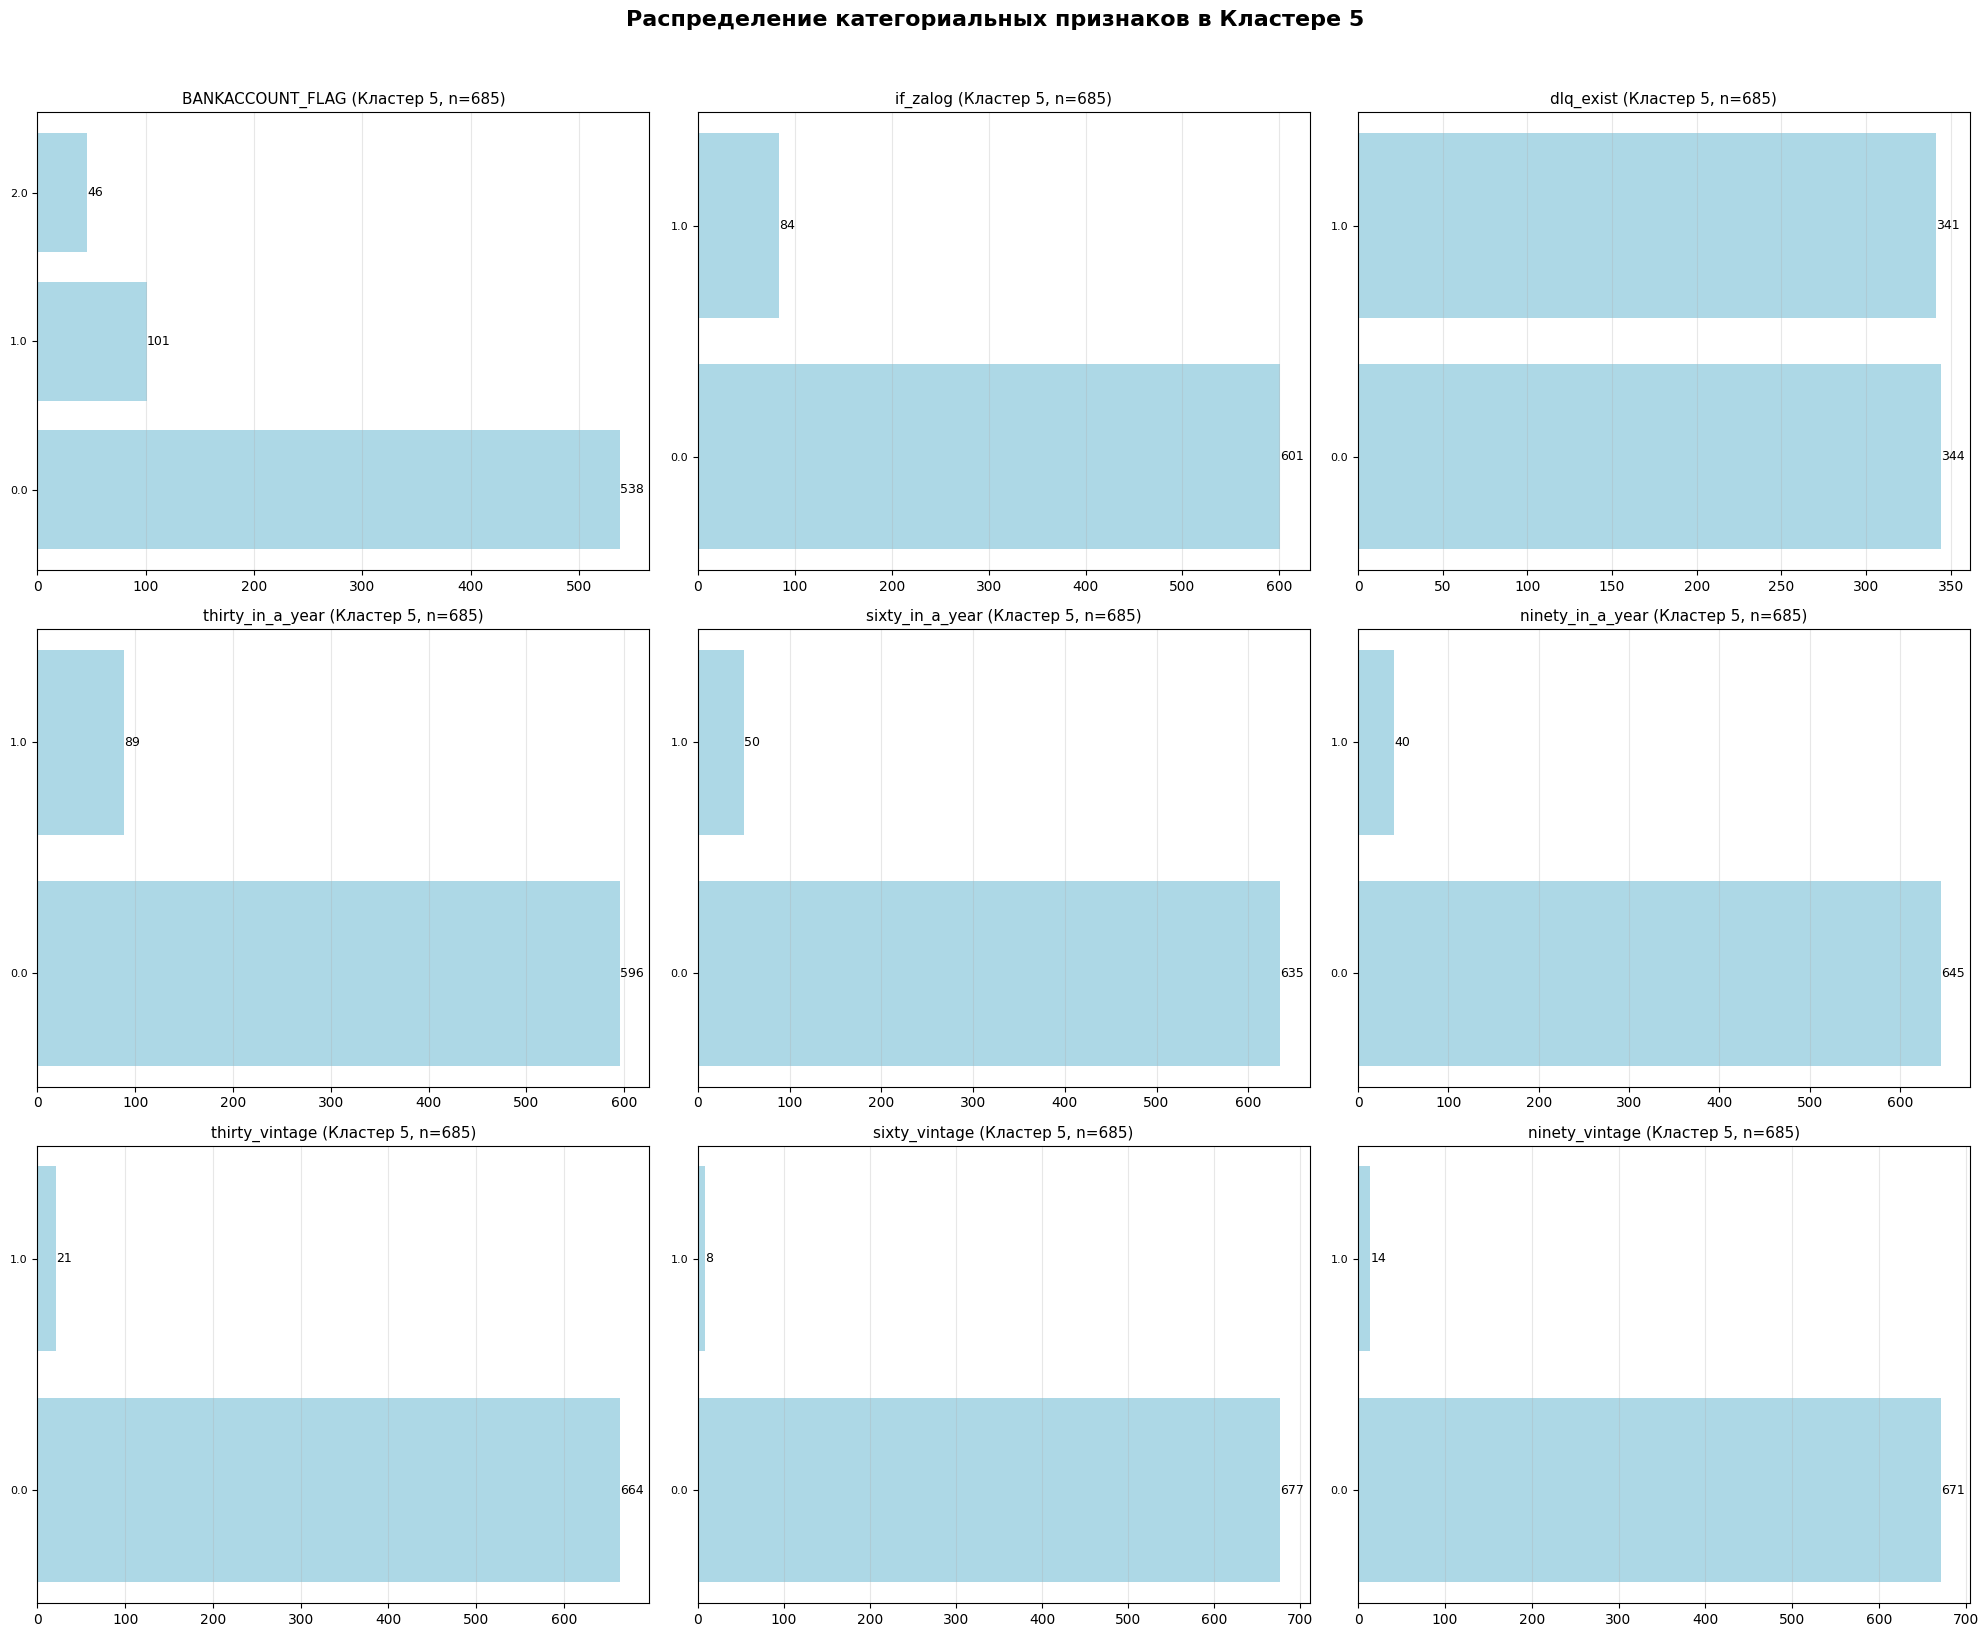

In [ ]:
cols = ['BANKACCOUNT_FLAG', 'if_zalog','dlq_exist', 'thirty_in_a_year', 
        'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 
        'sixty_vintage', 'ninety_vintage']

# Определяем все уникальные кластеры
clusters = sorted(df_clean['cluster'].unique())

for cluster_num in clusters:
    # Фильтруем данные по кластеру
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    
    fig, axes = plt.subplots(3, 3, figsize=(20, 16))
    axes = axes.flatten()
    
    for idx, col in enumerate(cols):
        ax = axes[idx]
        
        if col in df_clean.columns:
            
            counts = cluster_data[col].value_counts()
            
           
            ax.barh(range(len(counts)), counts.values, color='lightblue')
        
            for i, count in enumerate(counts.values):
                ax.text(count, i, str(count), ha='left', va='center', fontsize=9)
            
            ax.set_title(f'{col} (Кластер {cluster_num}, n={len(cluster_data)})', fontsize=11)
            ax.set_yticks(range(len(counts)))
            ax.set_yticklabels(counts.index, fontsize=8)
            ax.grid(True, alpha=0.3, axis='x')
    
    plt.suptitle(f'Распределение категориальных признаков в Кластере {cluster_num}', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


$\text{Теперь можно описать полученные сегменты}\\$

$\text{Кластер 0: Молодые люди в браке, берут кредит на ремонт,}\\
\text{специалисты с доходом более 250 тыс. руб. в сфере торговли.}\\
\text{Средний возраст 34 года, достаточно большое количество кредитов (5)}\\
\text{и приличная сумма платежа в месяц. Детей чаще нет. Средний DTI.}\\ 
\text{Относительно большое количество просрочек (относительно других кластеров)}$

$\text{Кластер 1: мужчины с доходом менее 50 тыс. руб., менеджеры в сфере}\\
\text{торговли, женаты. Приличная сумма выплат, большое количество}\\
\text{кредитов (6), средний возраст 37 лет. Есть дети, есть залог. Низкий DTI. Относительно Большое количество просрочек}$

$\text{Кластер 2: незамужние женщины или неженатые мужчины, доход более}\\
\text{250 тыс. руб., специалисты в другой сфере (не в торговле) имеется в виду сфера бизнеса работодателя.}\\
\text{Кредит на ремонт или на машину, мало кредитов(4 - медианное значение), маленькая сумма}\\
\text{выплат, средний возраст 31 год. Детей нет. Минимальное количество задолженностей, просрочек}$

$\text{Кластер 3: мужчины, женаты, доход более 250 тыс. руб., специалисты}\\
\text{в другой сфере. Кредит на ремонт, недвижимость или машину,}\\
\text{приличное количество кредитов(5), приличная сумма выплат, средний}\\
\text{возраст 36 лет. Чаще есть дети. Задолженности, просрочки есть, но не так много}$

$\text{Кластер 4: мужчины, женаты, доход менее 50 тыс. руб., менеджеры}\\
\text{среднего звена (другая сфера). Кредит на ремонт недвижимости,}\\
\text{большая сумма выплат, много кредитов (6), средний возраст 38 лет.}\\
\text{Очень часто есть дети, есть залог. Задолженности, просрочки есть, но относительно немного}$

$\text{Кластер 5: женщины, не замужем, доход более 250 тыс. руб.,}\\
\text{специалисты в сфере торговли. Кредит на ремонт или машину,}\\
\text{маленькая сумма выплат, мало кредитов (4), средний возраст 31 год.}\\
\text{детей нет. Относительно Мало задолженностей, просрочек}$

$\text{EM-кластеризация} (Expectation-Maximization Algorithm)$

$\text{Проделываем аналогичные шаги}$

In [495]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

$\text{Метод Силуэта}$

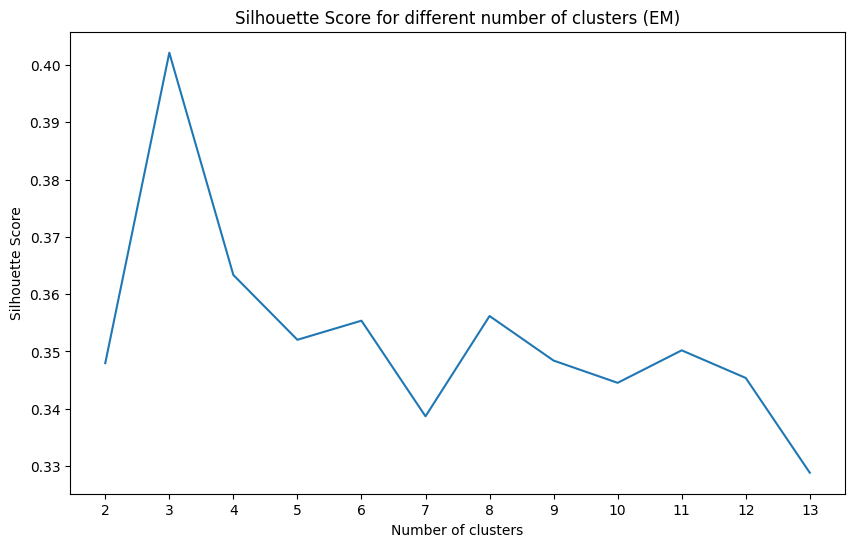

In [496]:
results_sil_em = {}
for i in range(2, 14):

    gmm = GaussianMixture(n_components = i)
    labels = gmm.fit_predict(X_pca)

    sil_score = metrics.silhouette_score(X_pca, labels)
    results_sil_em.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

$\text{Метод Дэвиса-Болдина}$

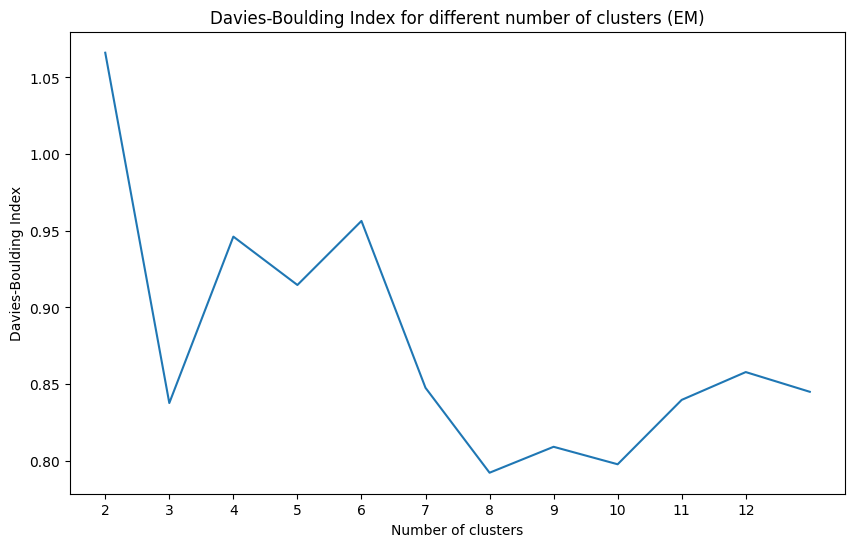

In [497]:
results_ch_em = {}
for i in range(2, 14):

    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X_pca)

    ch_score = metrics.davies_bouldin_score(X_pca, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

$\text{Метод Калински-Харабаз}$

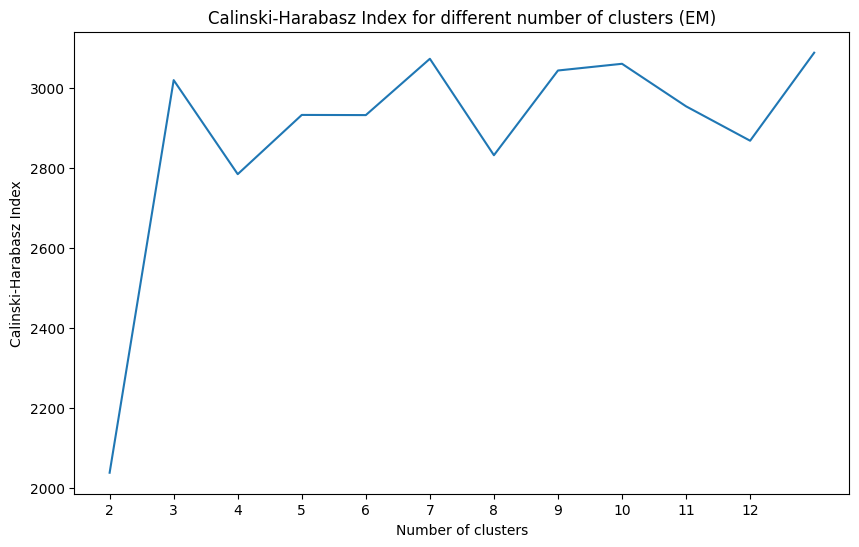

In [499]:
results_ch_em = {}
for i in range(2, 14):

    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X_pca)

    ch_score = metrics.calinski_harabasz_score(X_pca, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

$\text{Оптимальное чило кластеров 3 (видно по всем методам) и например 5} \\
\text{(по методу силуэтов 6 немного лучше но по другим методам единого вывода нет, поэтому возьмем ближайшее к трем)}$

In [512]:
optimal_k_gmm = 5  # оптимальное число кластеров для GMM 

# Сегментация GMM
from sklearn.mixture import GaussianMixture

gmm_best = GaussianMixture(n_components=optimal_k_gmm, random_state=7)
labels_gmm = gmm_best.fit_predict(X_pca)  # Метки кластеров

proba_gmm = gmm_best.predict_proba(X_pca)  # Матрица вероятностей N×best_k_gmm

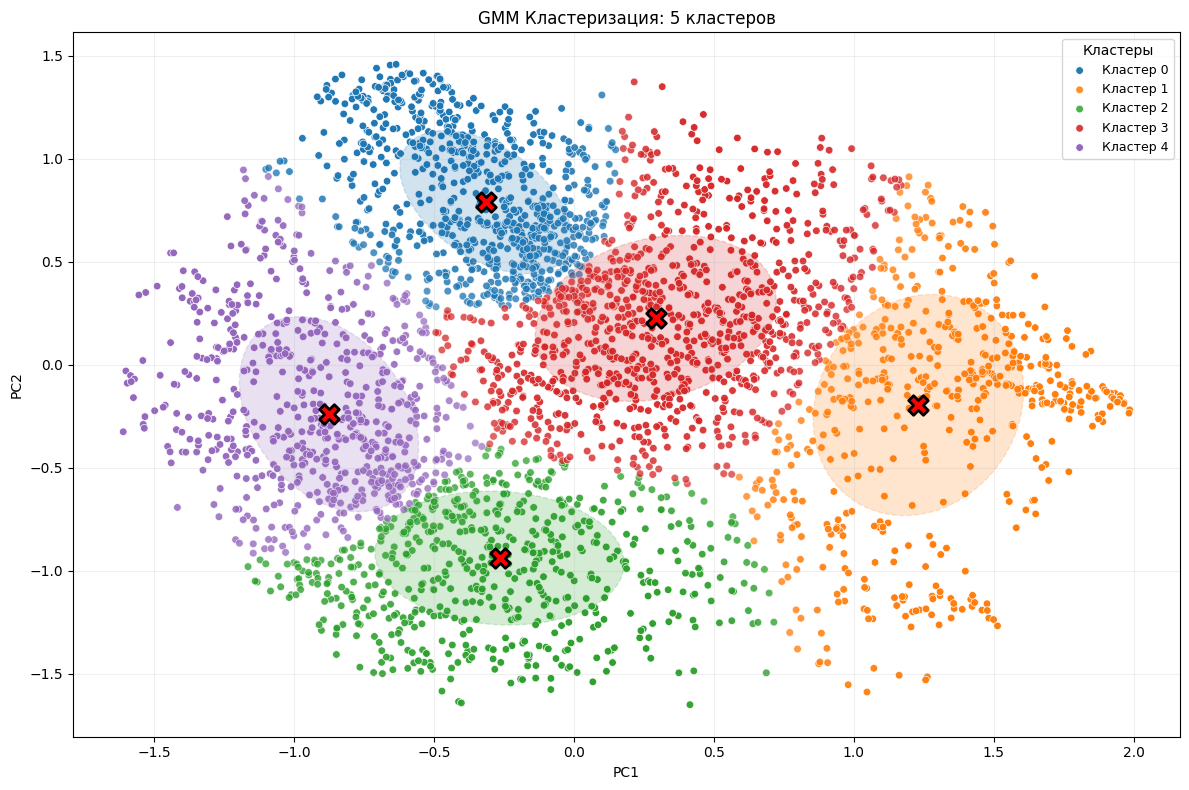

In [ ]:
from matplotlib.patches import Ellipse

# Визуализация GMM кластеризации
plt.figure(figsize=(12, 8))

proba = gmm_best.predict_proba(X_pca)
labels_hard = gmm_best.predict(X_pca)

for i in range(optimal_k_gmm):
    mask = labels_hard == i
    confidences = proba[mask, i]
    
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               color=plt.cm.tab10(i),
               alpha=0.5 + 0.5*confidences,
               s=30, label=f'Кластер {i}',
               edgecolors='w', linewidth=0.5)

centers_gmm = gmm_best.means_

plt.scatter(centers_gmm[:, 0], centers_gmm[:, 1], 
           c='red', s=200, marker='X',
           edgecolors='black', linewidth=2, zorder=10)

# Эллипсы
for i in range(optimal_k_gmm):
    if gmm_best.covariance_type == 'full':
        cov = gmm_best.covariances_[i]
    else:
        cov = np.eye(2) * gmm_best.covariances_[i] if gmm_best.covariance_type == 'spherical' else np.diag(gmm_best.covariances_[i])
    
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    width, height = 2 * np.sqrt(eigvals)
    
    ell = Ellipse(xy=centers_gmm[i], width=width, height=height, angle=angle,
                 alpha=0.2, color=plt.cm.tab10(i), linestyle='--', linewidth=1)
    plt.gca().add_patch(ell)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'GMM Кластеризация: {optimal_k_gmm} кластеров')
plt.legend(title="Кластеры", fontsize=9)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [509]:
df_clean.head()

INCOME_BASE_TYPE  \
0            Поступление зарплаты на счет   
1            Поступление зарплаты на счет   
2                                   2НДФЛ   
4                                   2НДФЛ   
5  Свободная форма с печатью работодателя   

                        CREDIT_PURPOSE INSURANCE_FLAG   DTI      SEX  \
0                               Ремонт            1.0  0.11  женский   
1                               Отпуск            0.0  0.33  женский   
2                               Ремонт            0.0  0.48  женский   
4  Покупка недвижимости/ строительство            1.0  0.36  мужской   
5                        Покупка земли            1.0  0.52  мужской   

   FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
0                      1                 0   
1                      0                 0   
2                      0                 0   
4                      1                 0   
5                      1                 0   

                             EDUCATION                EMPL_TYPE EMPL_SIZE  \
0                               высшее  менеджер среднего звена      >250   
1                               высшее               специалист      >250   
2  Высшее/Второе высшее/Ученая степень  менеджер среднего звена      >250   
4                  среднее-специальное                  рабочий      >250   
5                               высшее               специалист      >250   

  BANKACCOUNT_FLAG  Period_at_work   age              EMPL_PROPERTY  \
0              0.0            37.0  43.0                     Другое   
1              0.0            16.0  34.0                     Другое   
2              0.0            53.0  35.0                   Торговля   
4              0.0            49.0  26.0  Информационные технологии   
5              2.0            19.0  30.0                   Торговля   

    EMPL_FORM        FAMILY_STATUS  max90days  max60days  max30days  \
0  Иная форма      женат / замужем        0.0        0.0        0.0   
1         ЗАО  холост / не замужем        2.0        2.0        2.0   
2         ООО  холост / не замужем        3.0        2.0        2.0   
4         ЗАО      женат / замужем        0.0        0.0        0.0   
5         ООО      женат / замужем        1.0        1.0        1.0   

   max21days  max14days  avg_num_delay if_zalog  num_AccountActive180  \
0        0.0        0.0       0.000000      1.0                   0.0   
1        1.0        0.0       0.000000      0.0                   1.0   
2        1.0        1.0       0.000000      0.0                   0.0   
4        0.0        0.0       0.000000      1.0                   0.0   
5        1.0        1.0       0.170732      0.0                   0.0   

   num_AccountActive90  num_AccountActive60  Active_to_All_prc  \
0                  0.0                  0.0           0.000000   
1                  1.0                  1.0           1.000000   
2                  0.0                  0.0           0.333333   
4                  0.0                  0.0           0.000000   
5                  0.0                  0.0           0.444444   

   numAccountActiveAll  numAccountClosed  sum_of_paym_months  all_credits  \
0                  0.0               3.0                13.0          3.0   
1                  1.0               0.0                 1.0          1.0   
2                  1.0               2.0                14.0          3.0   
4                  0.0               5.0                47.0          5.0   
5                  4.0               5.0               102.0          9.0   

   Active_not_cc  own_closed  min_MnthAfterLoan  max_MnthAfterLoan dlq_exist  \
0            0.0         0.0               28.0               86.0       0.0   
1            1.0         0.0                0.0                0.0       0.0   
2            0.0         0.0                6.0               23.0       0.0   
4            0.0         4.0               17.0               52.0       0.0   
5            3.0         0.0

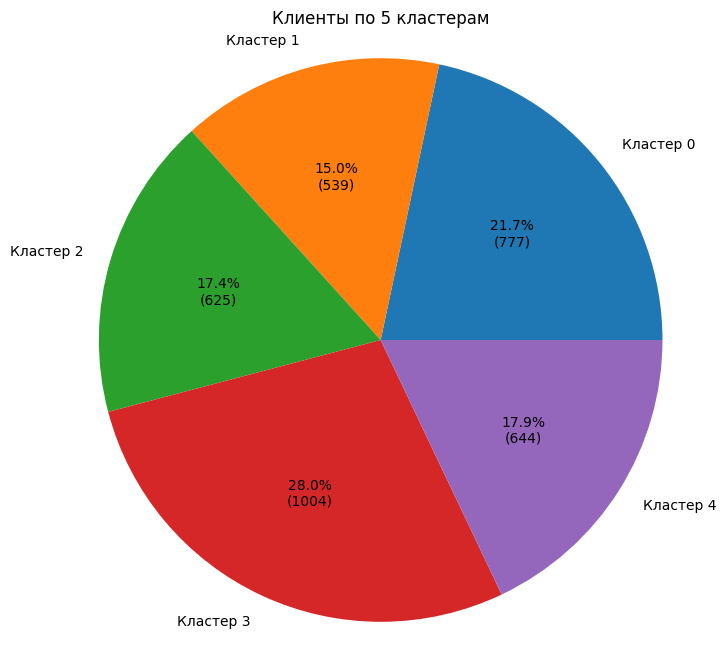

In [519]:
plt.figure(figsize=(8, 8))

cluster_counts = np.bincount(labels_gmm)

plt.pie(cluster_counts, 
        labels=[f'Кластер {i}' for i in range(optimal_k_gmm )],
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(cluster_counts))})')
plt.title(f'Клиенты по {optimal_k_gmm} кластерам')
plt.axis('equal')
plt.show()

In [520]:
df_clean['cluster'] = labels_gmm  

$\text{Смотрим распределение по кластерам}$

In [522]:
# Группируем по кластерам и считаем статистику
print("РАСПРЕДЕЛЕНИЕ ДАННЫХ ВНУТРИ КЛАСТЕРОВ")

# Количественные переменные: средние и медианы
if numeric_cols:
    print("\n КОЛИЧЕСТВЕННЫЕ ПЕРЕМЕННЫЕ (средние):")
    numeric_means = df_clean.groupby('cluster')[numeric_cols].mean()
    print(numeric_means)

    print("\n КОЛИЧЕСТВЕННЫЕ ПЕРЕМЕННЫЕ (медианы):")
    numeric_medians = df_clean.groupby('cluster')[numeric_cols].median()
    print(numeric_medians)


# Категориальные переменные: мода (самое частое значение)
if categorical_cols:
    print("\n КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ (самые частые значения):")
    
    def get_mode(series):
        mode_vals = series.mode()
        return mode_vals.iloc[0] if not mode_vals.empty else None
    
    for col in categorical_cols:
        print(f"\n{col}:")
        mode_by_cluster = df_clean.groupby('cluster')[col].agg(get_mode)
        print(mode_by_cluster)

РАСПРЕДЕЛЕНИЕ ДАННЫХ ВНУТРИ КЛАСТЕРОВ

 КОЛИЧЕСТВЕННЫЕ ПЕРЕМЕННЫЕ (средние):
              DTI  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  Period_at_work  \
cluster                                                                      
0        0.405051               0.343188          0.005141       42.685090   
1        0.364111               0.816667          0.005556       58.674074   
2        0.397344               0.806400          0.006400       80.993600   
3        0.378663               0.558765          0.000996       51.321713   
4        0.393106               0.357143          0.000000       56.409938   

               age  max90days  max60days  max30days  max21days  max14days  \
cluster                                                                     
0        33.784062   1.530848   1.070694   0.787918   0.565553   0.455013   
1        38.935185   1.611111   1.074074   0.744444   0.566667   0.438889   
2        38.075200   1.542733   1.078748   0.762529   0.536257   0.4

$\text{Кластер 0 (карьеристка): чаще женщины, не замужем, детей нет, около 32 лет}\\
\text{специалисты с доходом более 250 тыс. руб. в сфере торговли.}\\$

$\text{Кластер 1 (Семьянин-работяга): чаще мужчины, женат, есть дети, около 38 лет}\\
\text{с доходом менее 50 тыс. руб. менеджер.}\\$

$\text{Кластер 2 (Семьянин-специалист): чаще мужчины, женат, есть дети, около 37 лет}\\
\text{специалисты с доходом более 250 тыс. руб.. другая сфера деятельности (не торговля)}\\$

$\text{Кластер 3 (Молодая семья преимущественно без детей): чаще женщины, в браке, детей чаще нет, около 34 лет}\\
\text{специалисты с доходом более 250 тыс. руб.. сфера деятельности (работодателя) торговля}\\$

$\text{Кластер 4: чаще женщины, не в браке, детей нет, около 32 лет}\\
\text{специалисты с доходом более 250 тыс. руб.. сфера деятельности другая не торговля}\\$